In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch
from kmodes.kmodes import KModes
import matplotlib.cm as cm
%matplotlib inline

In [23]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [24]:
df_v2 = pd.read_csv("./Data/version_2_non_num_cld.csv", index_col = "Unnamed: 0")

In [25]:
df_v2['PTYIDEO7'].value_counts()

Liberal Democrats            842
Mod/Conserv. Democrats       729
Conservative Republicans     720
Moderate Independents        537
Mod./Liberal Republicans     355
Liberal Independents         221
Conservative Independents    204
Name: PTYIDEO7, dtype: int64

### Separating Different Subgroups 


In [26]:
df_v2_lib_dems = df_v2[df_v2['PTYIDEO7'] == 'Liberal Democrats']
df_v2_mod_con_dems = df_v2[df_v2['PTYIDEO7'] == 'Mod/Conserv. Democrats']
df_v2_lib_ind = df_v2[df_v2['PTYIDEO7'] == 'Liberal Independents']
df_v2_mod_lib_rep = df_v2[df_v2['PTYIDEO7'] == 'Mod./Liberal Republicans']
df_v2_con_rep = df_v2[df_v2['PTYIDEO7'] == 'Conservative Republicans']
df_v2_con_ind = df_v2[df_v2['PTYIDEO7'] == 'Conservative Independents']
df_v2_mod_ind = df_v2[df_v2['PTYIDEO7'] == 'Moderate Independents']
df_v2_all_ind = pd.concat([df_v2_con_ind, df_v2_mod_ind, df_v2_lib_ind])

### Creating Groups to Measure 

In [27]:
group_age_by_race = df_v2['AGEBYRACE'].unique()
group_age_by_race = sorted(group_age_by_race, reverse=True)

group_party_by_race = df_v2['PARTYBYRACE'].unique()
group_party_by_race = sorted(group_party_by_race, reverse=True)

group_religion = df_v2['RELIGN18'].unique
group_religion = sorted(group_party_by_race, reverse=True)


#### Unlike the last notebook, I will try to be smart and make a function 

In [28]:
def chart_simplifier(df, group, filt, issue):
    plt.figure(figsize=(16, 50))
    for i, g in enumerate(group):
    
        plt.subplot(7, 4, i+1)
        data = df[df[filt]==g][issue].value_counts(normalize=True)
        plt.bar(x=data.index, height=data)
        plt.xticks(rotation=90)
        plt.title(g, fontdict={'fontsize': 20})
        plt.tick_params(axis='x', which='major', labelsize= 15)
        plt.tick_params(axis='y', labelsize=15)
        plt.tight_layout()

### Liberal Democrats 

#### Plot of Impeachment approval by race 

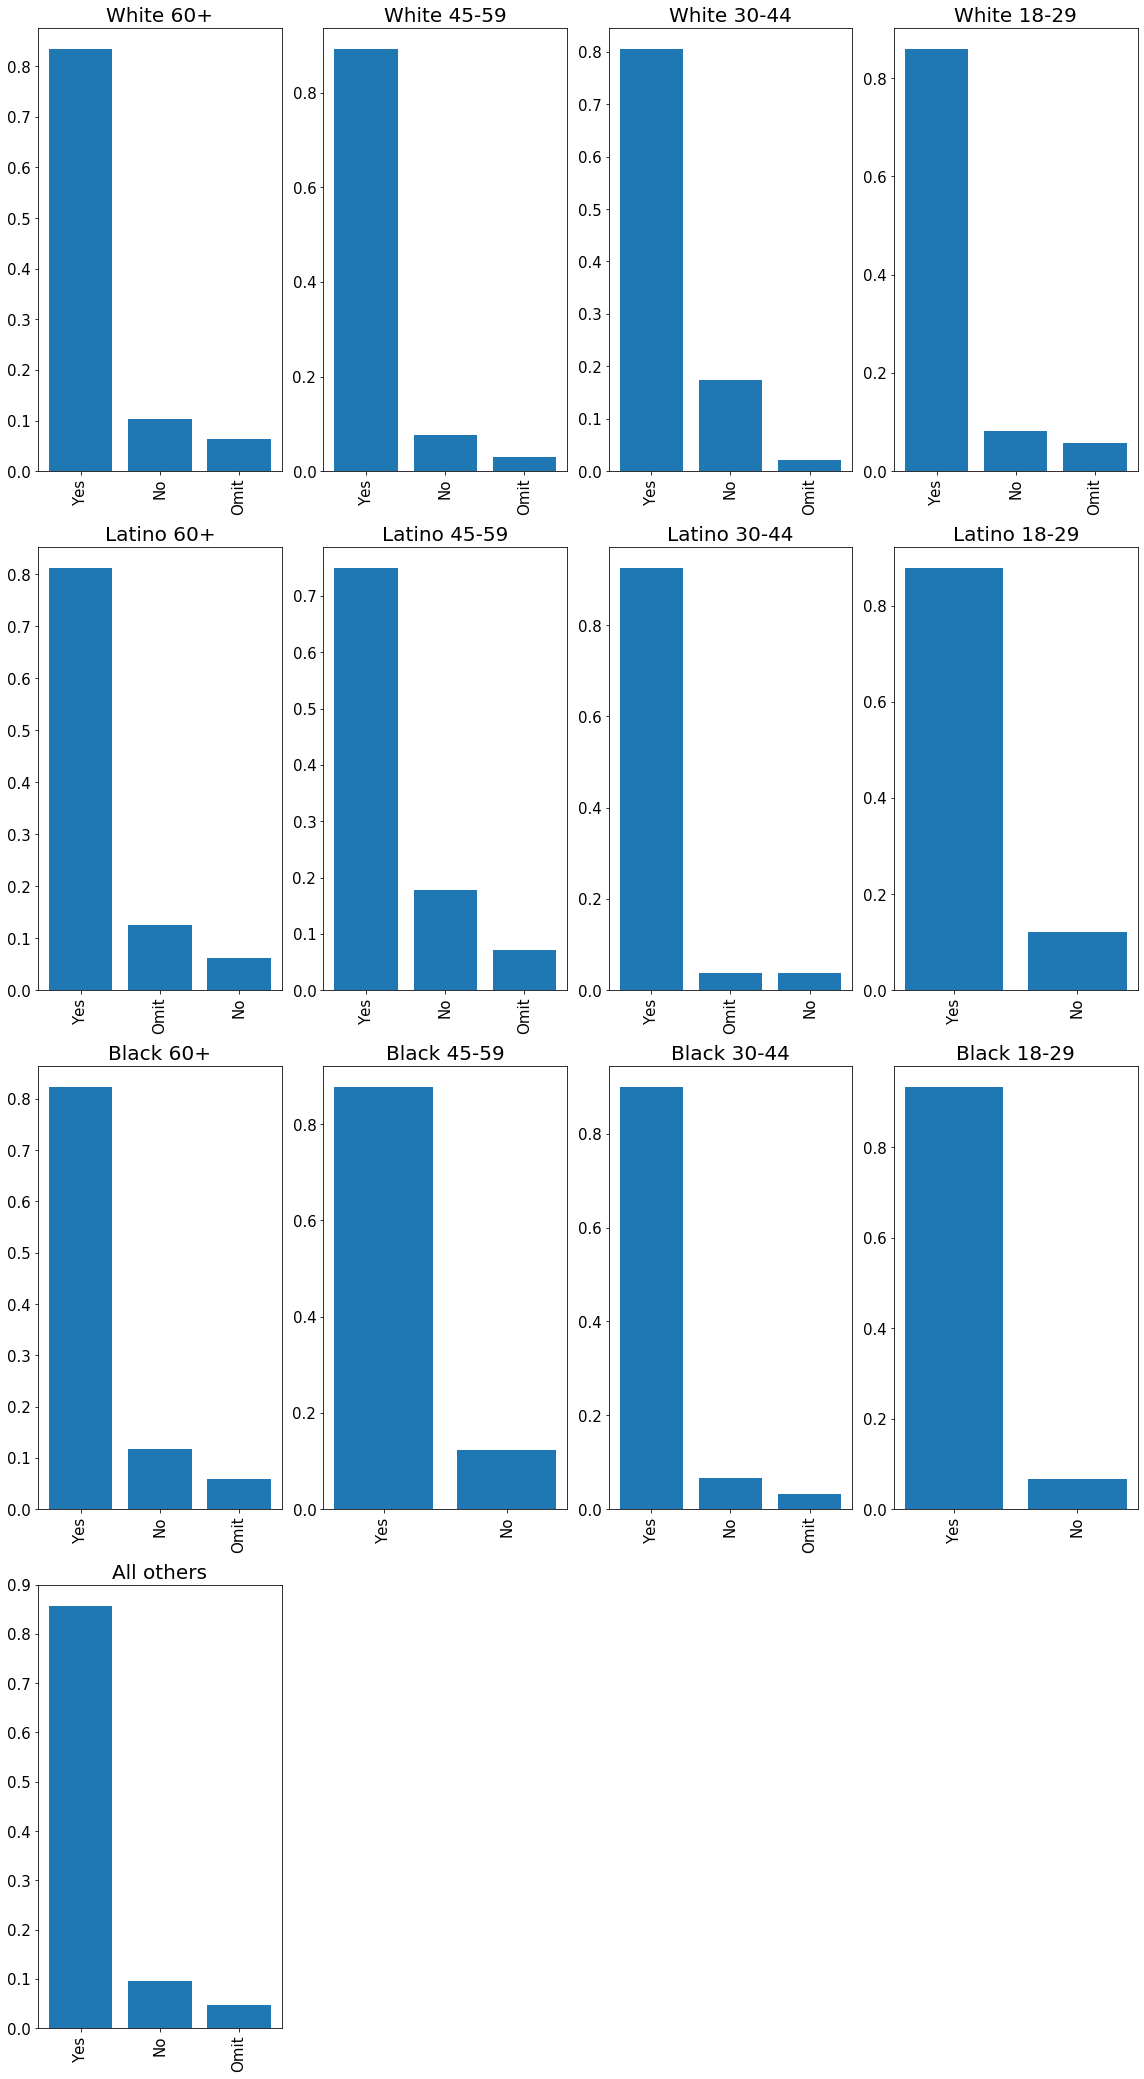

In [29]:
chart_simplifier(df_v2_lib_dems, group = group_age_by_race, filt = 'AGEBYRACE', issue= 'IMPEACH18')


#### Plot of Whether the participant thinks the Russia investigation was justified by race

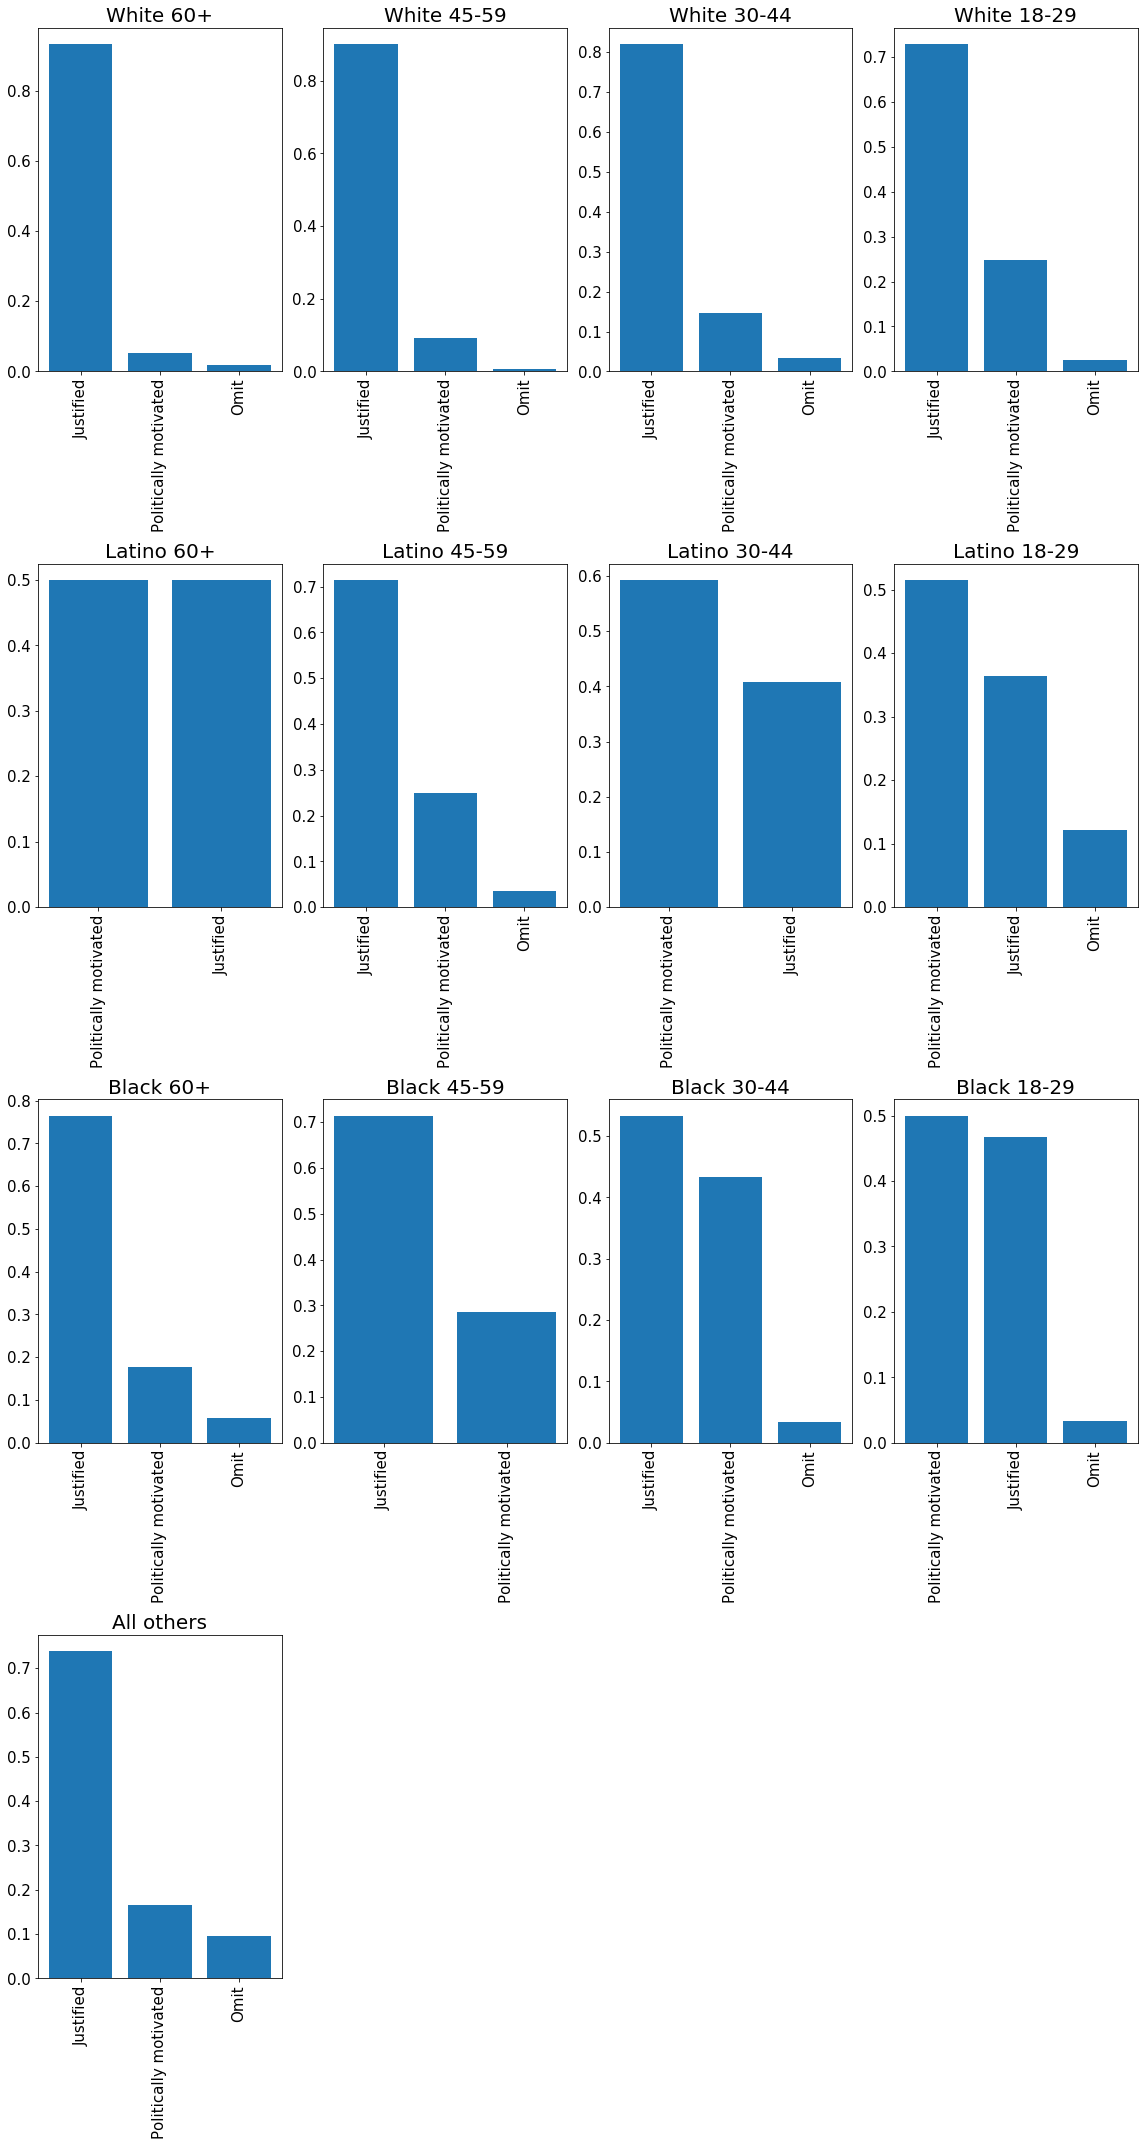

In [30]:
chart_simplifier(df_v2_lib_dems, group = group_age_by_race, filt = 'AGEBYRACE', issue= 'RUSSIA18')


#### Plot of the participant's approval of Trump's immigration policies by race

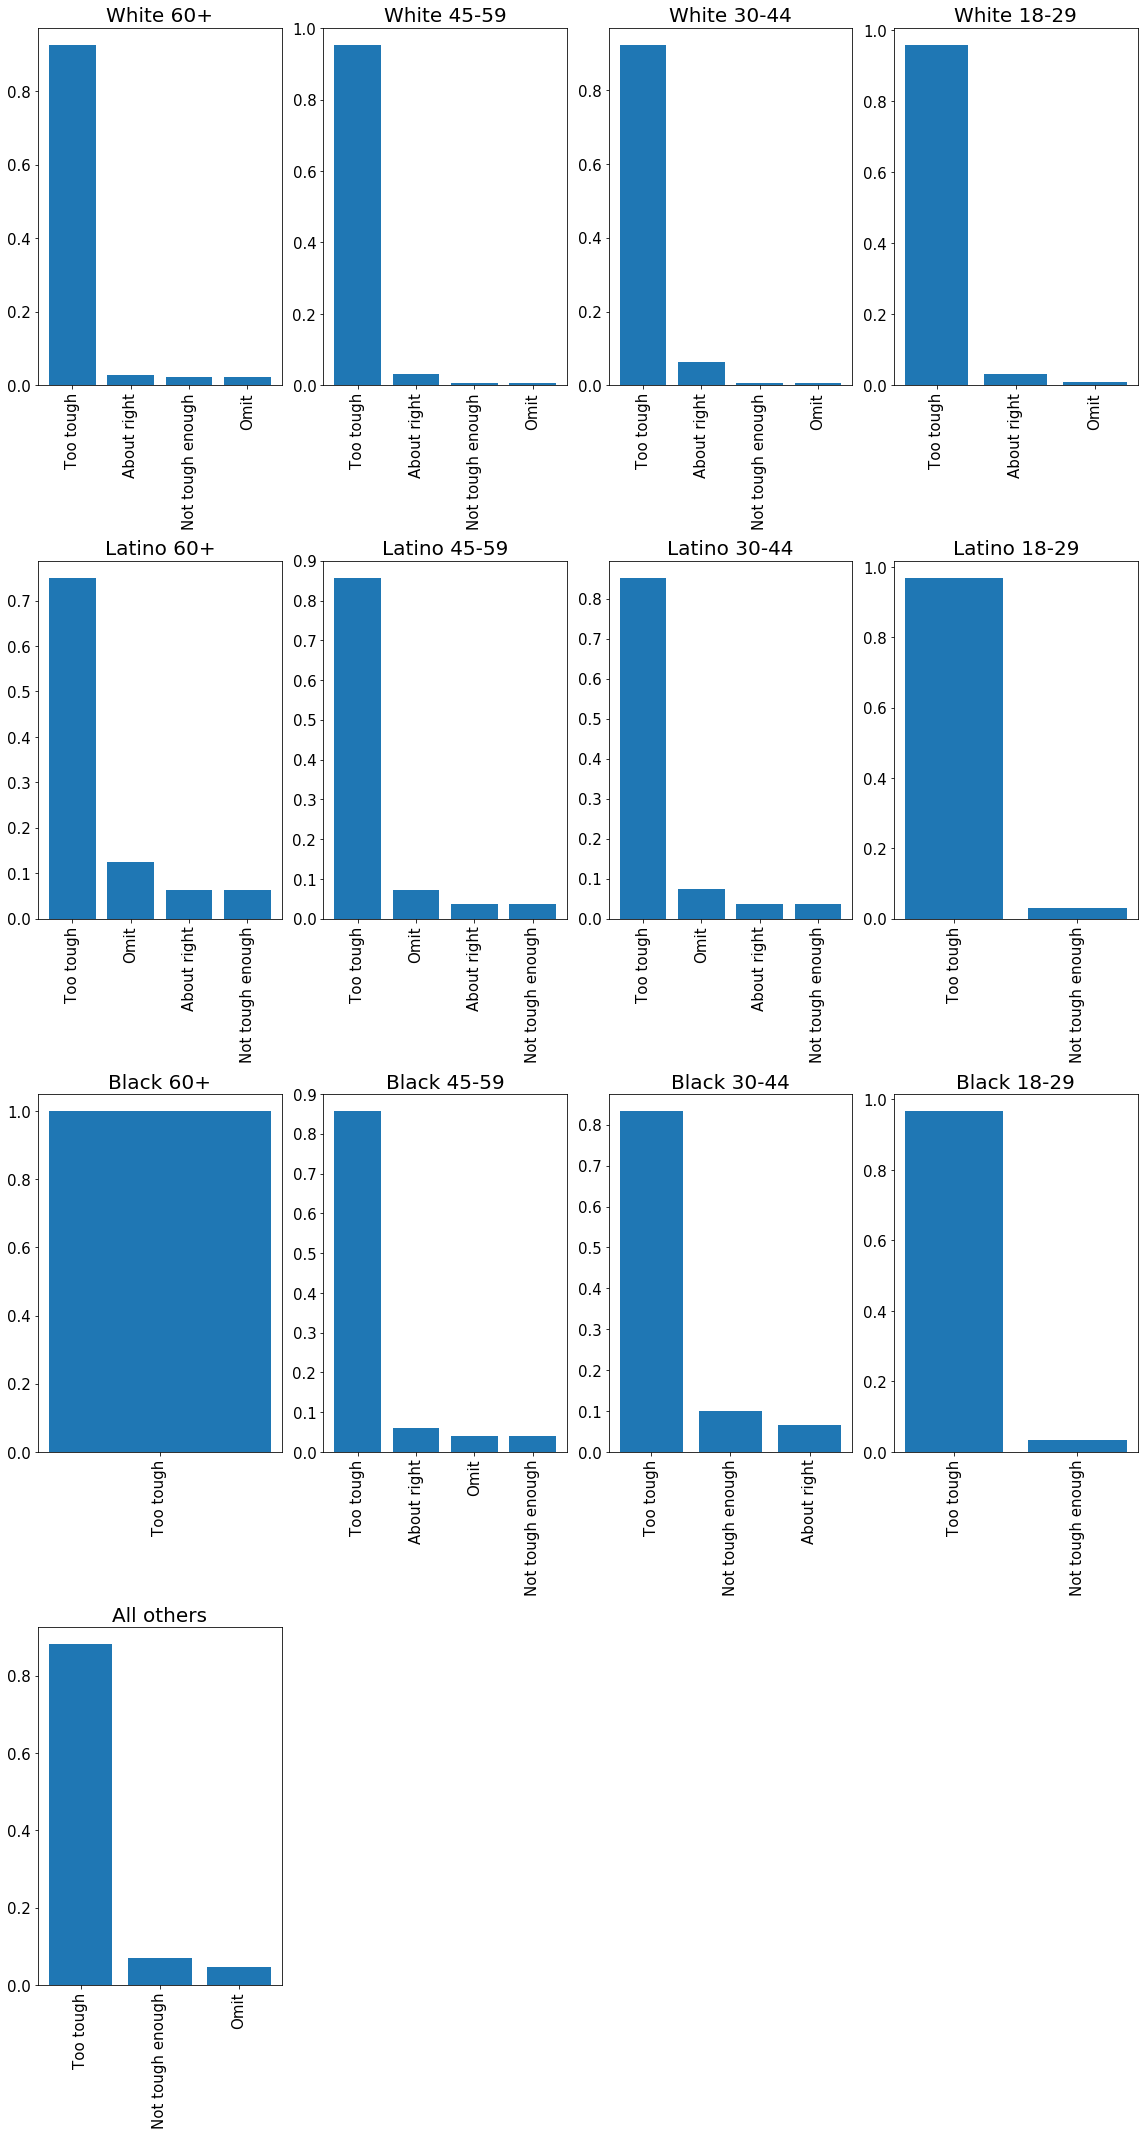

In [31]:
chart_simplifier(df_v2_lib_dems, group = group_age_by_race, filt = 'AGEBYRACE', issue= 'TRUMPIMM')


#### Plot of the participants opinion of the treatment of minorities versus white people by race 

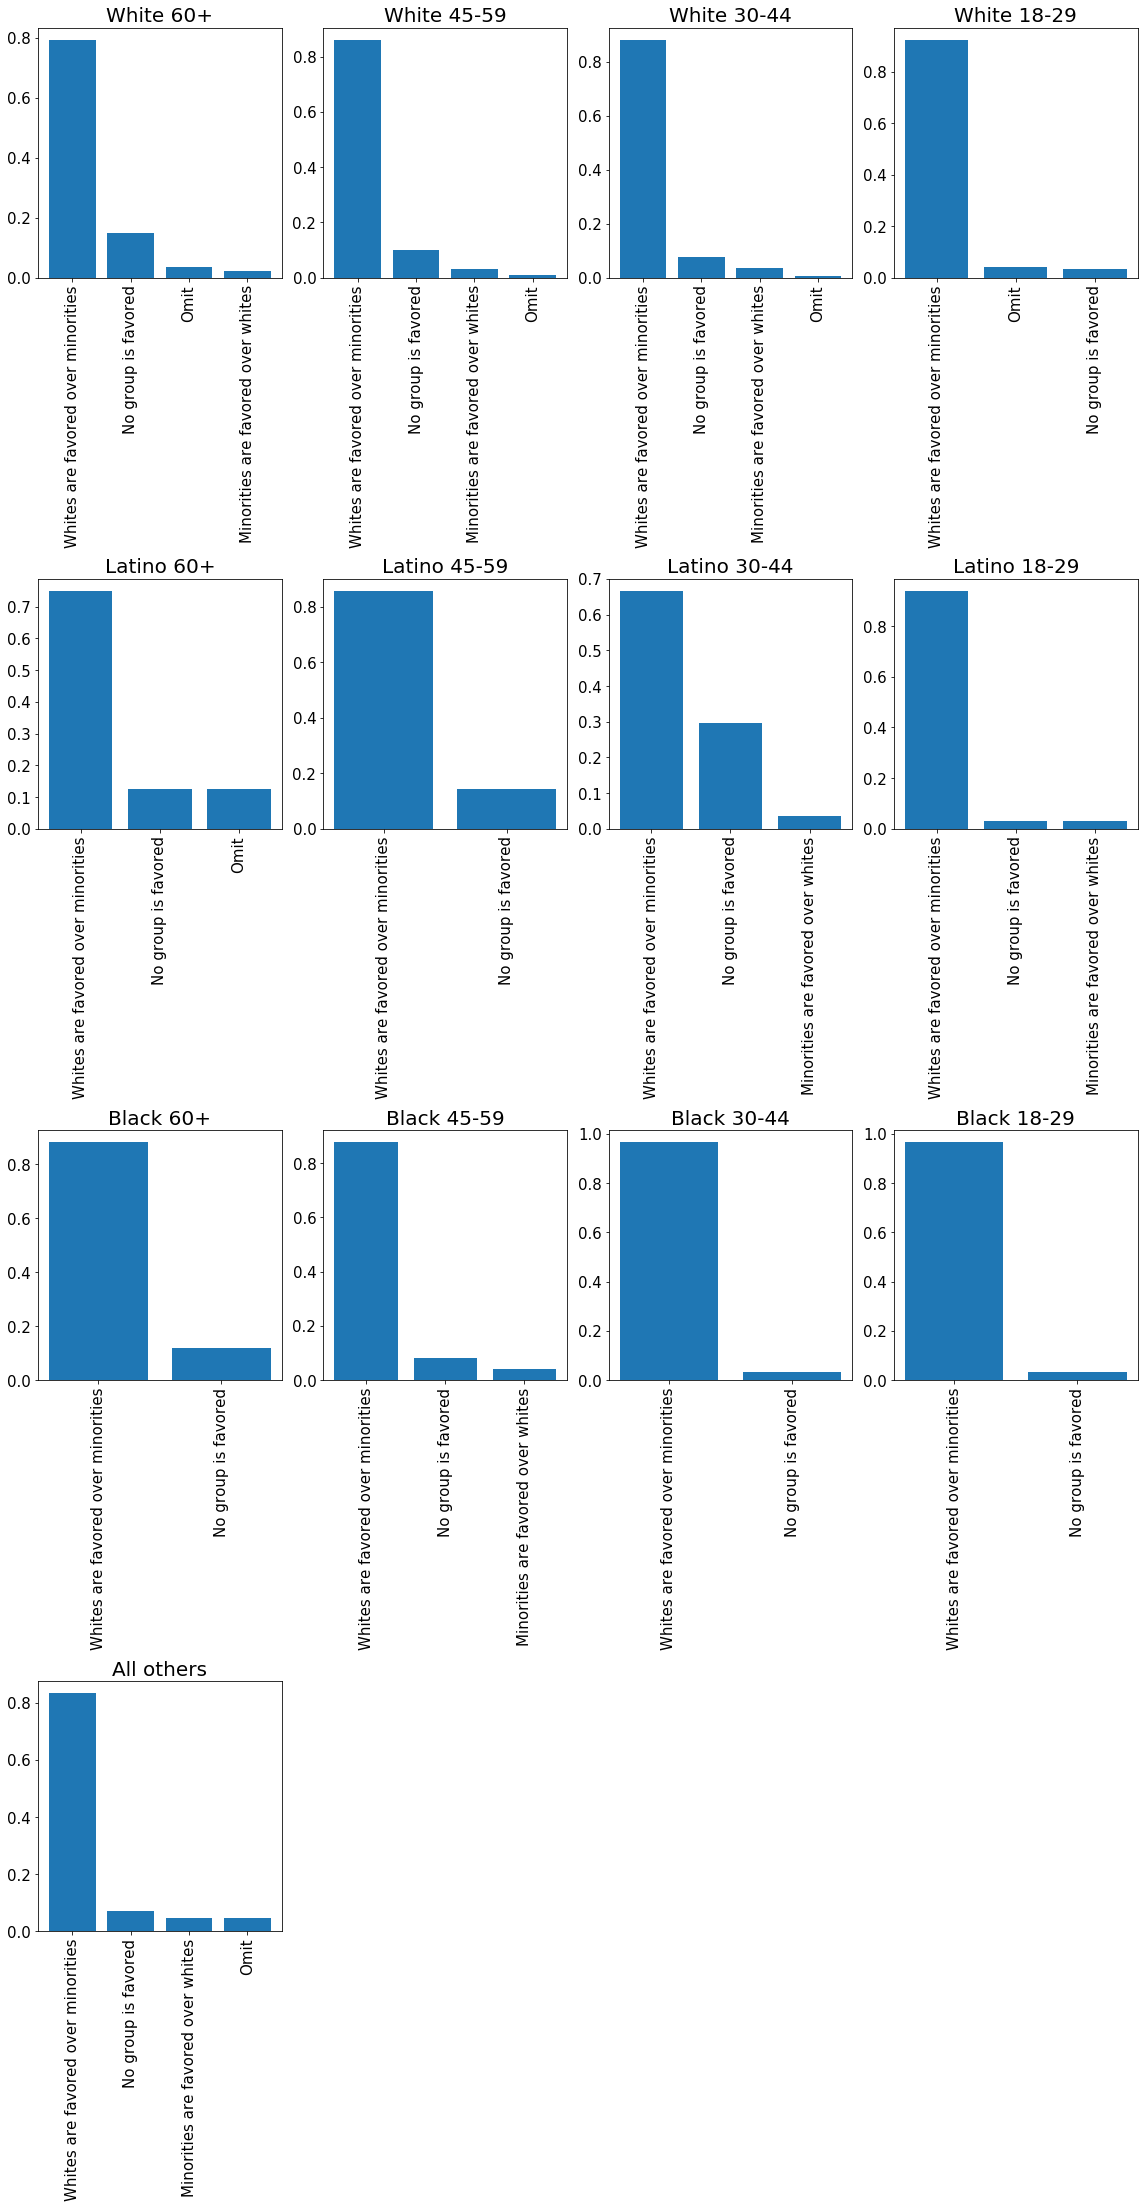

In [87]:
chart_simplifier(df_v2_lib_dems, group = group_age_by_race, filt = 'AGEBYRACE', issue= 'RACEFACTOR')


#### Which issue is most important to the participant by race

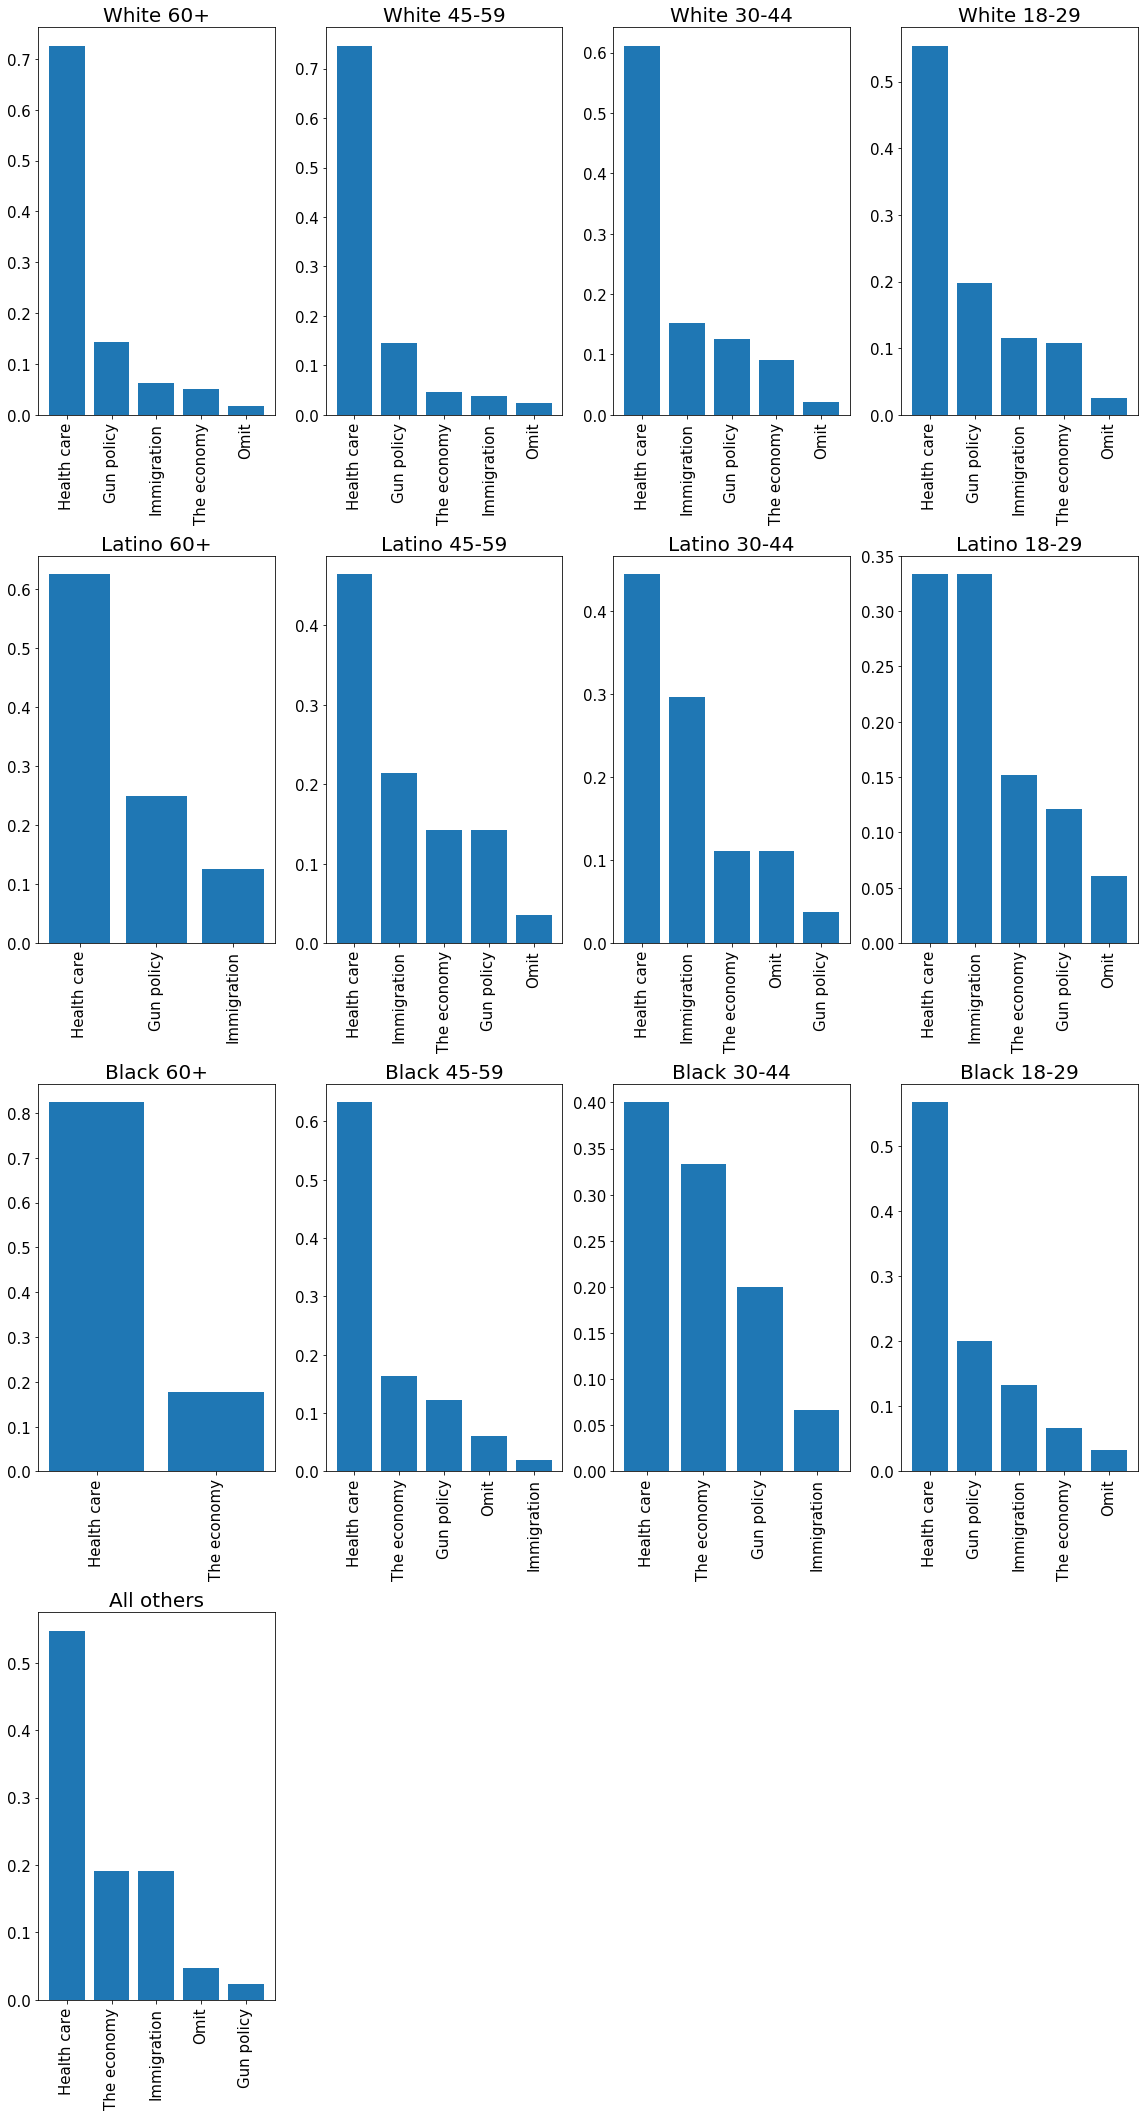

In [33]:
chart_simplifier(df_v2_lib_dems, group = group_age_by_race, filt = 'AGEBYRACE', issue= 'ISSUE18')


#### Plot show the participant's opinion of having people of color represented in office by race 

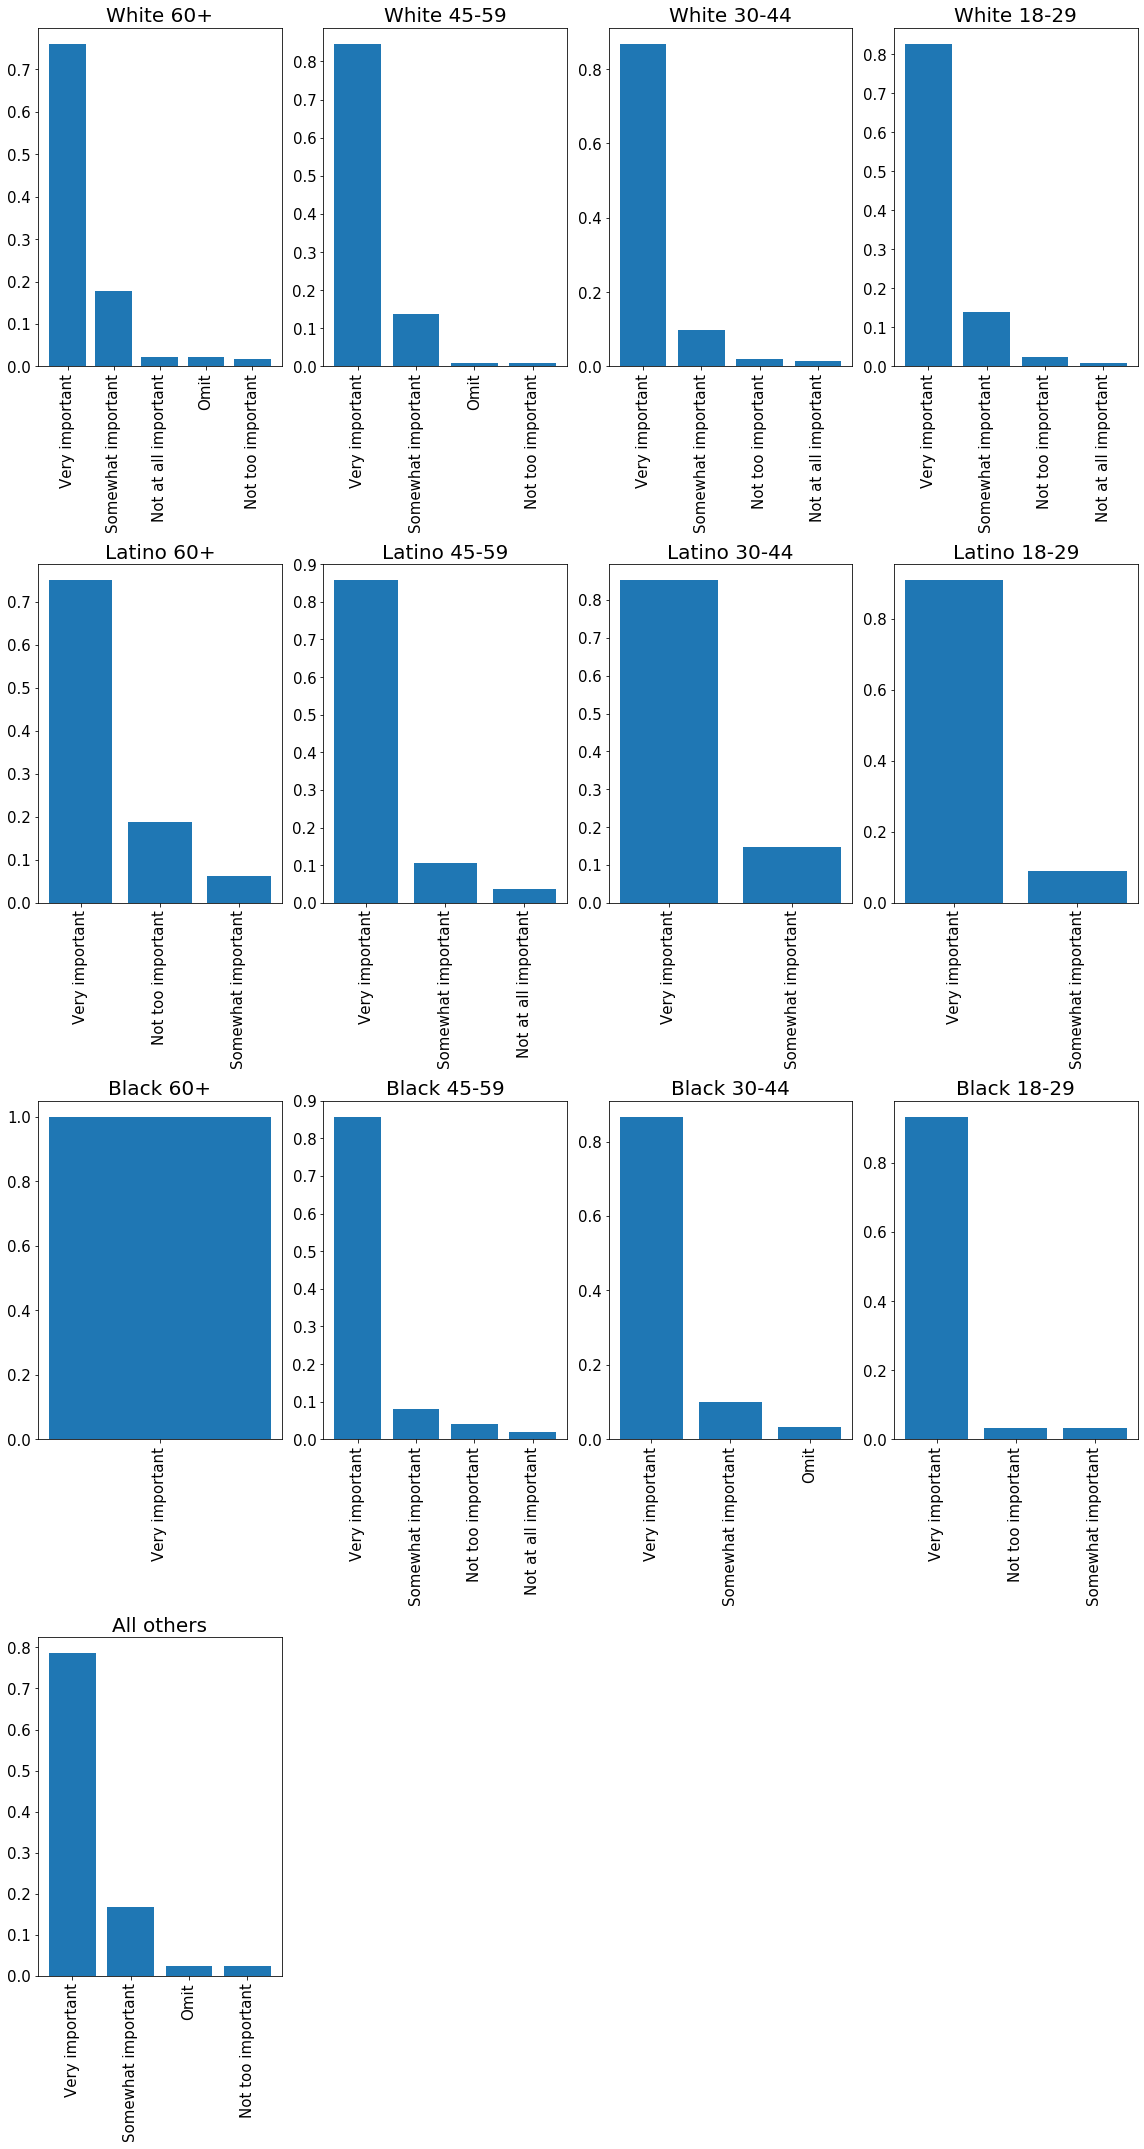

In [34]:
chart_simplifier(df_v2_lib_dems, group = group_age_by_race, filt = 'AGEBYRACE', issue= 'RACE18')


### Mod/Conservative Democrats 

#### Plot of Impeachment approval by race 

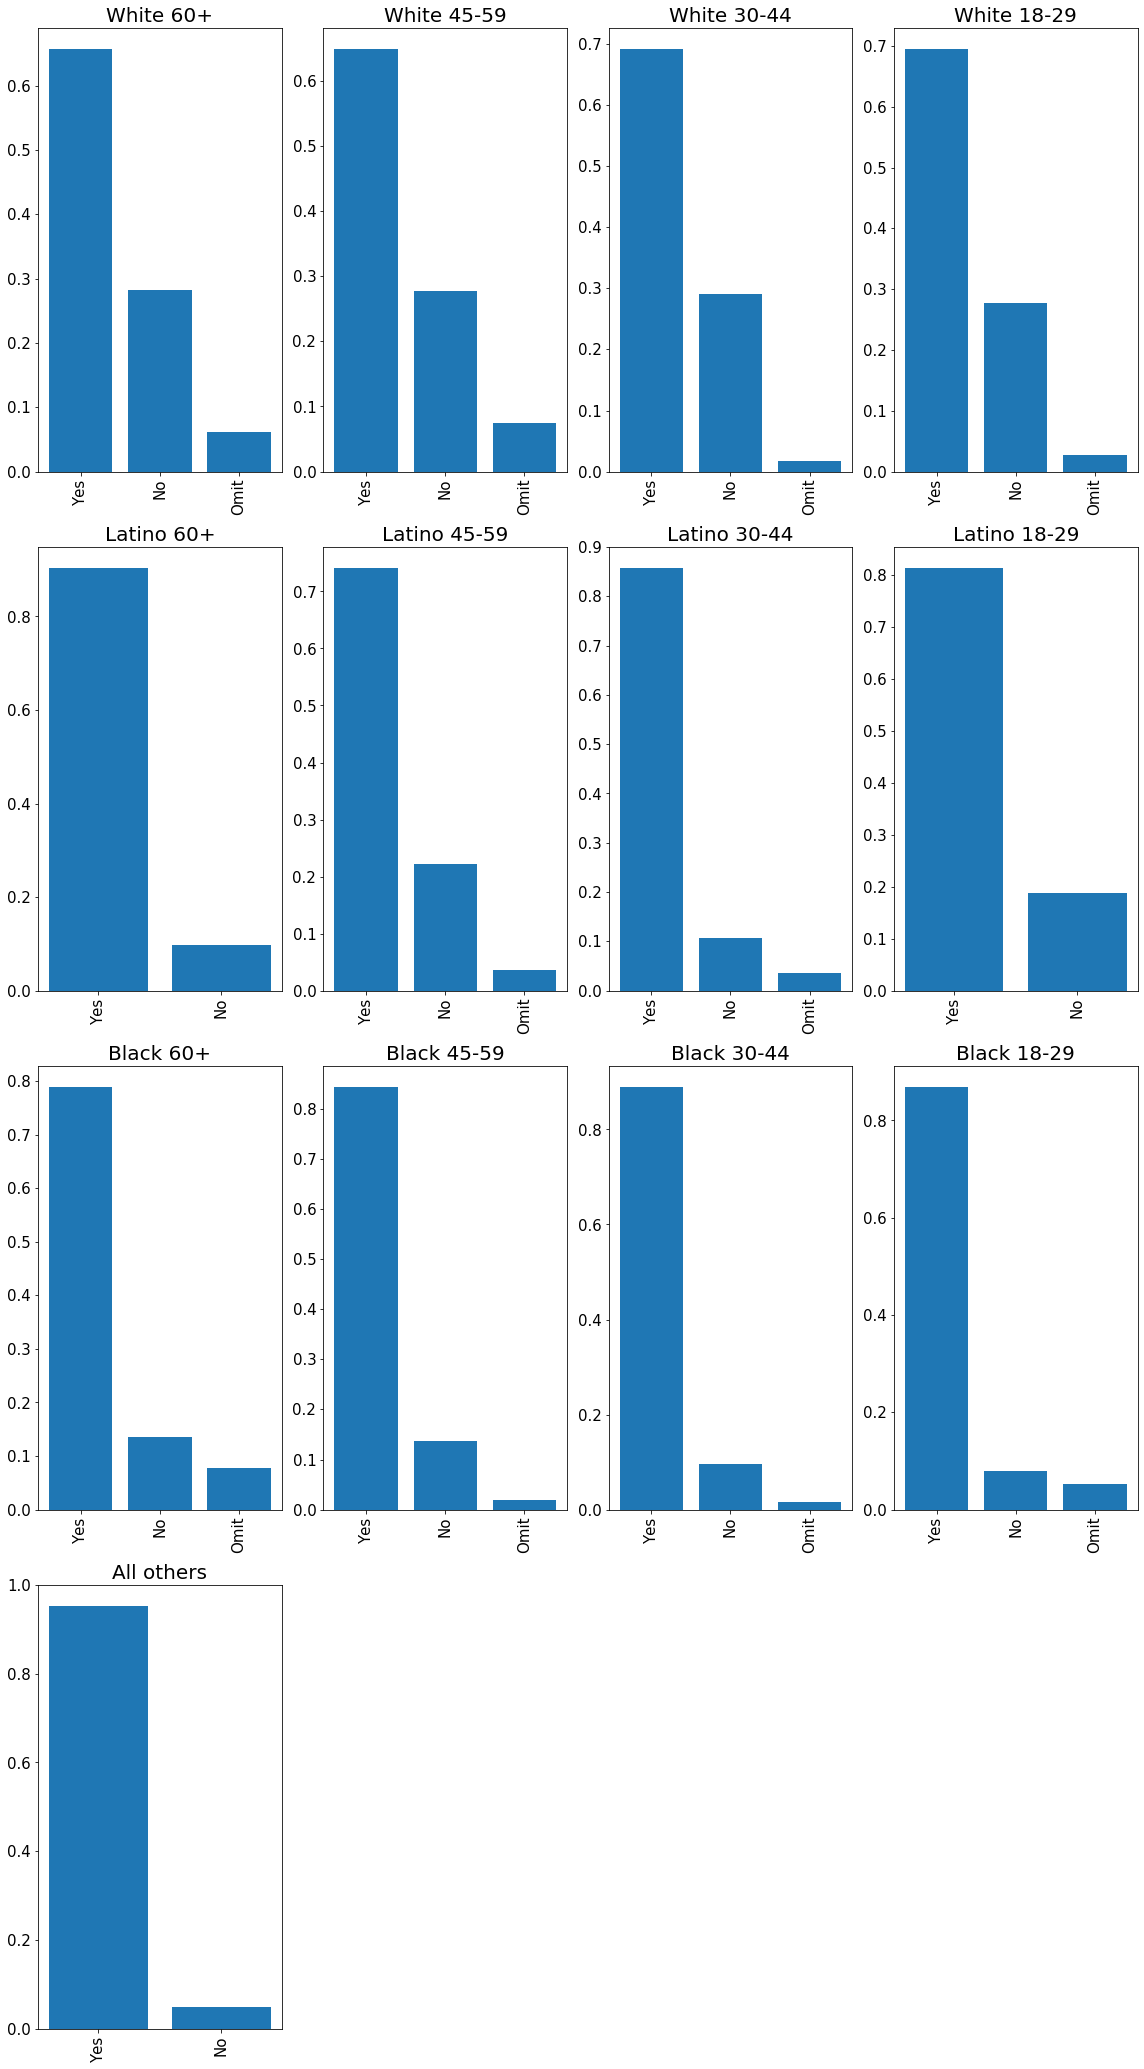

In [36]:
chart_simplifier(df_v2_mod_con_dems, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'IMPEACH18')


#### Plot of Whether the participant thinks the Russia investigation was justified by race

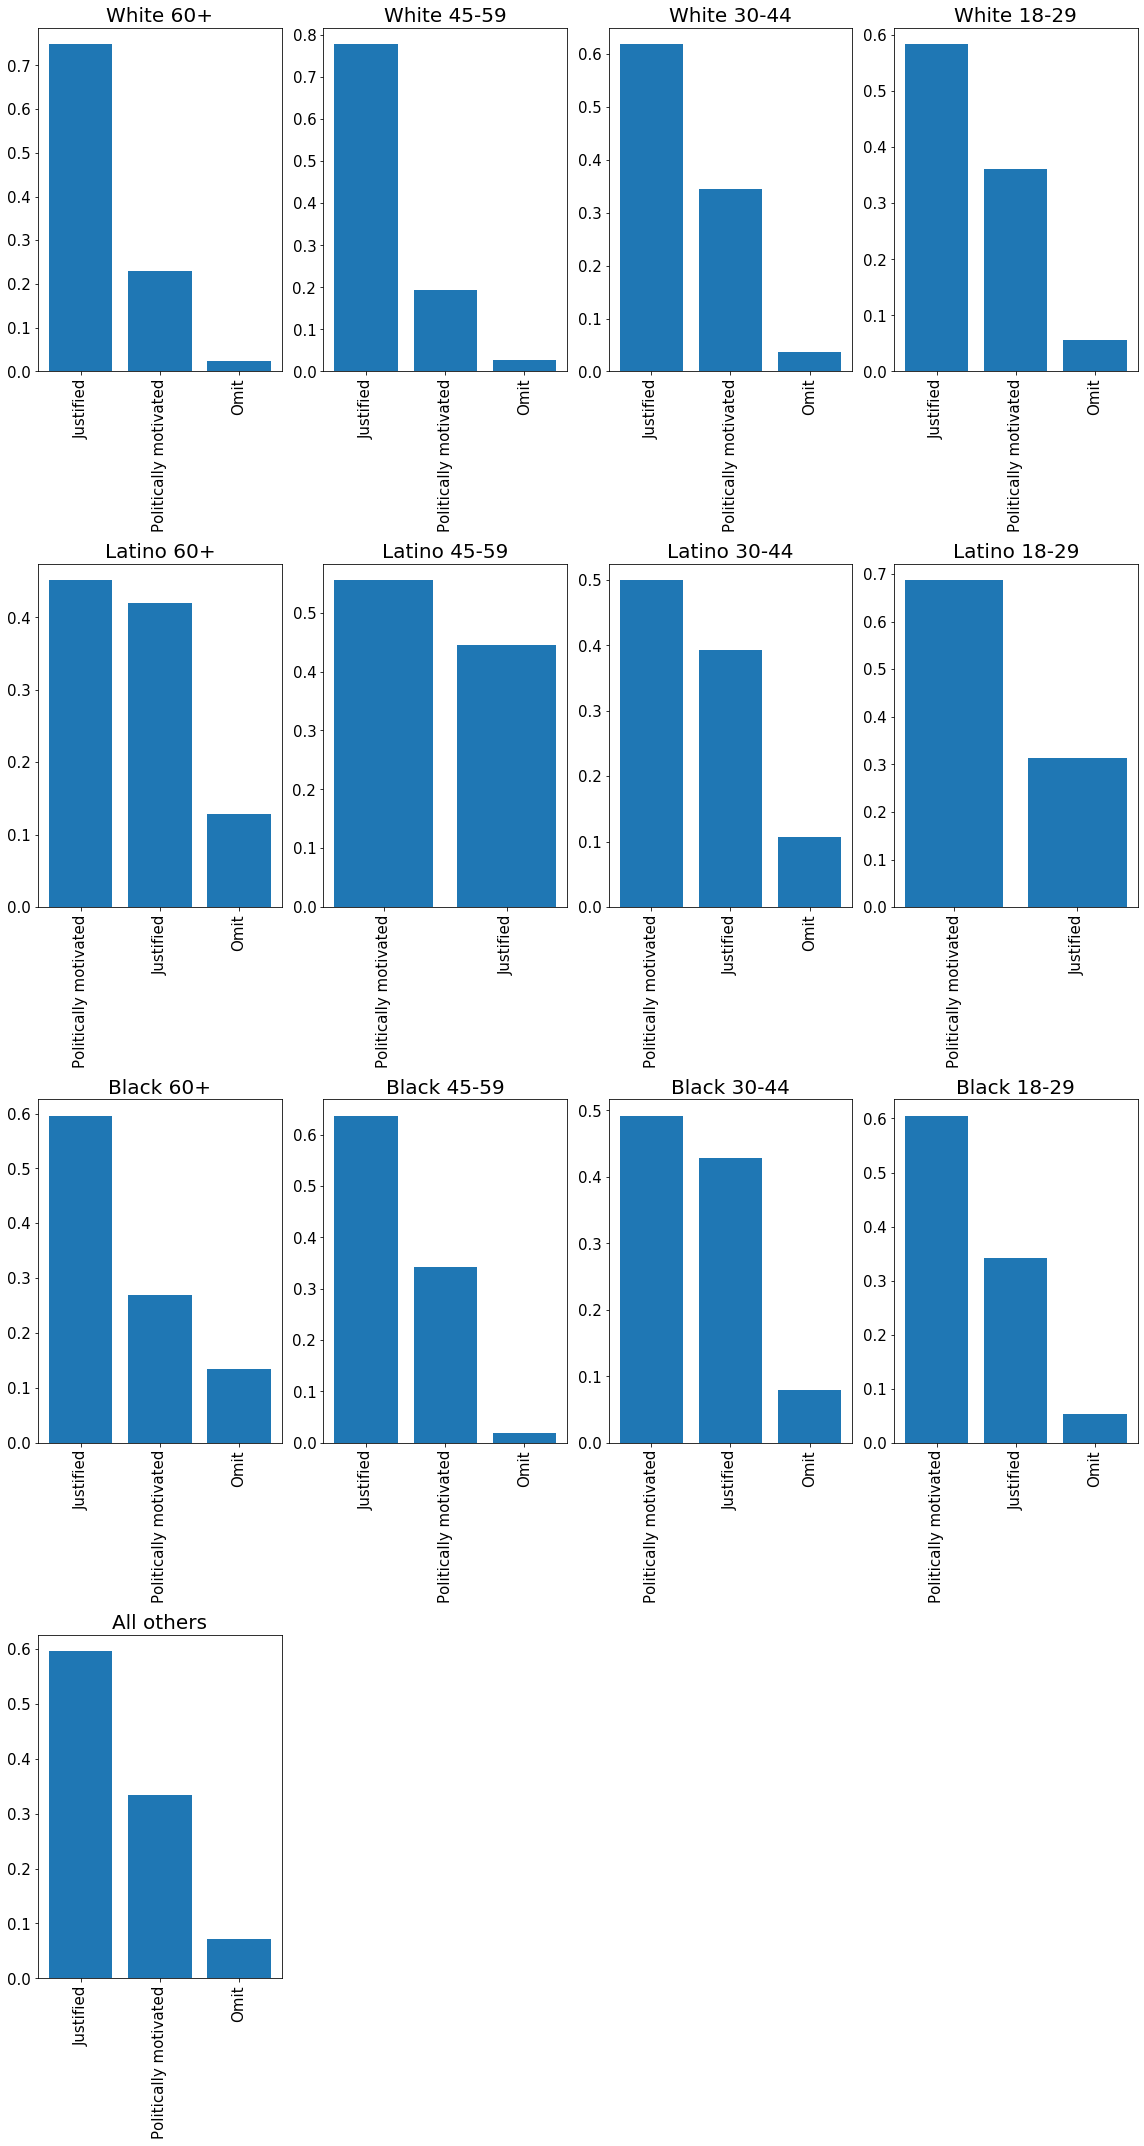

In [37]:
chart_simplifier(df_v2_mod_con_dems, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'RUSSIA18')


#### Plot of the participant's approval of Trump's immigration policies by race

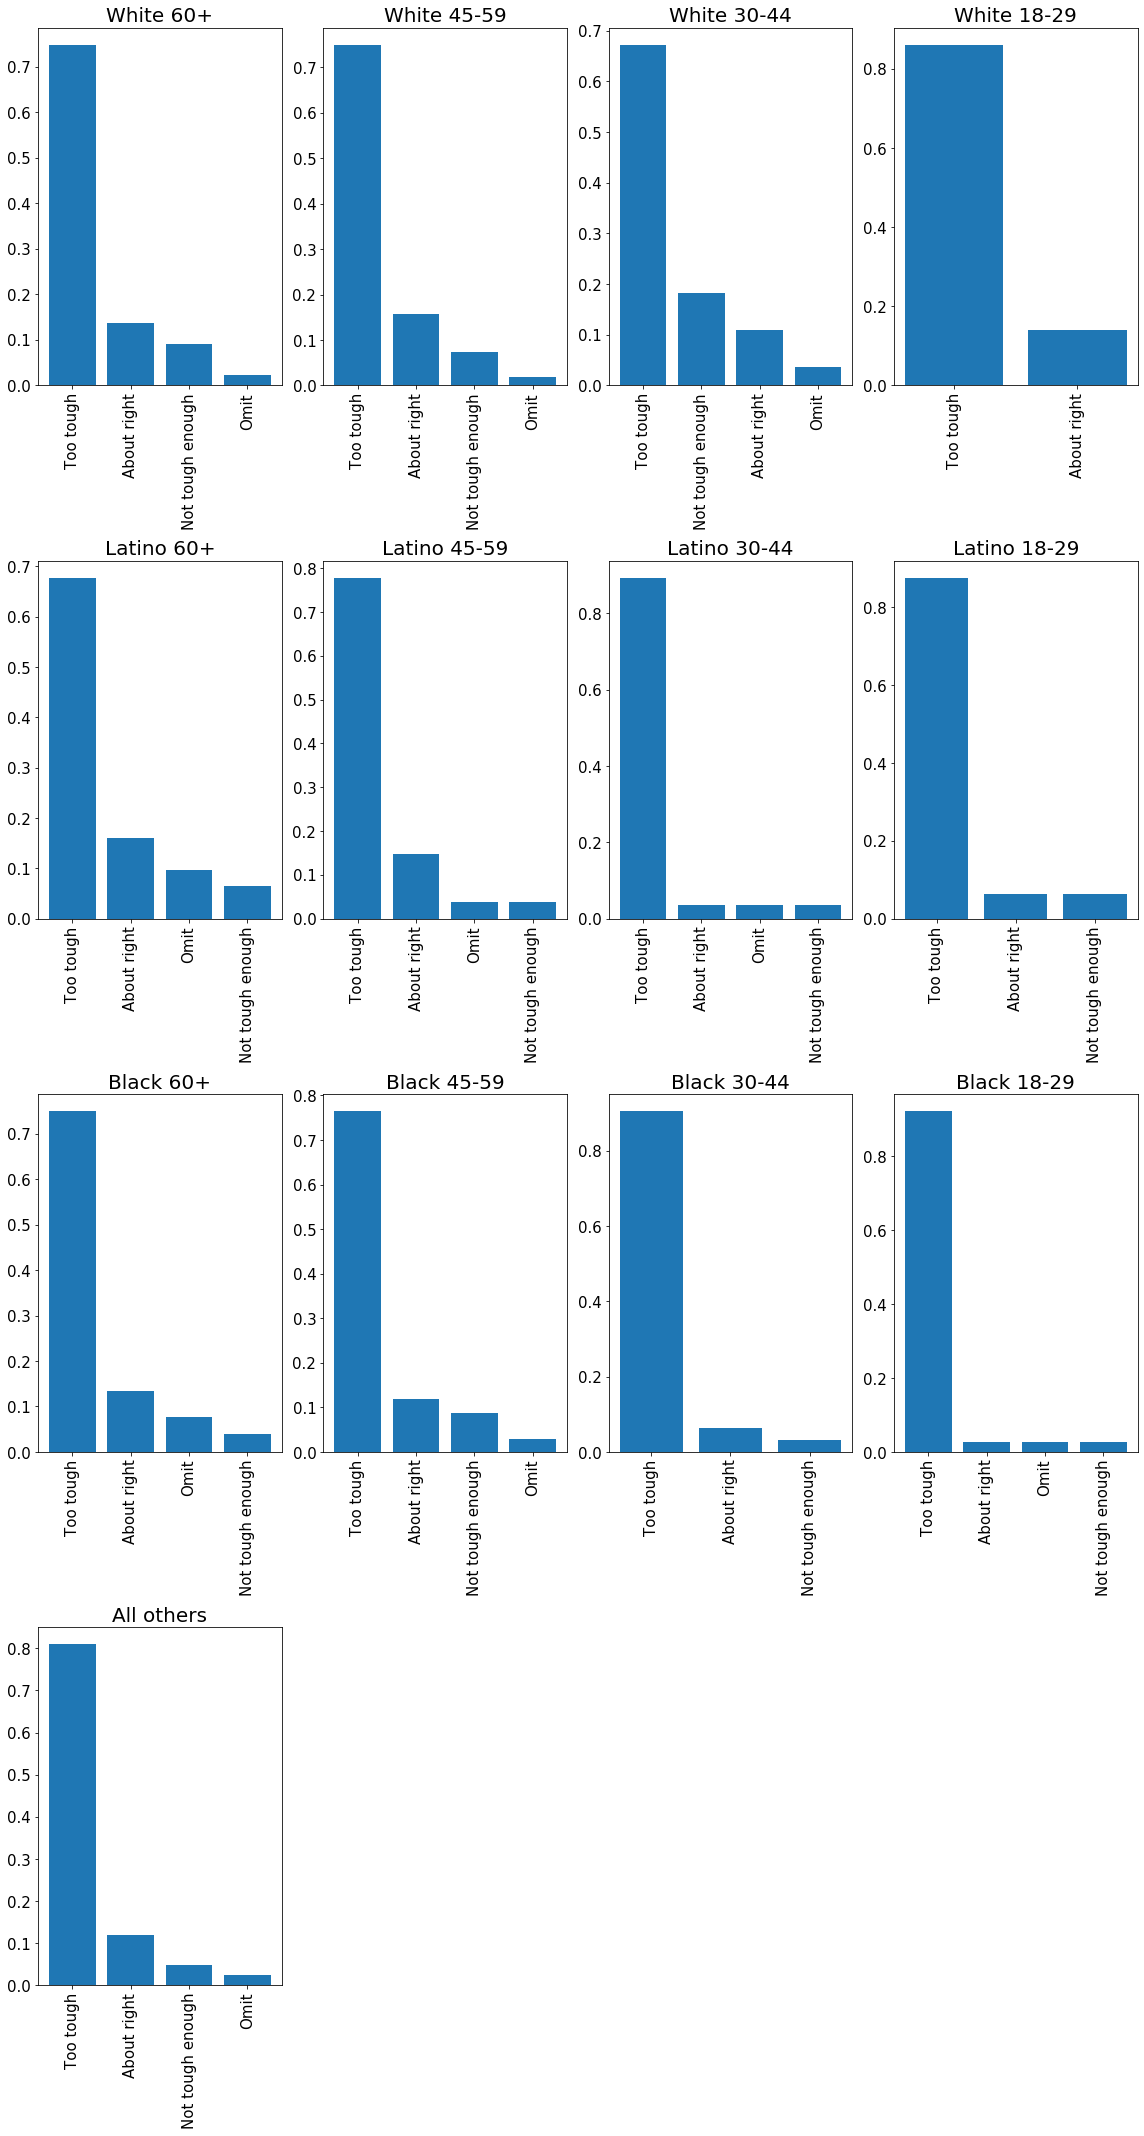

In [38]:
chart_simplifier(df_v2_mod_con_dems, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'TRUMPIMM')


#### Plot of the participants opinion of the treatment of minorities versus white people by race 

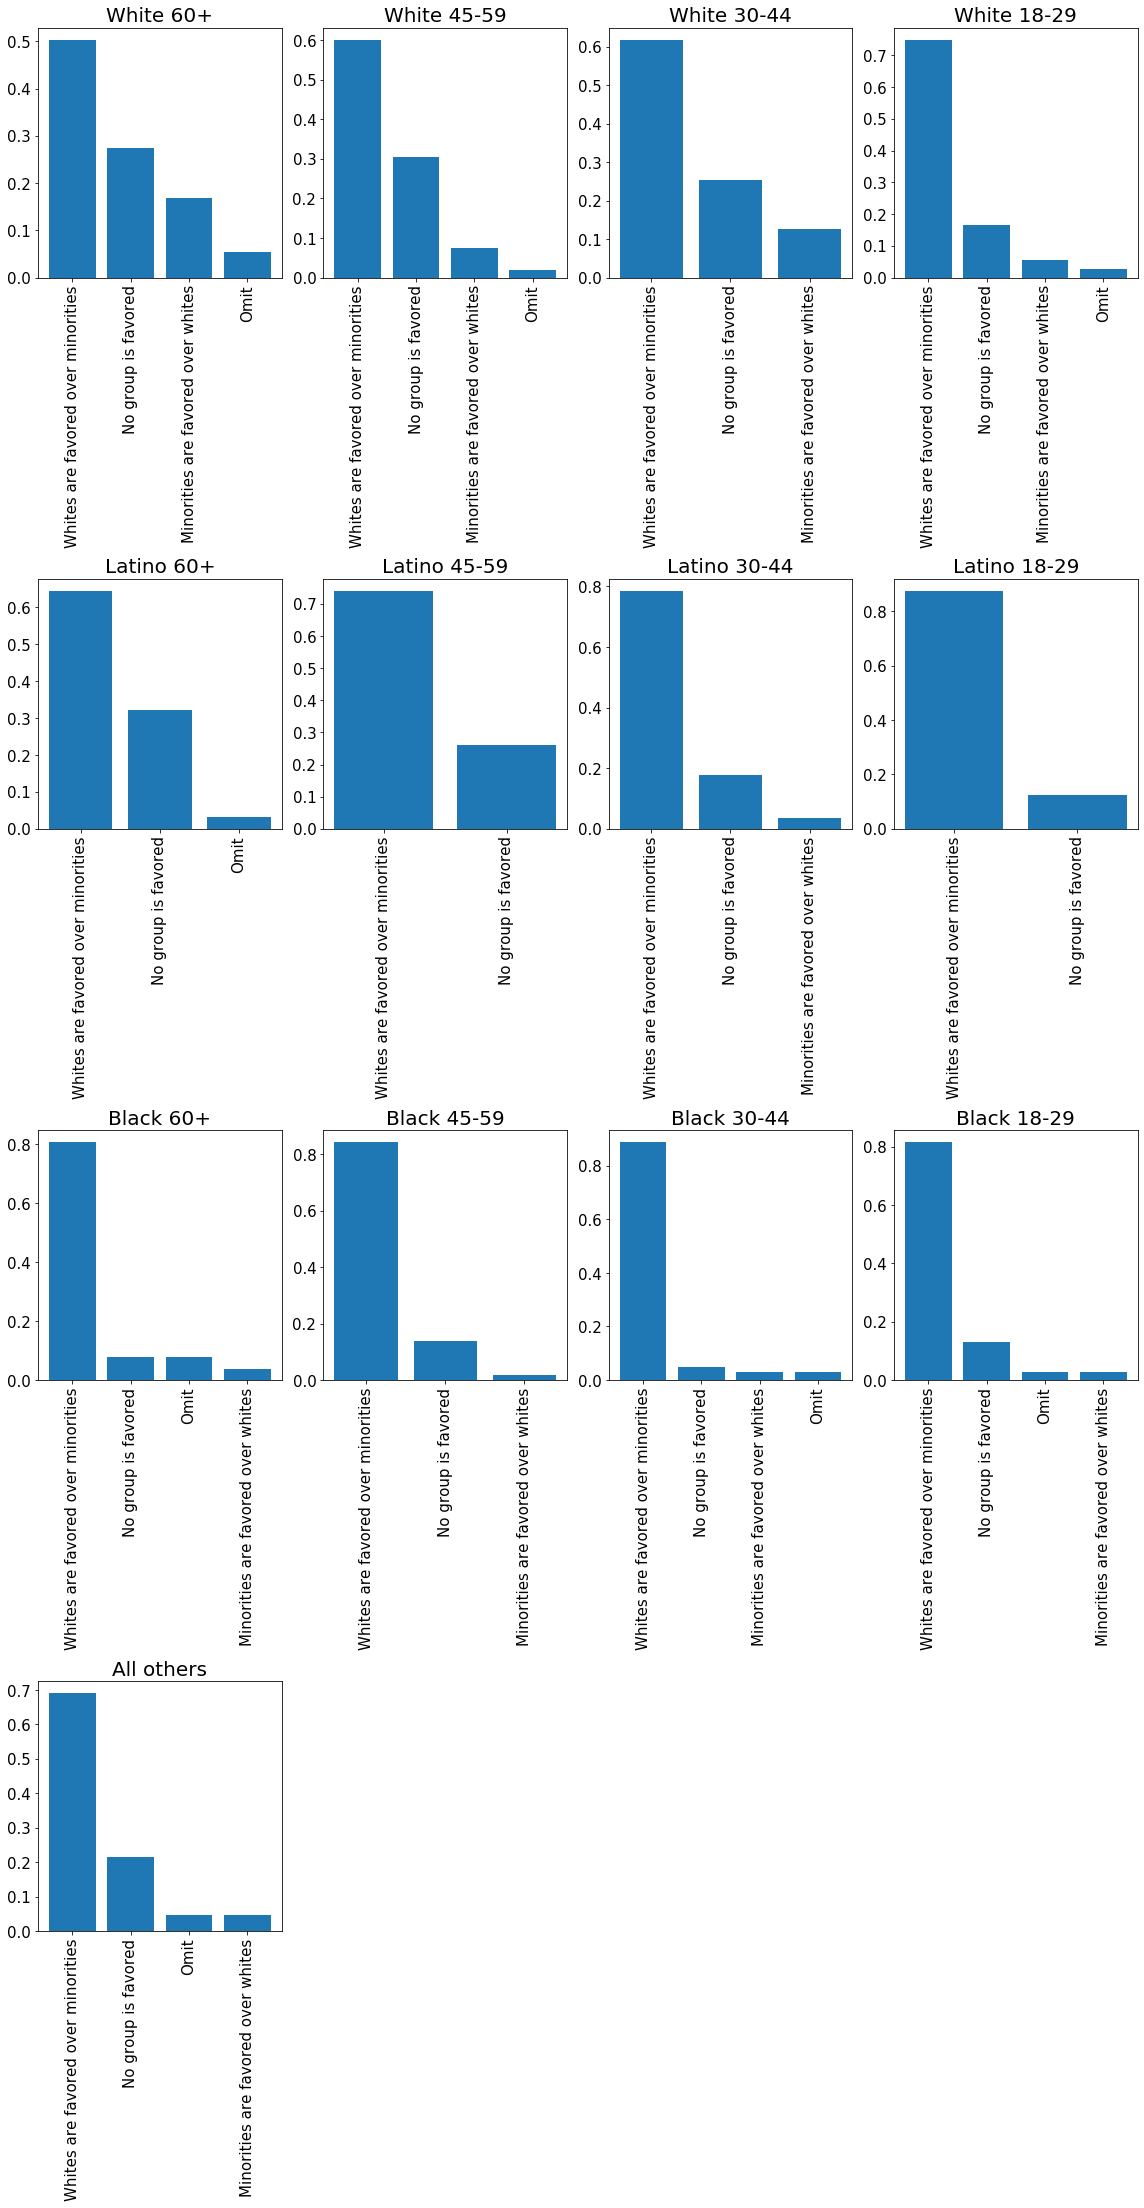

In [80]:
chart_simplifier(df_v2_mod_con_dems, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACEFACTOR')


#### Which issue is most important to the participant by race

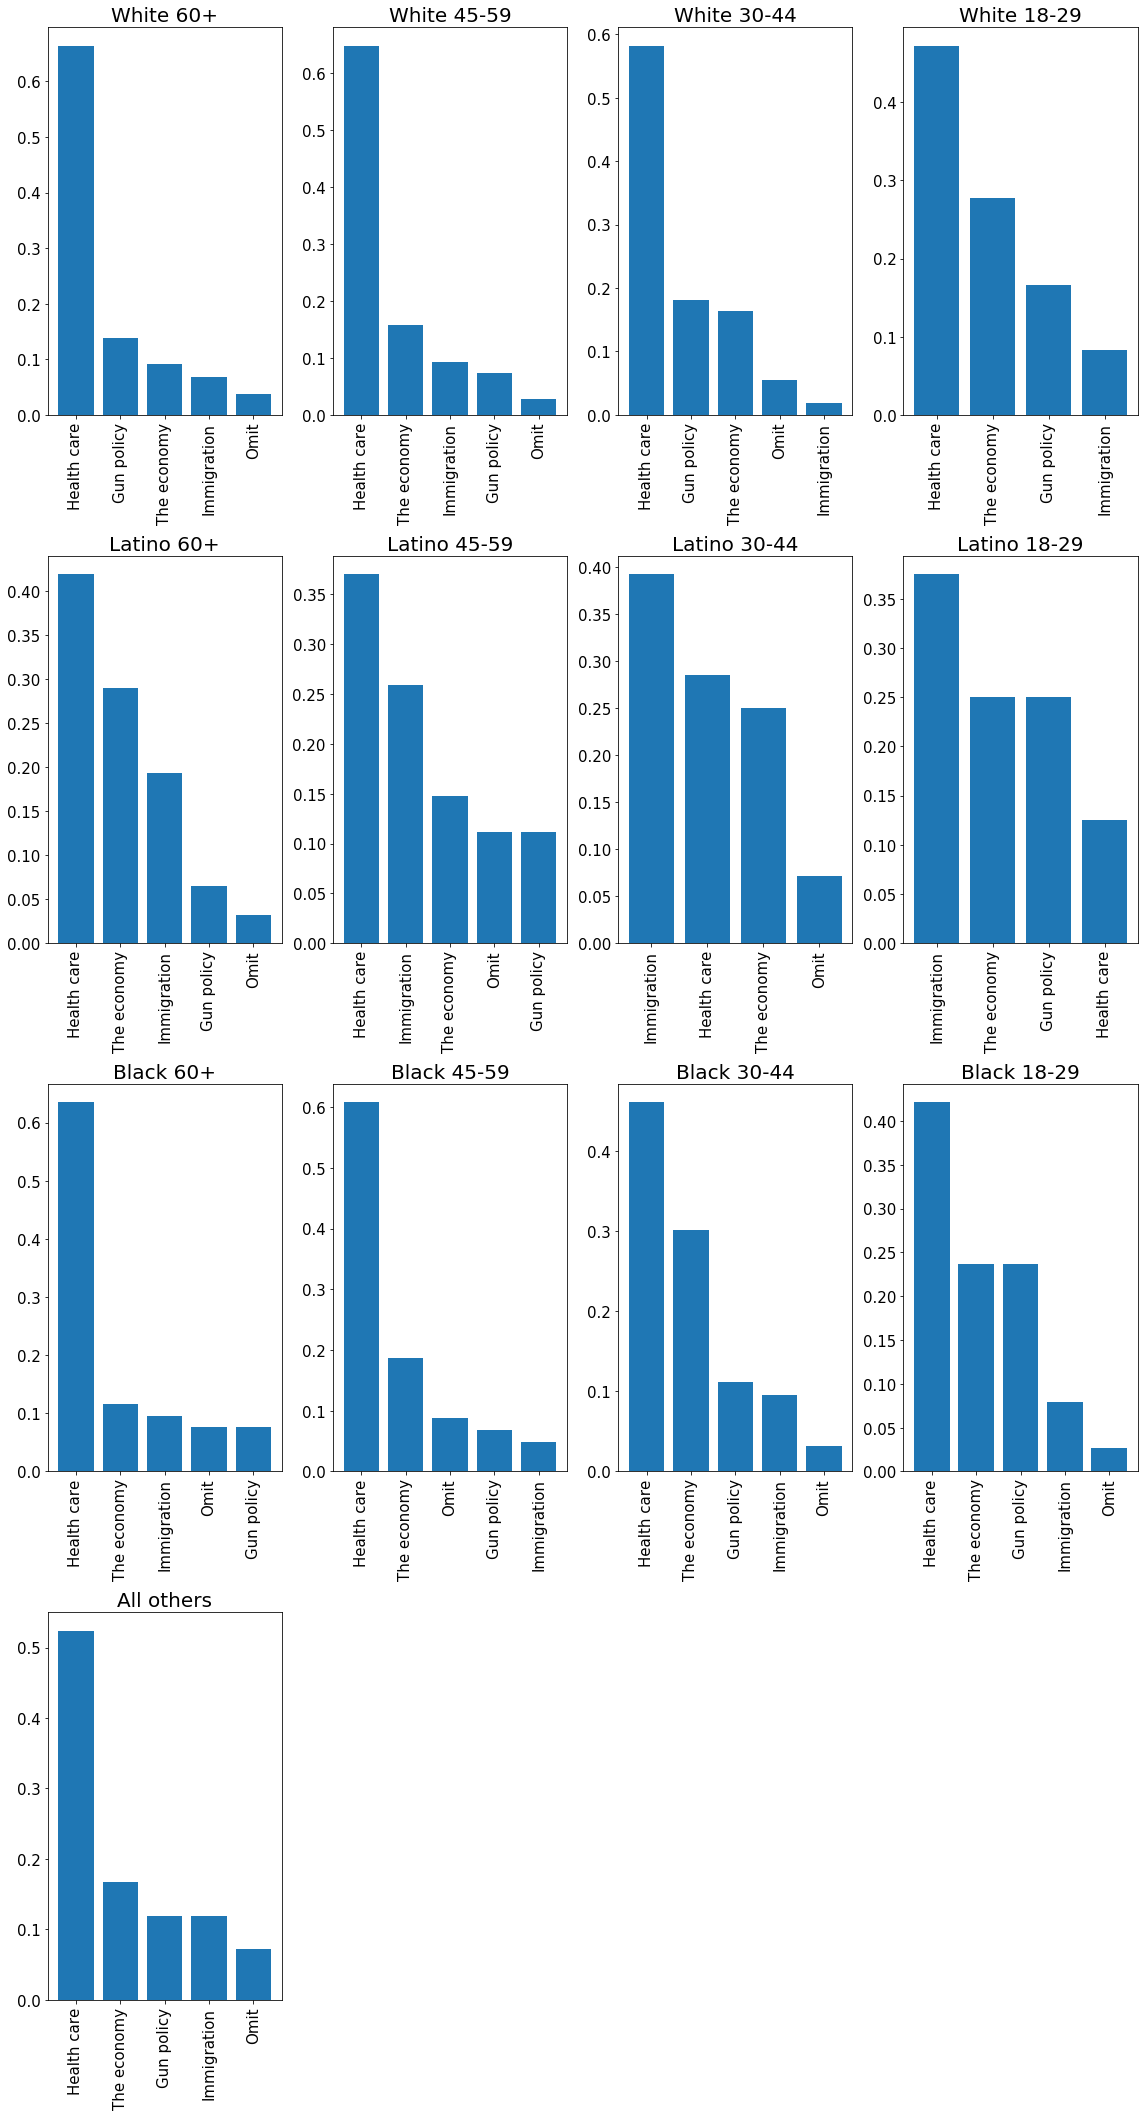

In [40]:
chart_simplifier(df_v2_mod_con_dems, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'ISSUE18')


#### Plot show the participant's opinion of having people of color represented in office by race 

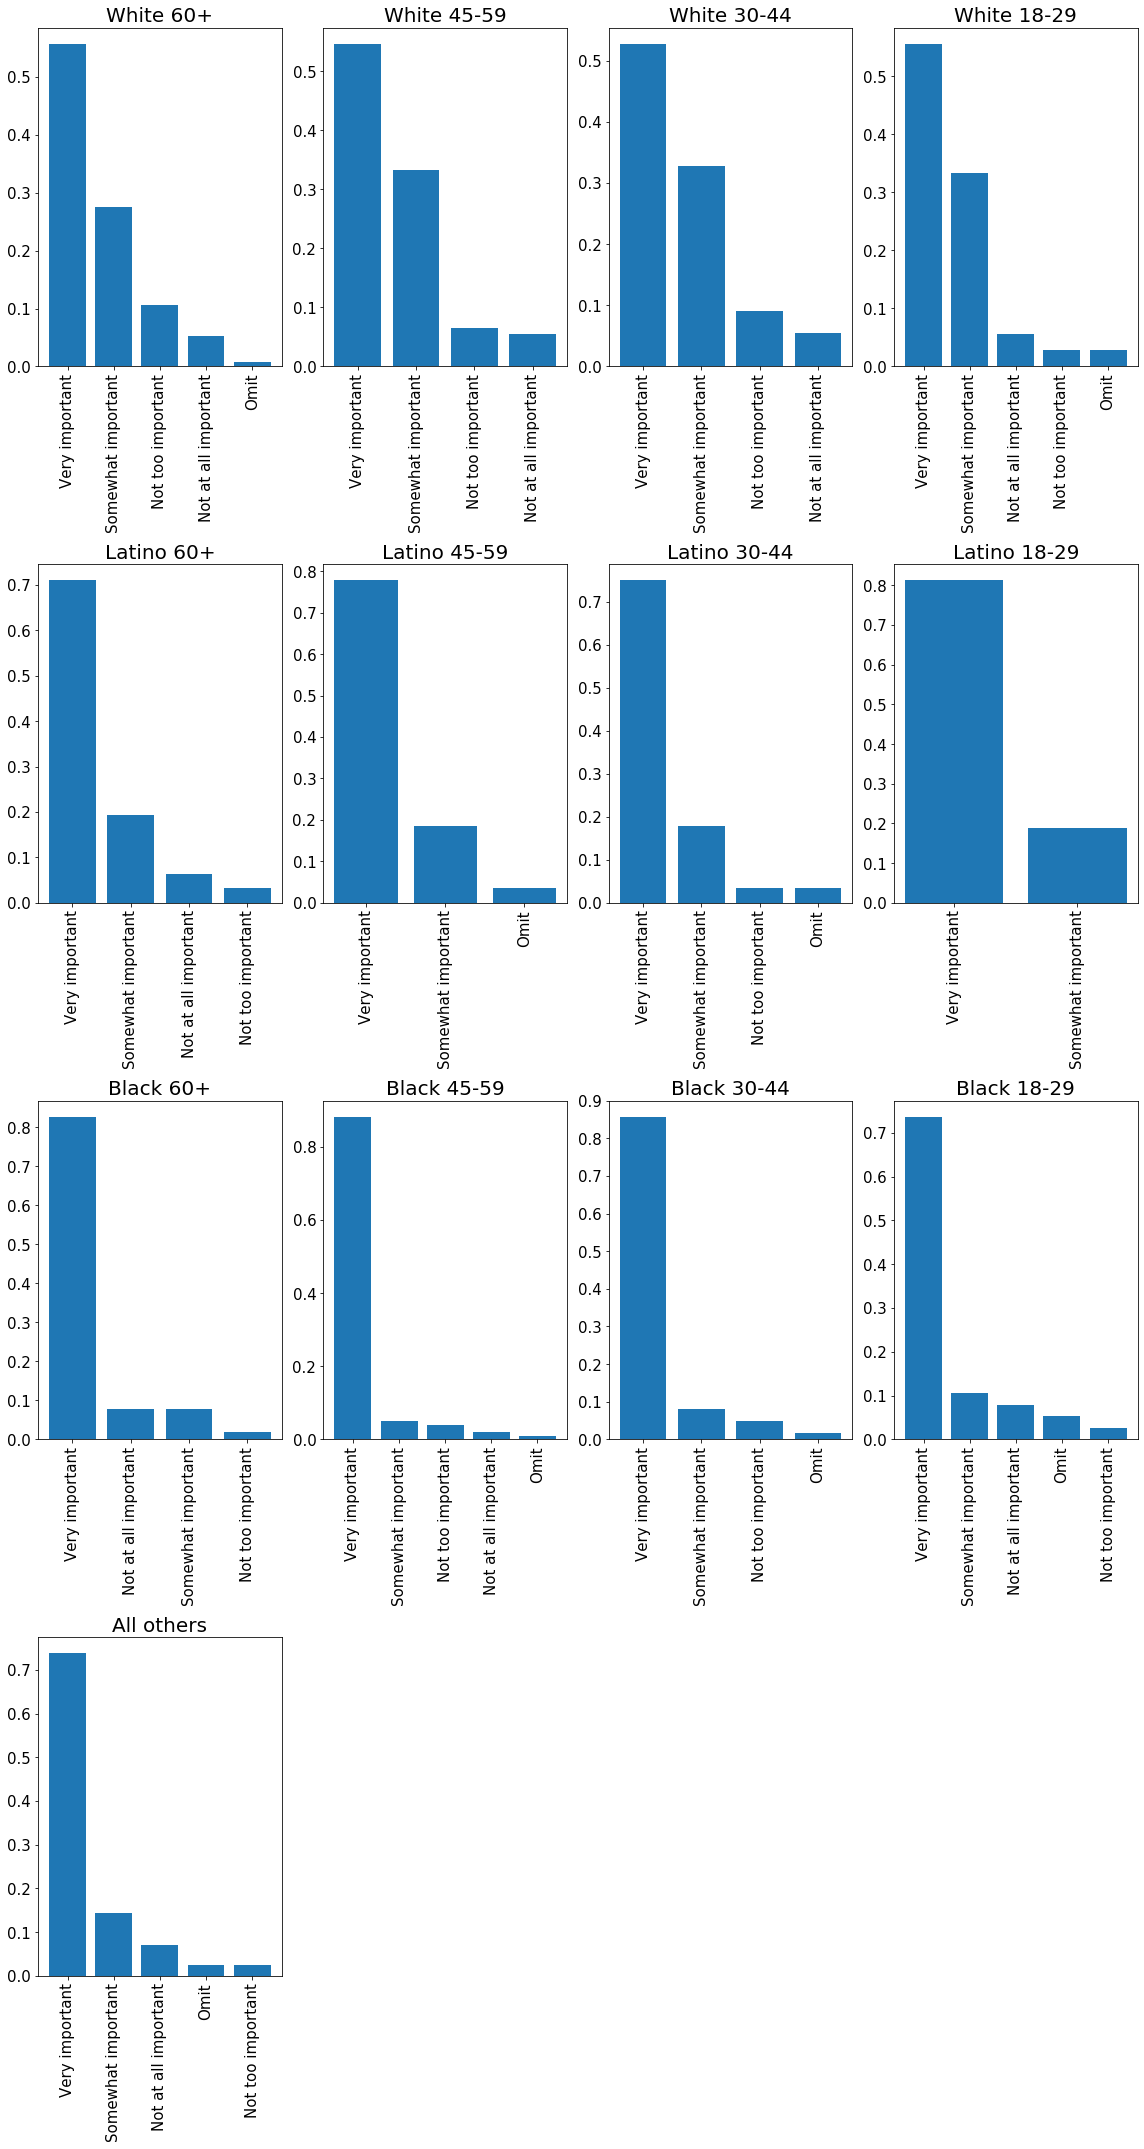

In [41]:
chart_simplifier(df_v2_mod_con_dems, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACE18')


### Liberal Independents 

#### Plot of Impeachment approval by race 

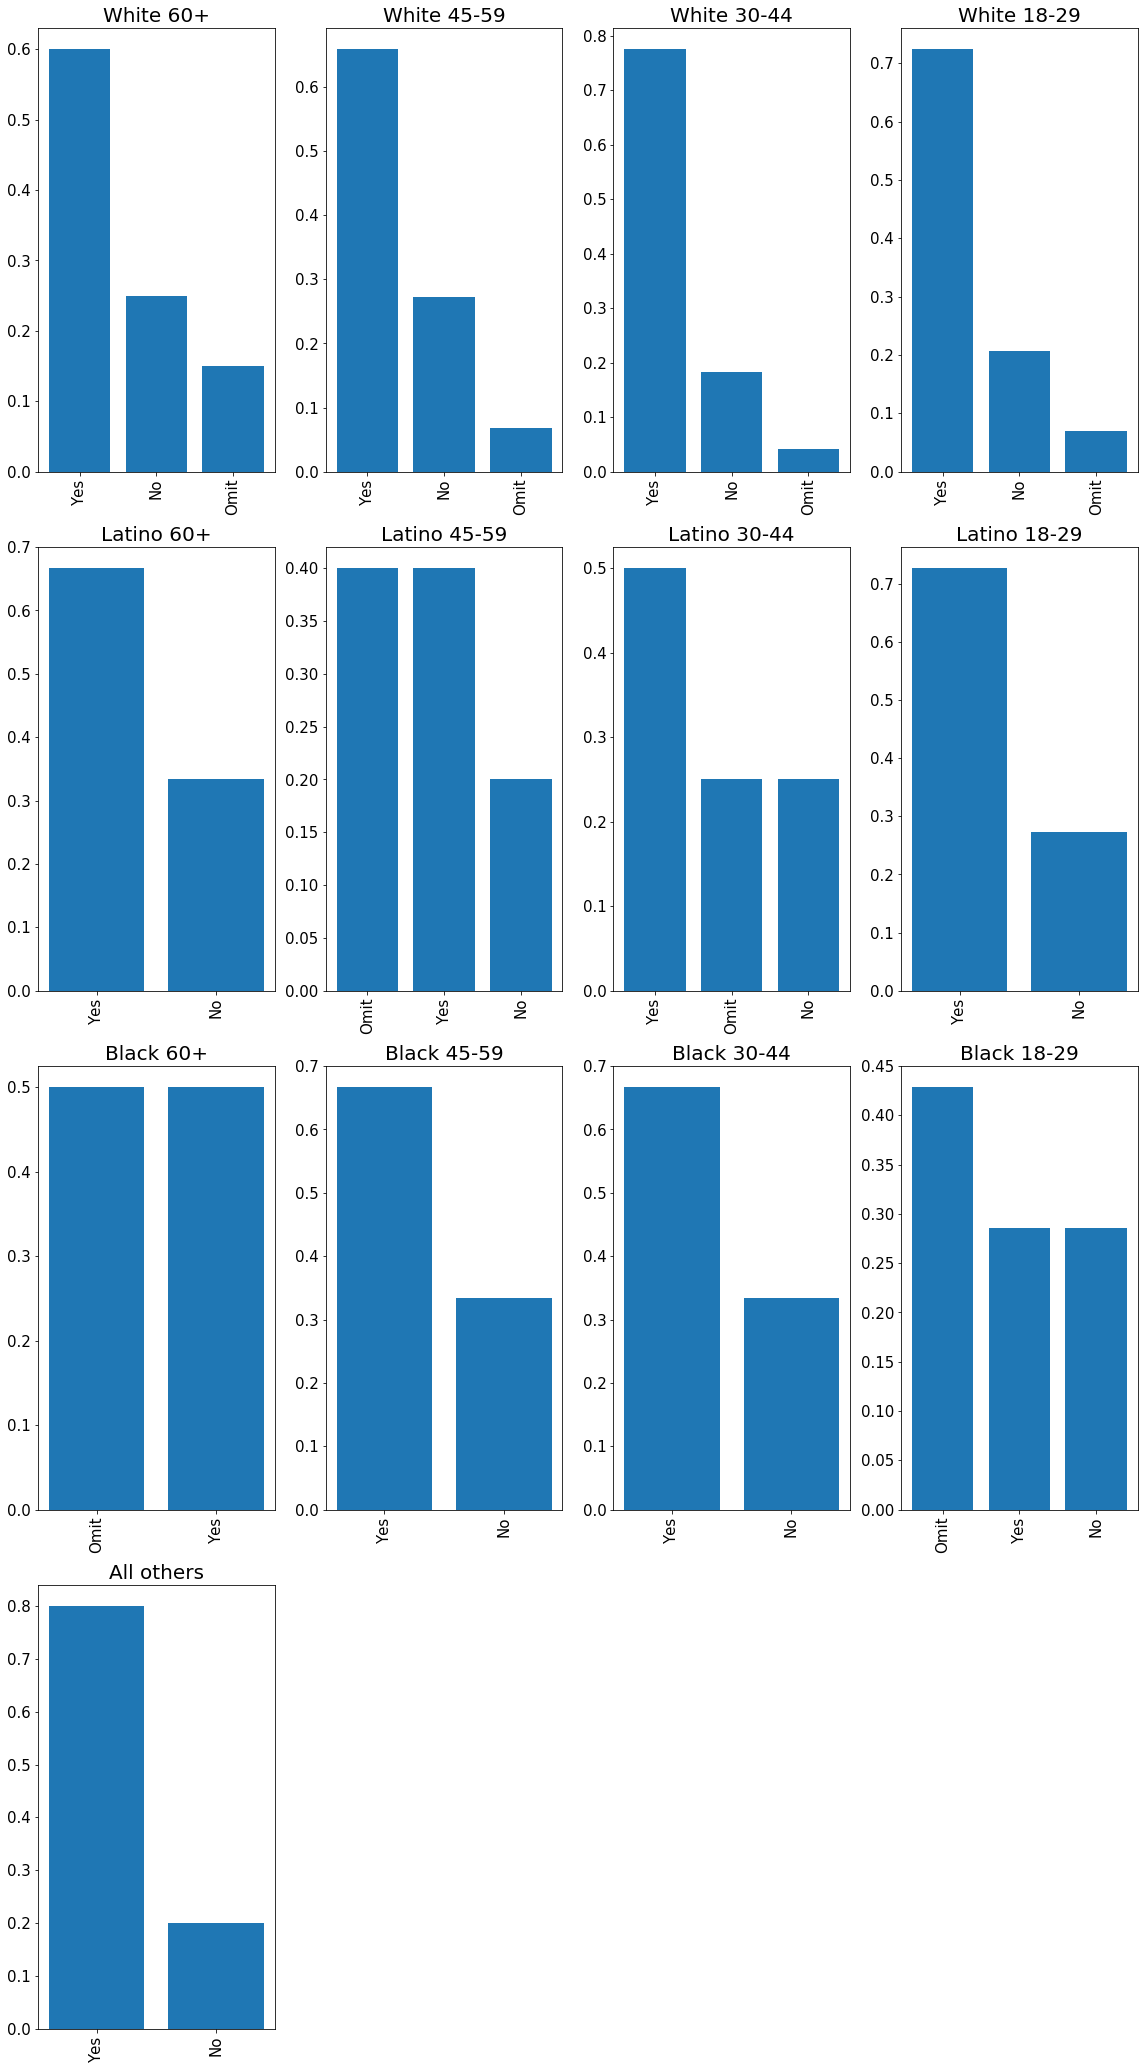

In [42]:
chart_simplifier(df_v2_lib_ind , group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'IMPEACH18')


#### Plot of Whether the participant thinks the Russia investigation was justified by race

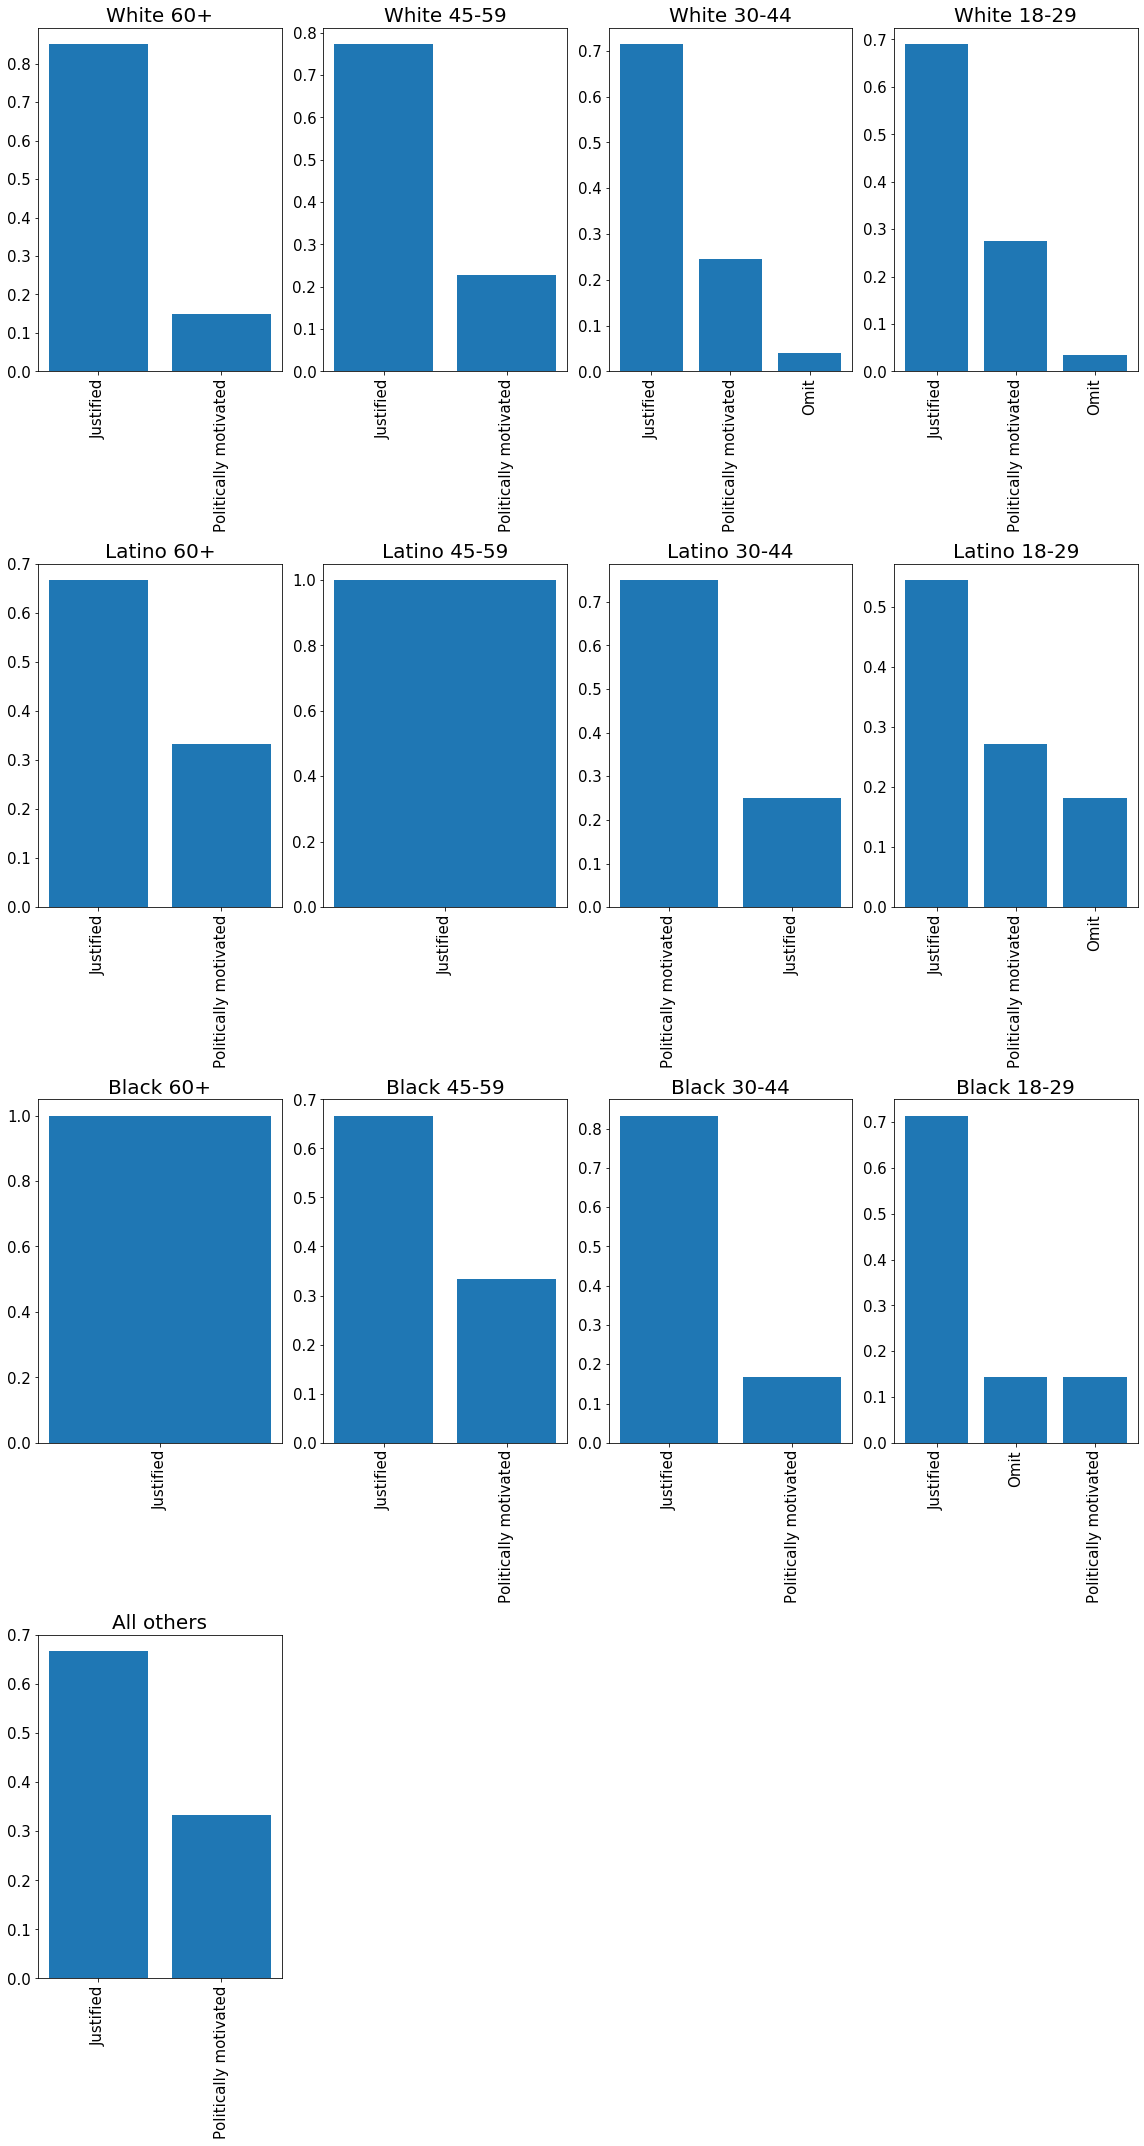

In [43]:
chart_simplifier(df_v2_lib_ind, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'RUSSIA18')


#### Plot of the participant's approval of Trump's immigration policies by race

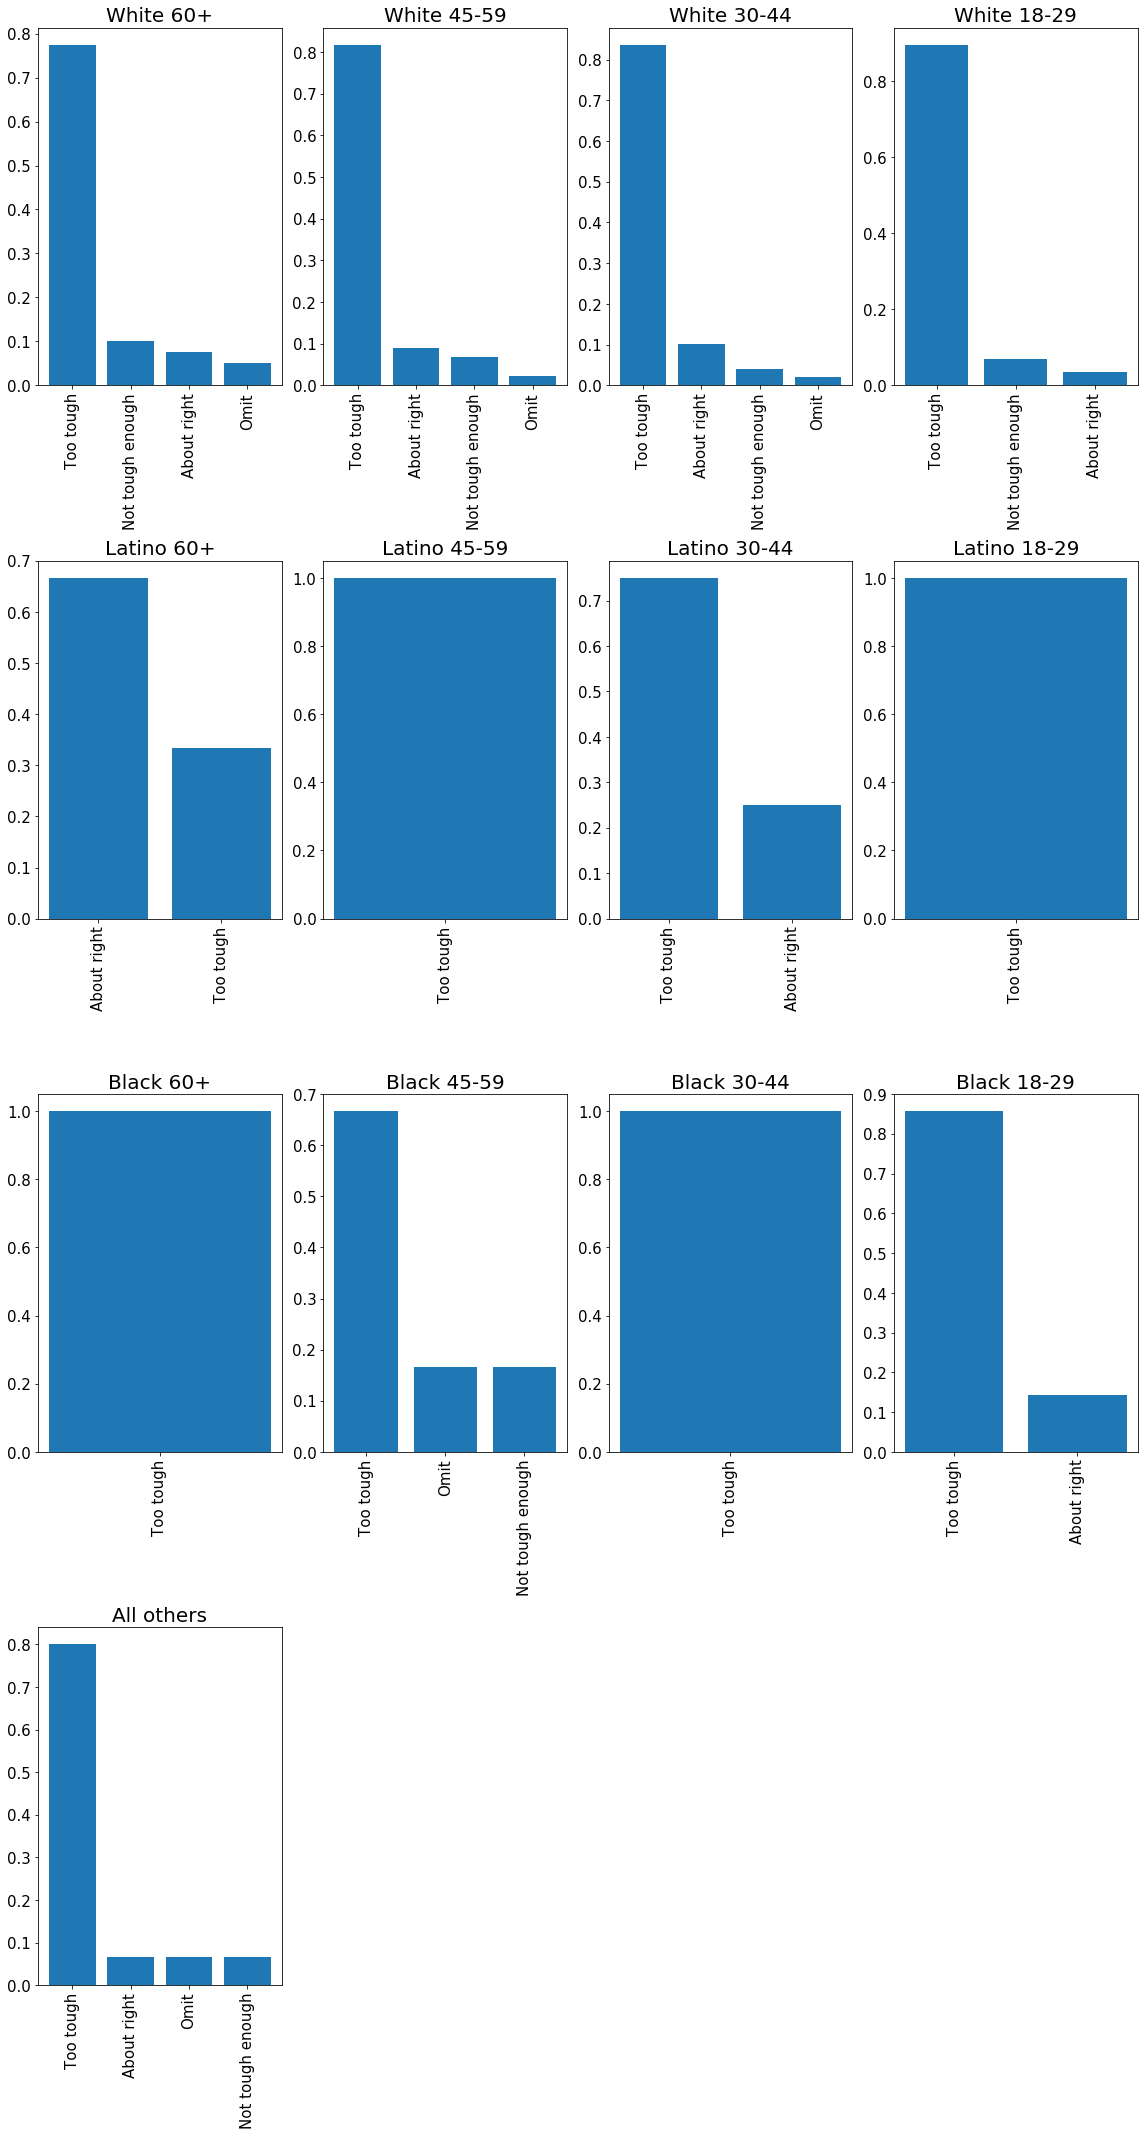

In [44]:
chart_simplifier(df_v2_lib_ind, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'TRUMPIMM')


#### Plot of the participants opinion of the treatment of minorities versus white people by race 

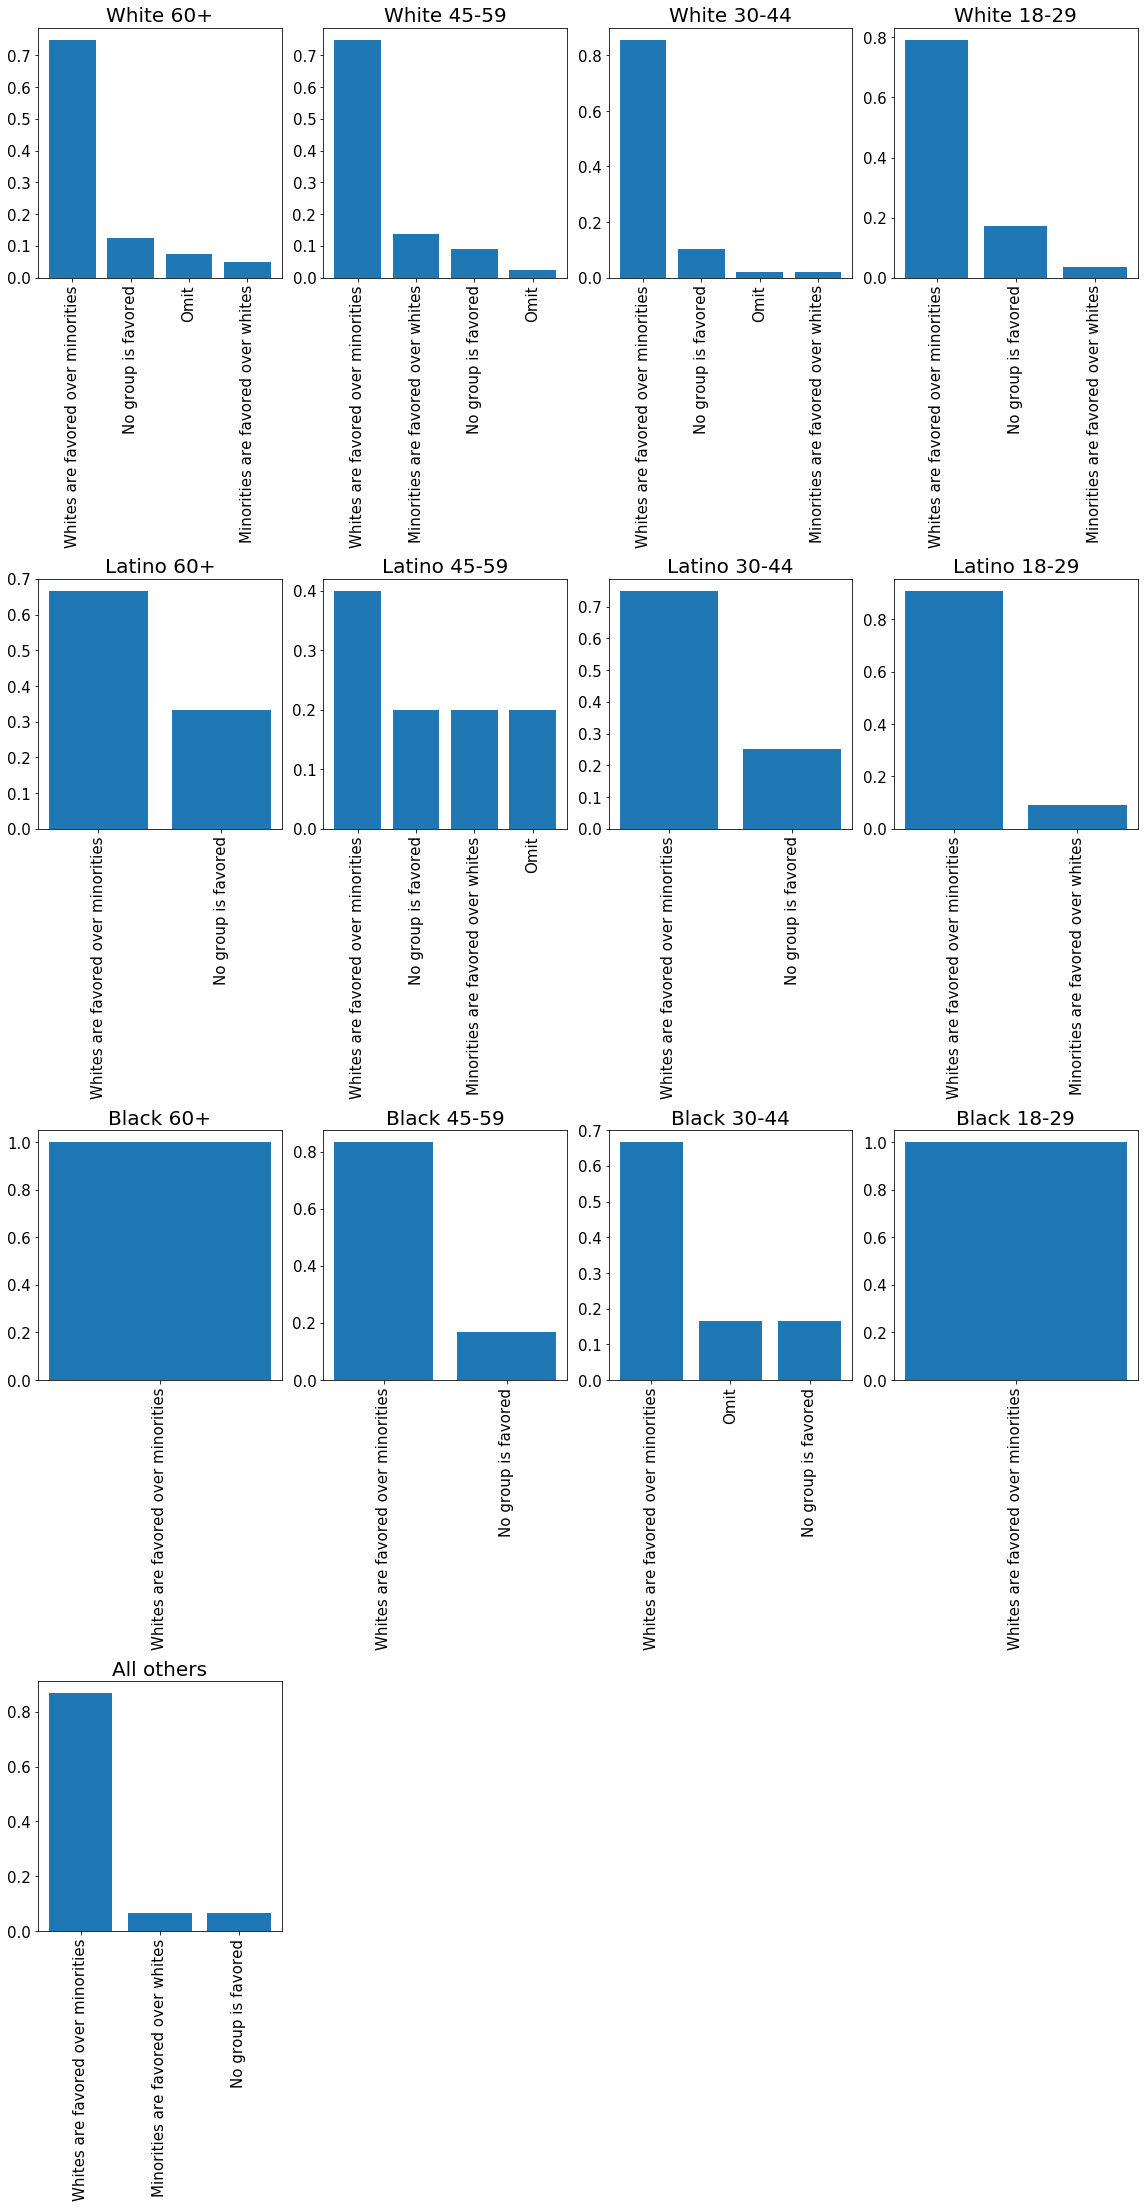

In [81]:
chart_simplifier(df_v2_lib_ind, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACEFACTOR')


#### Which issue is most important to the participant by race

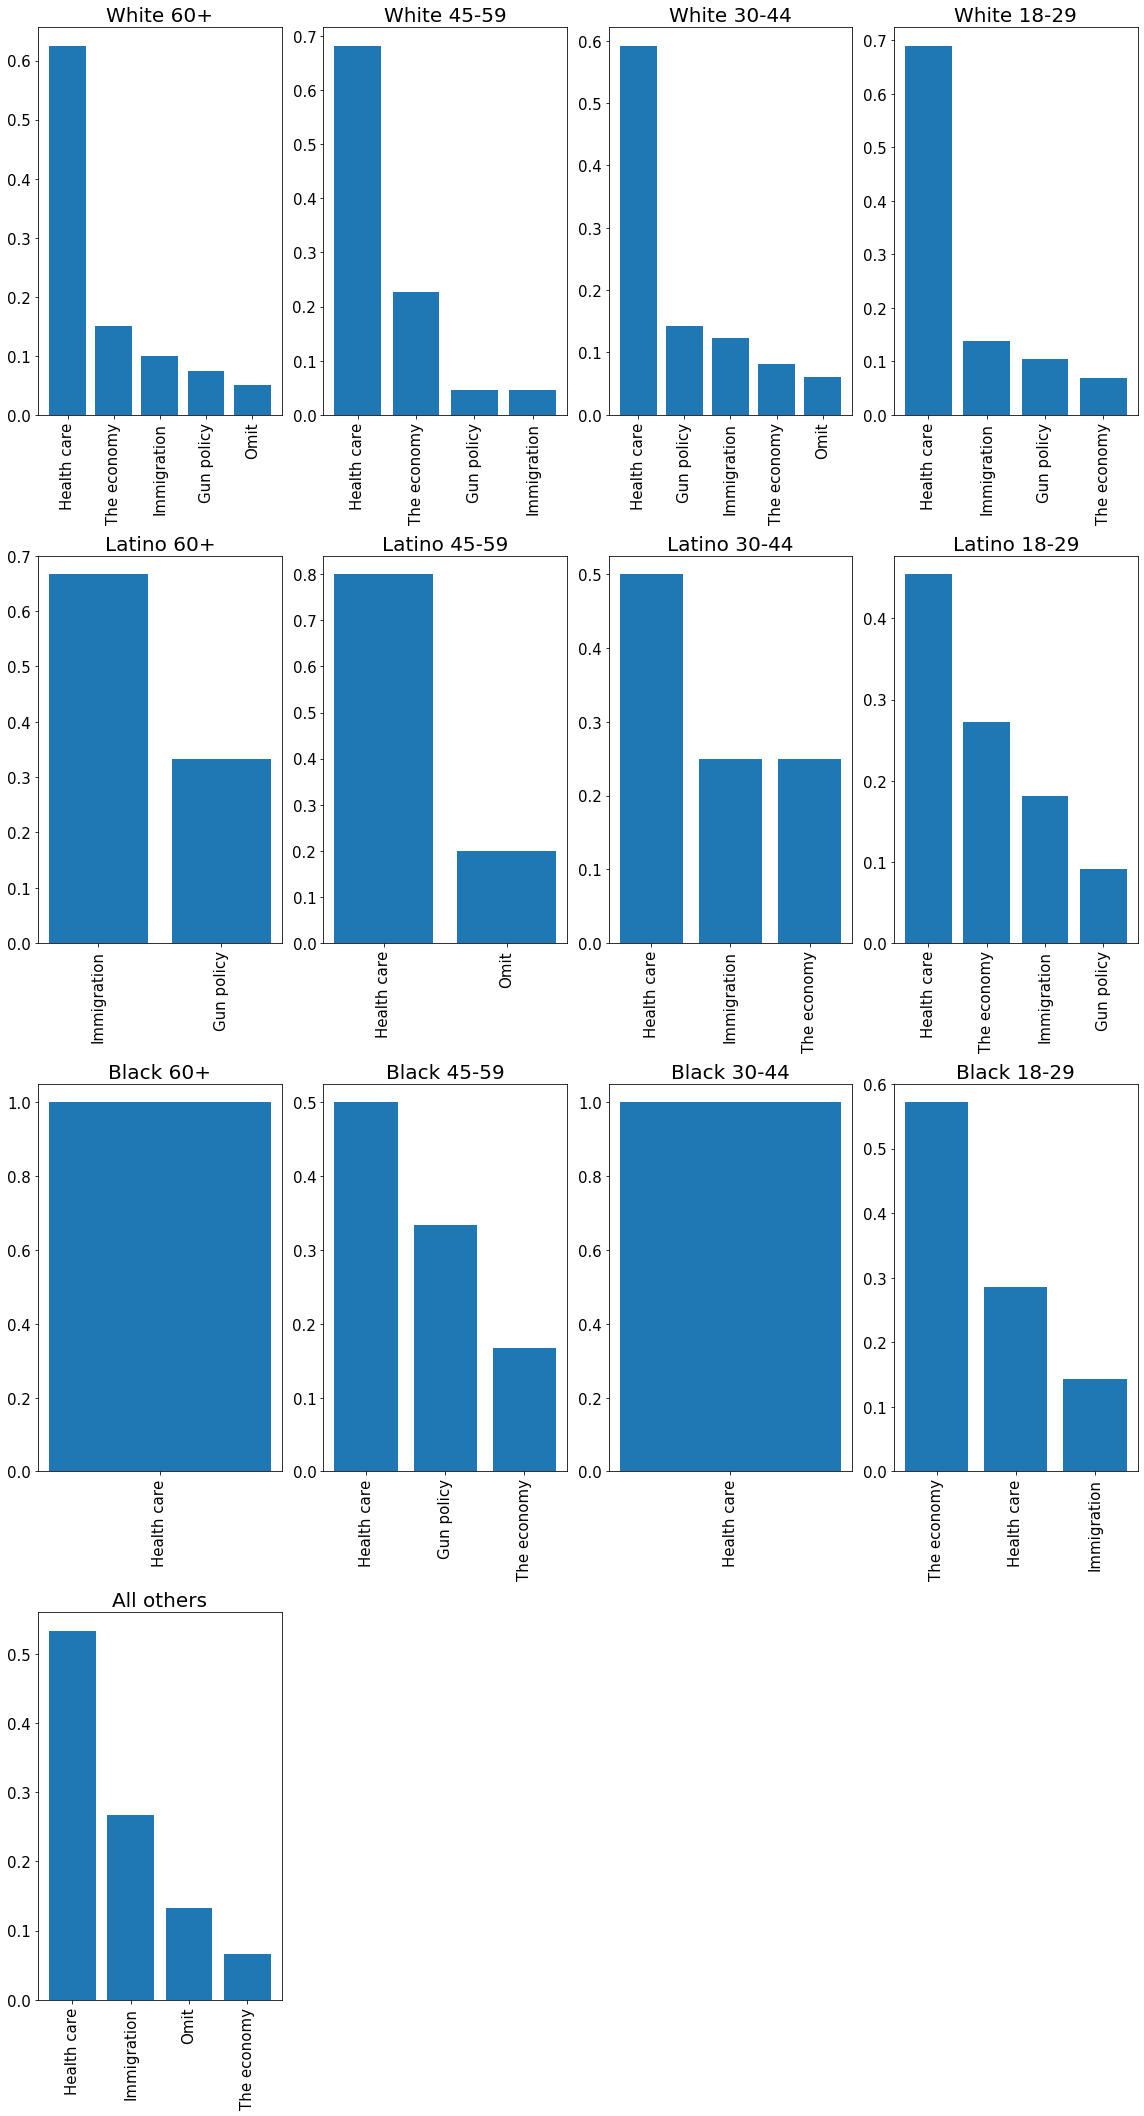

In [46]:
chart_simplifier(df_v2_lib_ind, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'ISSUE18')


#### Plot show the participant's opinion of having people of color represented in office by race 

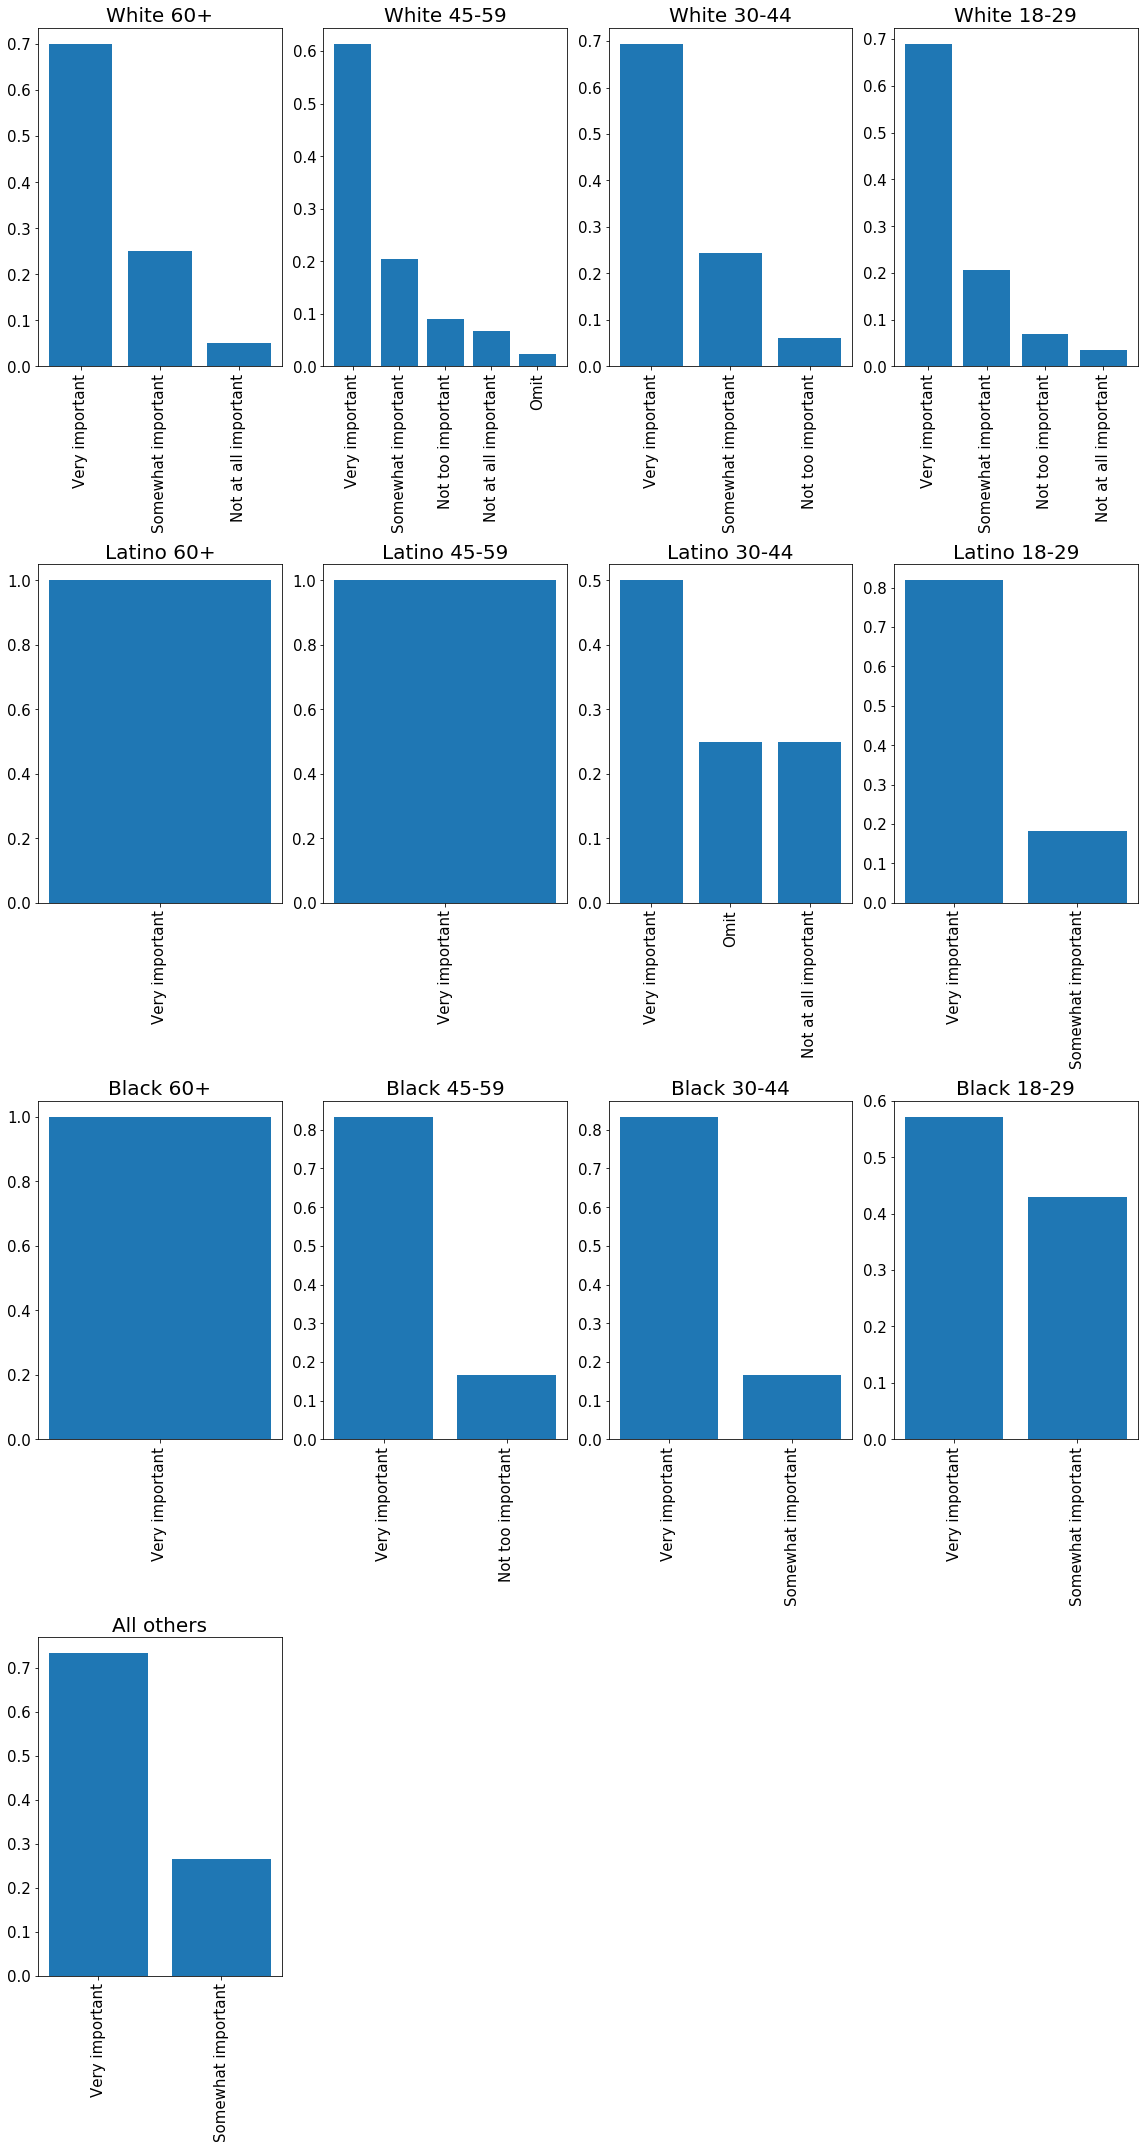

In [47]:
chart_simplifier(df_v2_lib_ind, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACE18')


### Mod/Liberal Republicans 

#### Plot of Impeachment approval by race 

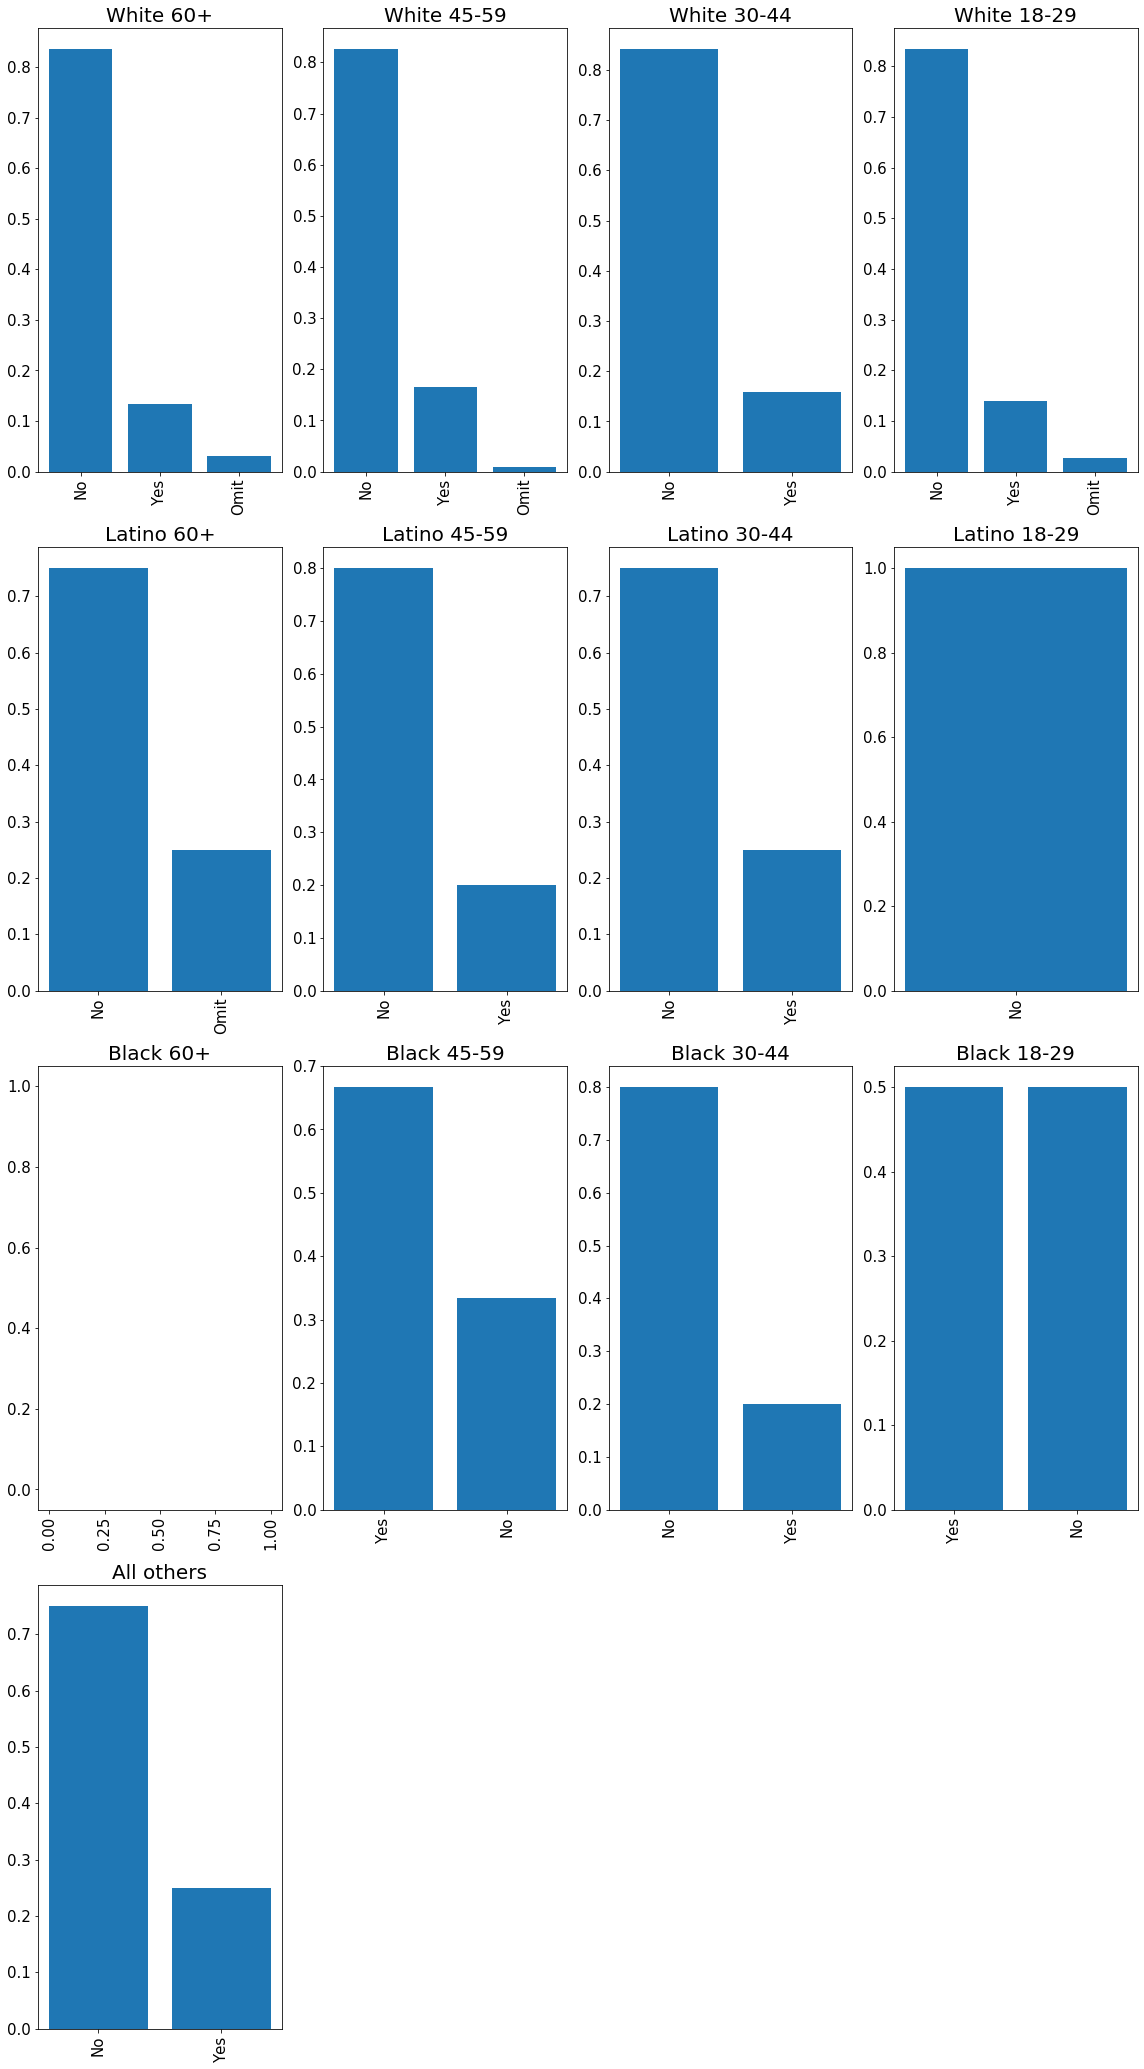

In [48]:
chart_simplifier(df_v2_mod_lib_rep , group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'IMPEACH18')


#### Plot of Whether the participant thinks the Russia investigation was justified by race

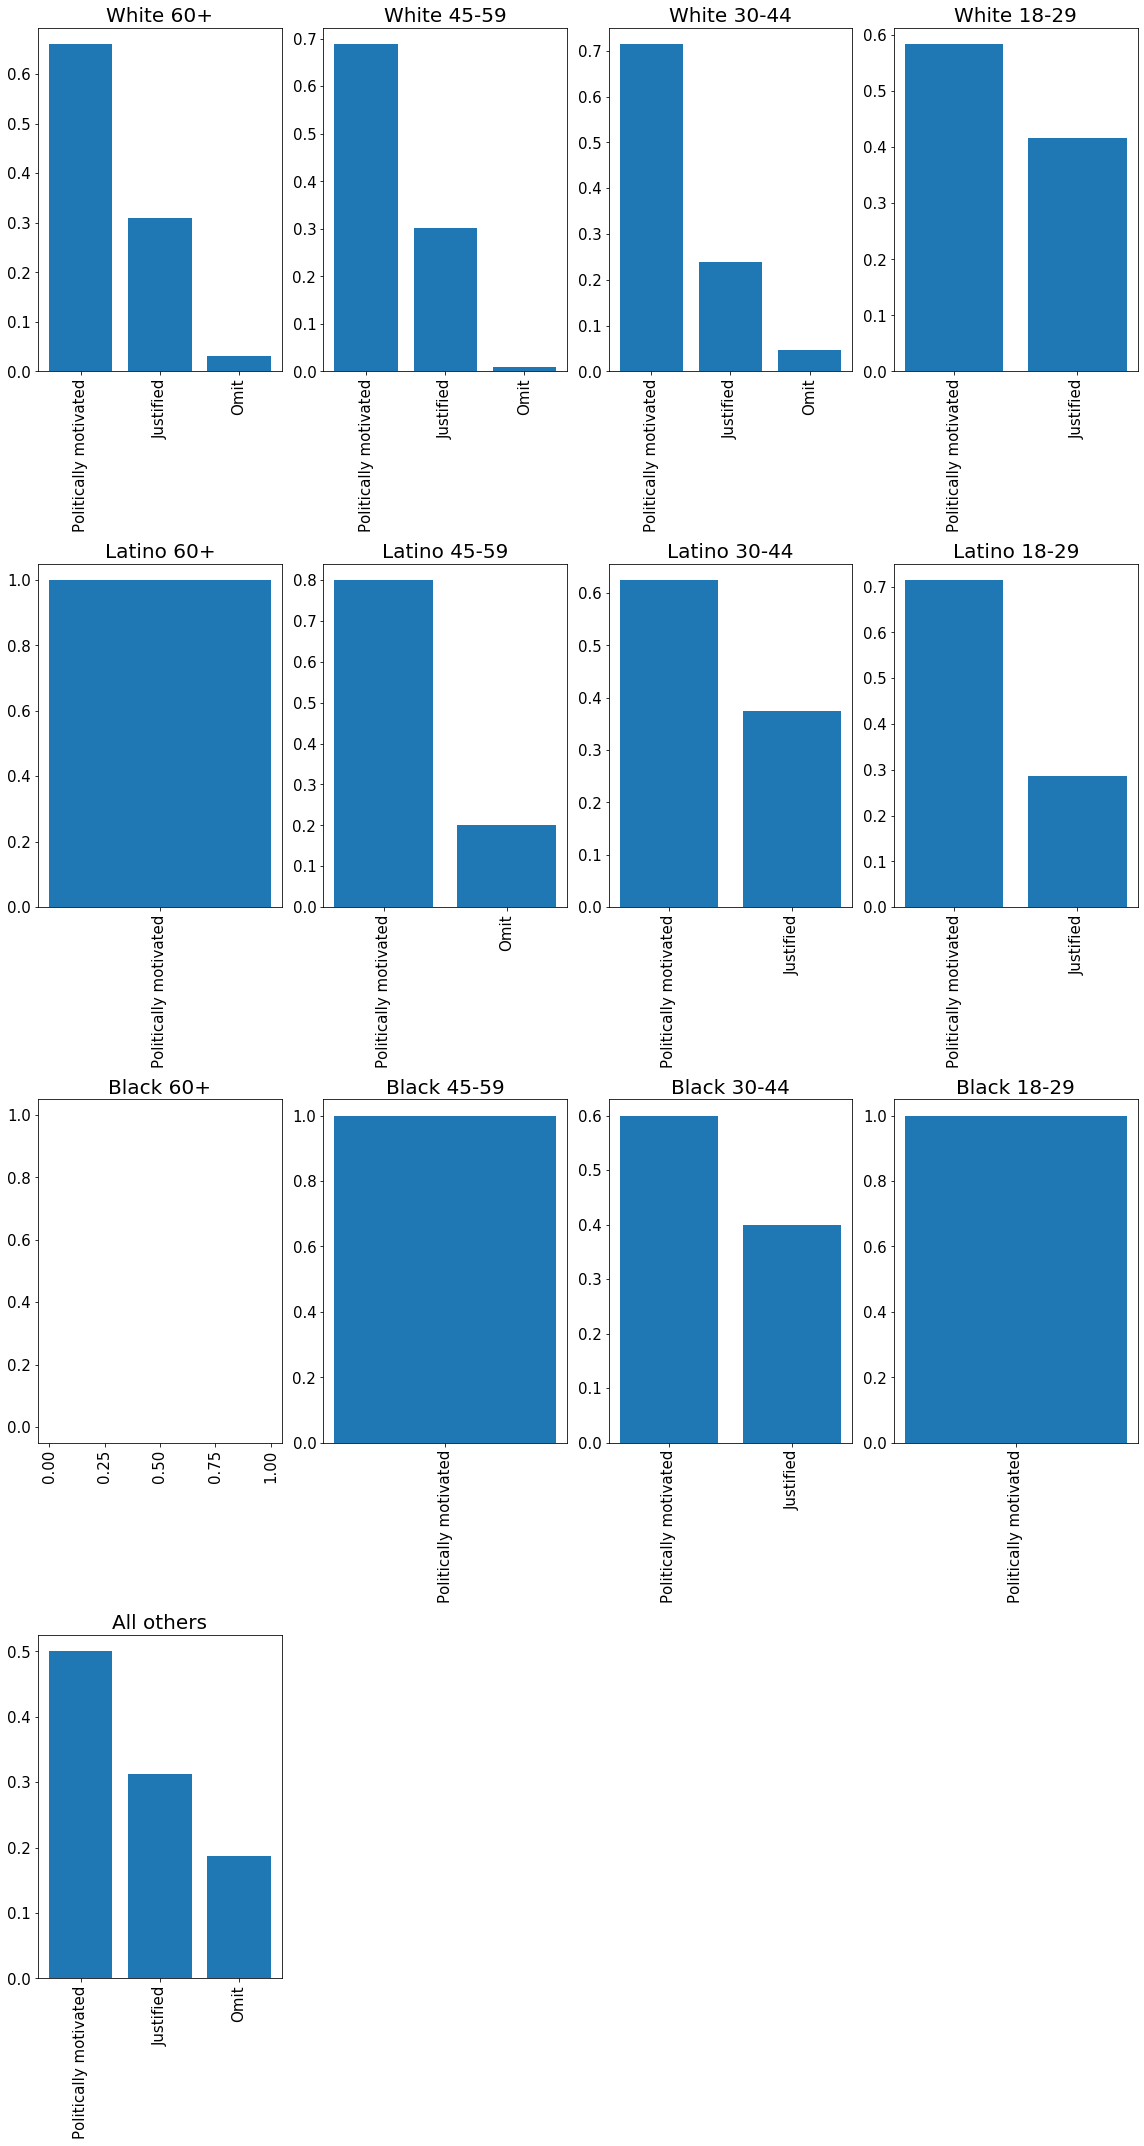

In [49]:
chart_simplifier(df_v2_mod_lib_rep, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'RUSSIA18')


#### Plot of the participant's approval of Trump's immigration policies by race

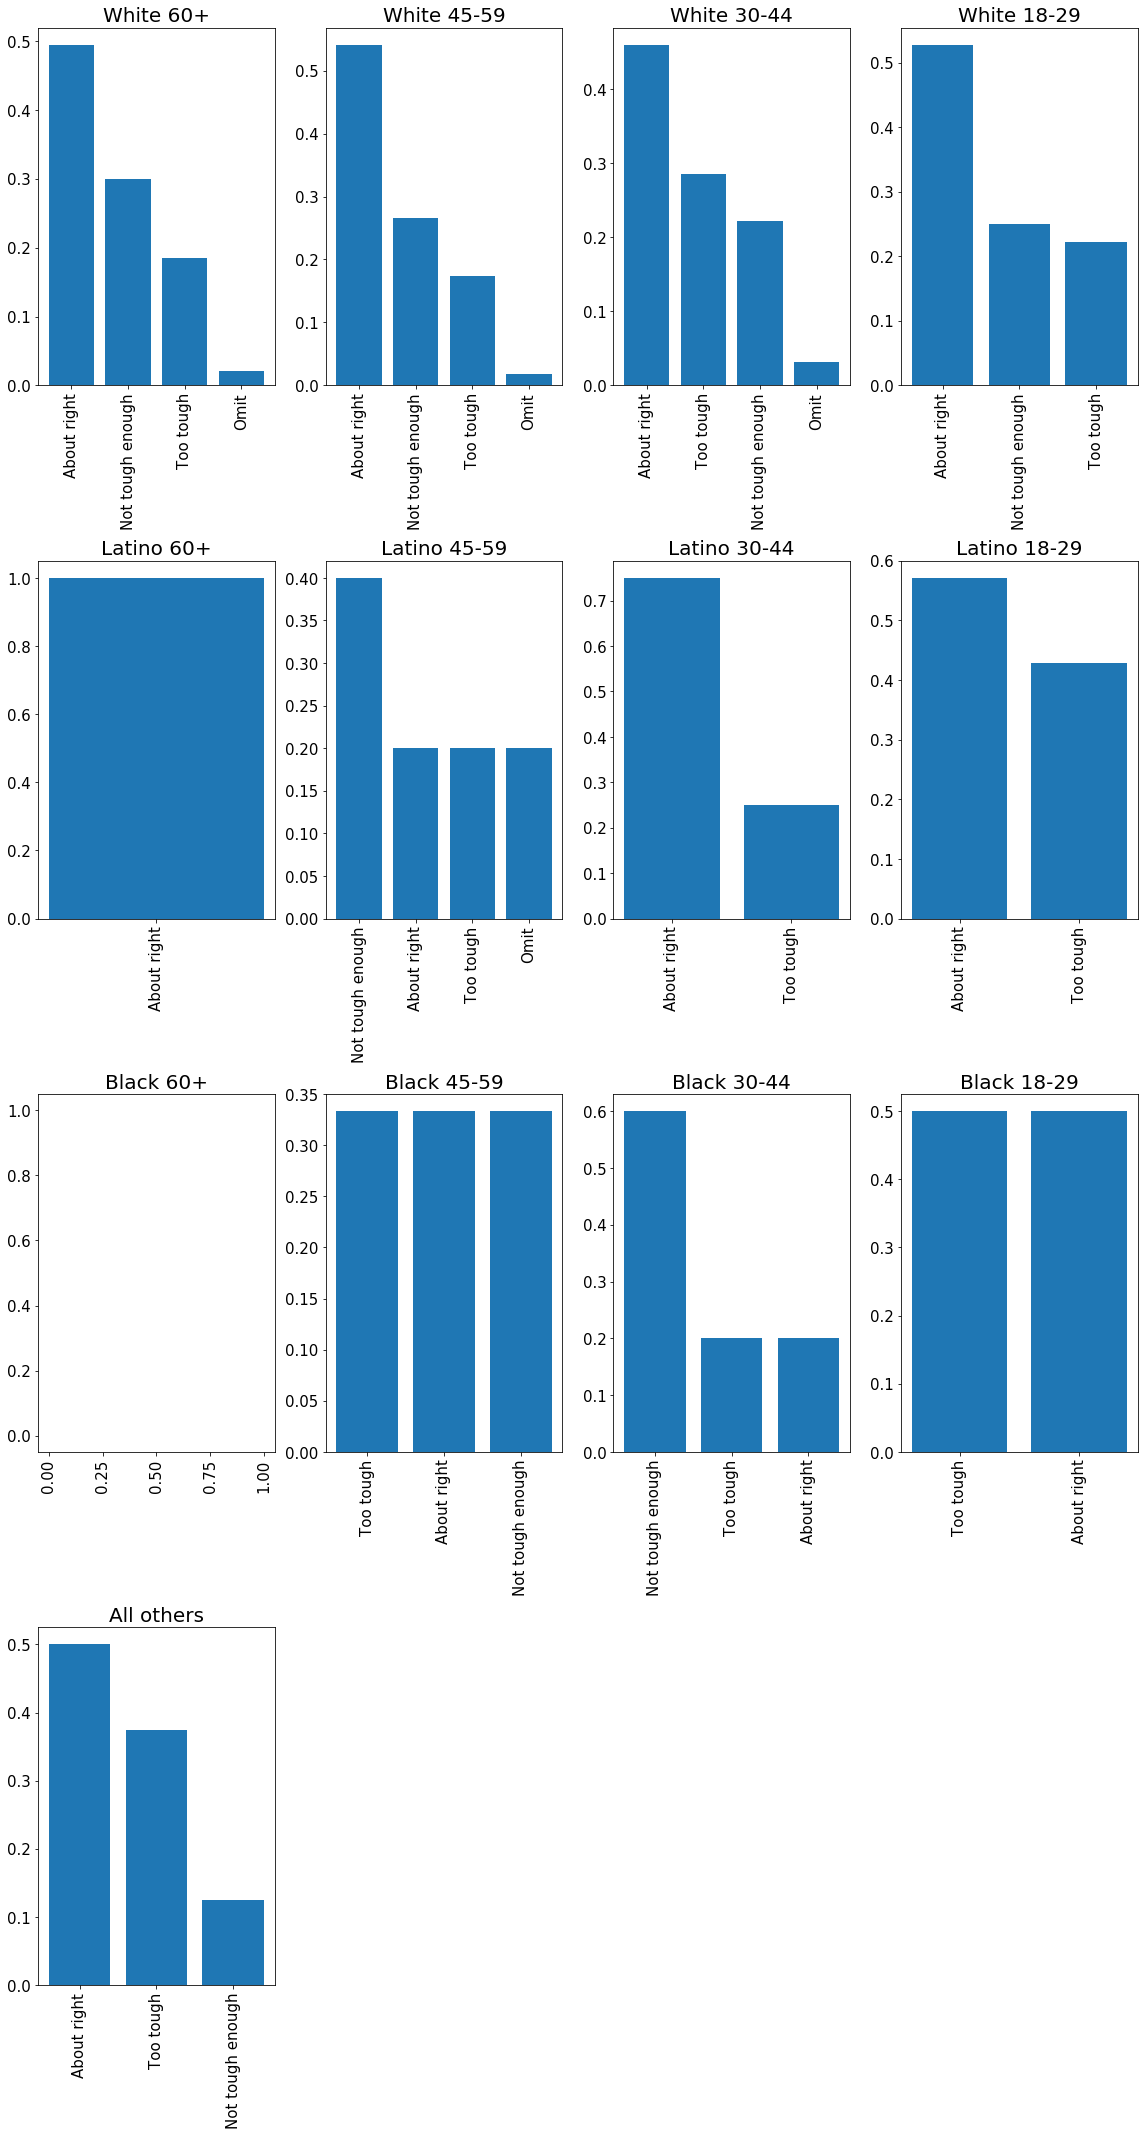

In [50]:
chart_simplifier(df_v2_mod_lib_rep, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'TRUMPIMM')


#### Plot of the participants opinion of the treatment of minorities versus white people by race

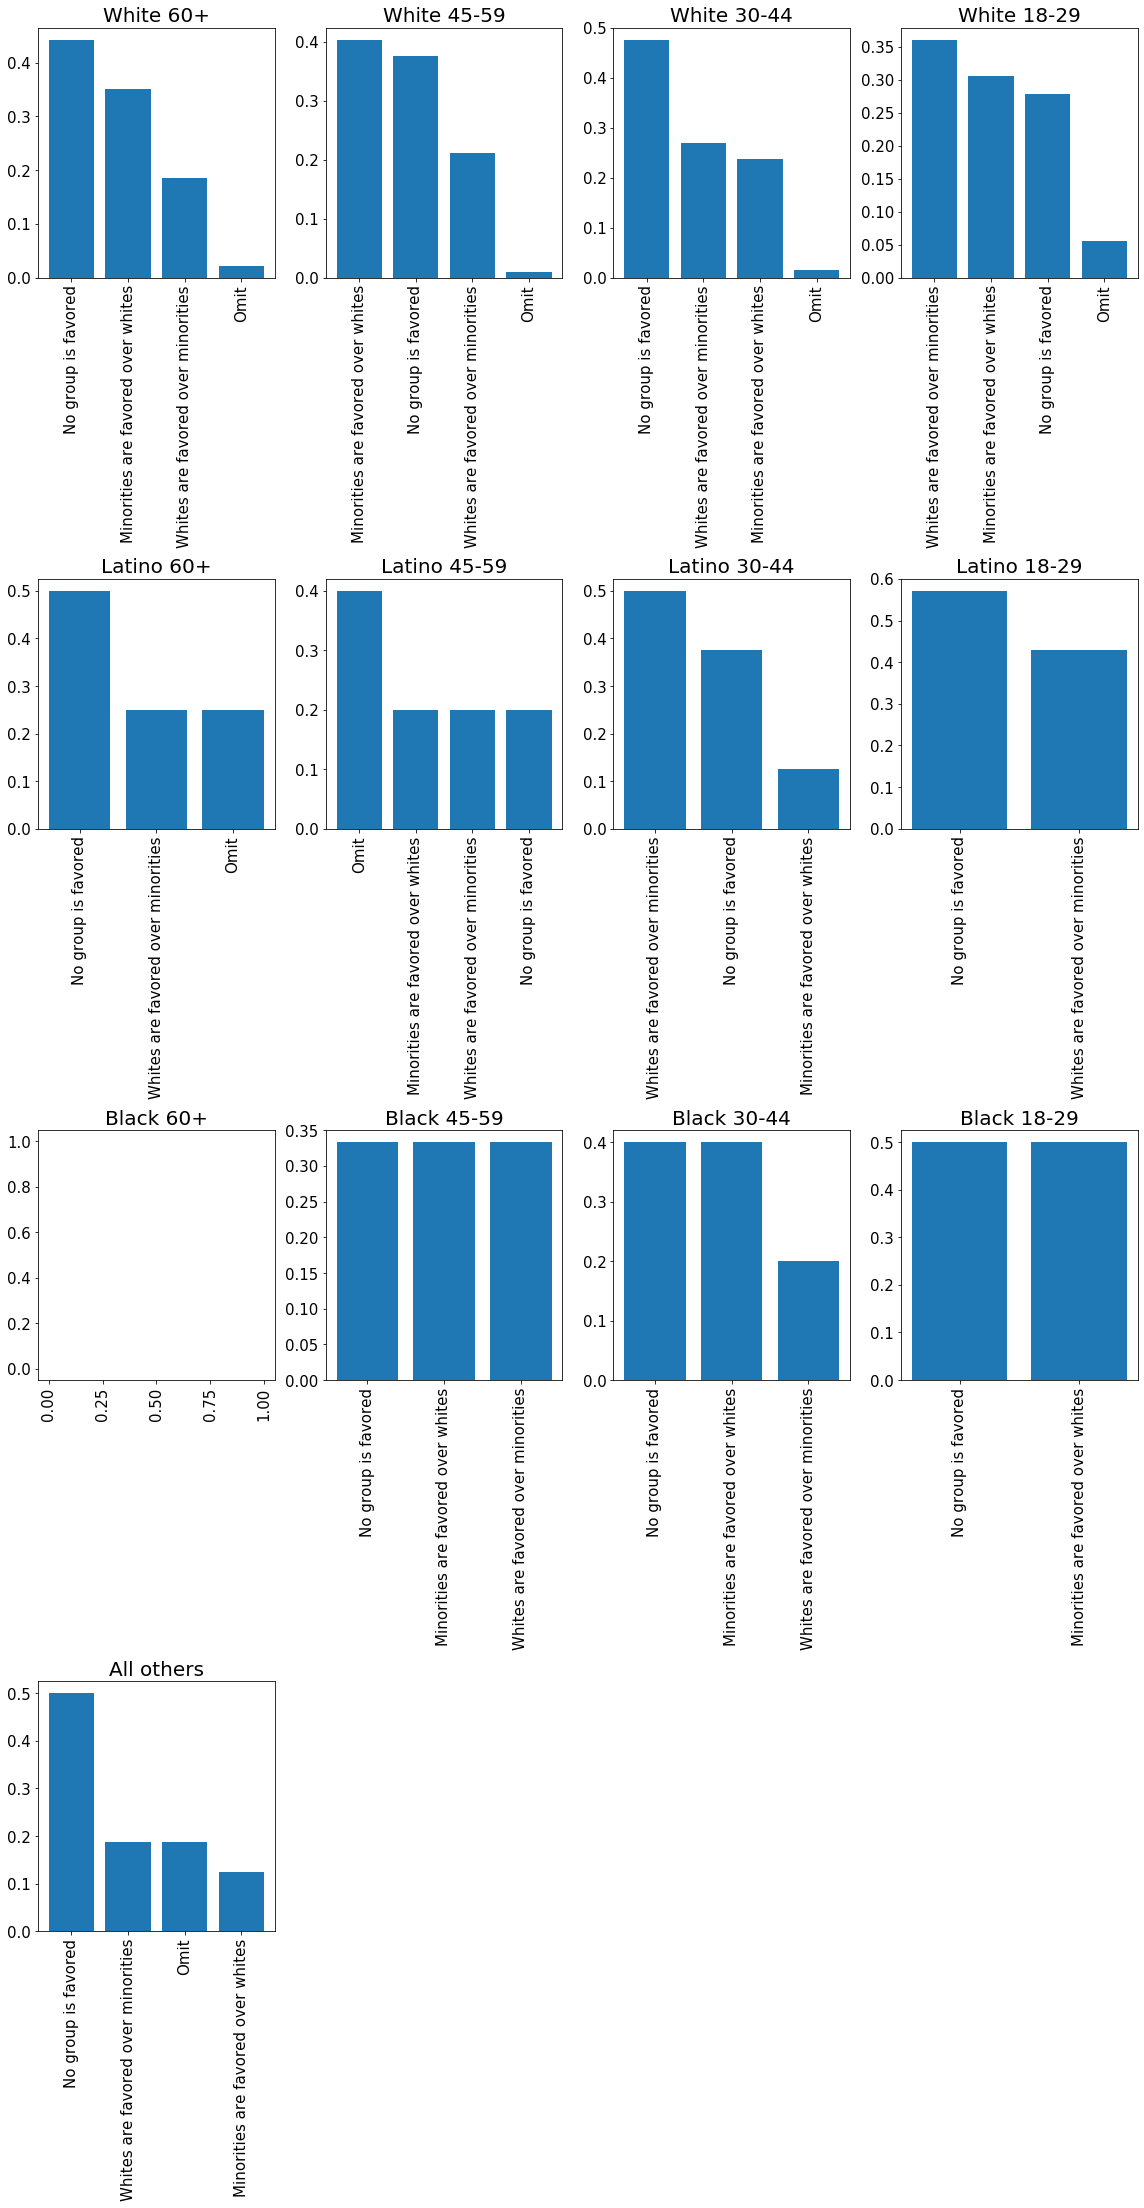

In [82]:
chart_simplifier(df_v2_mod_lib_rep, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACEFACTOR')


#### Which issue is most important to the participant by race

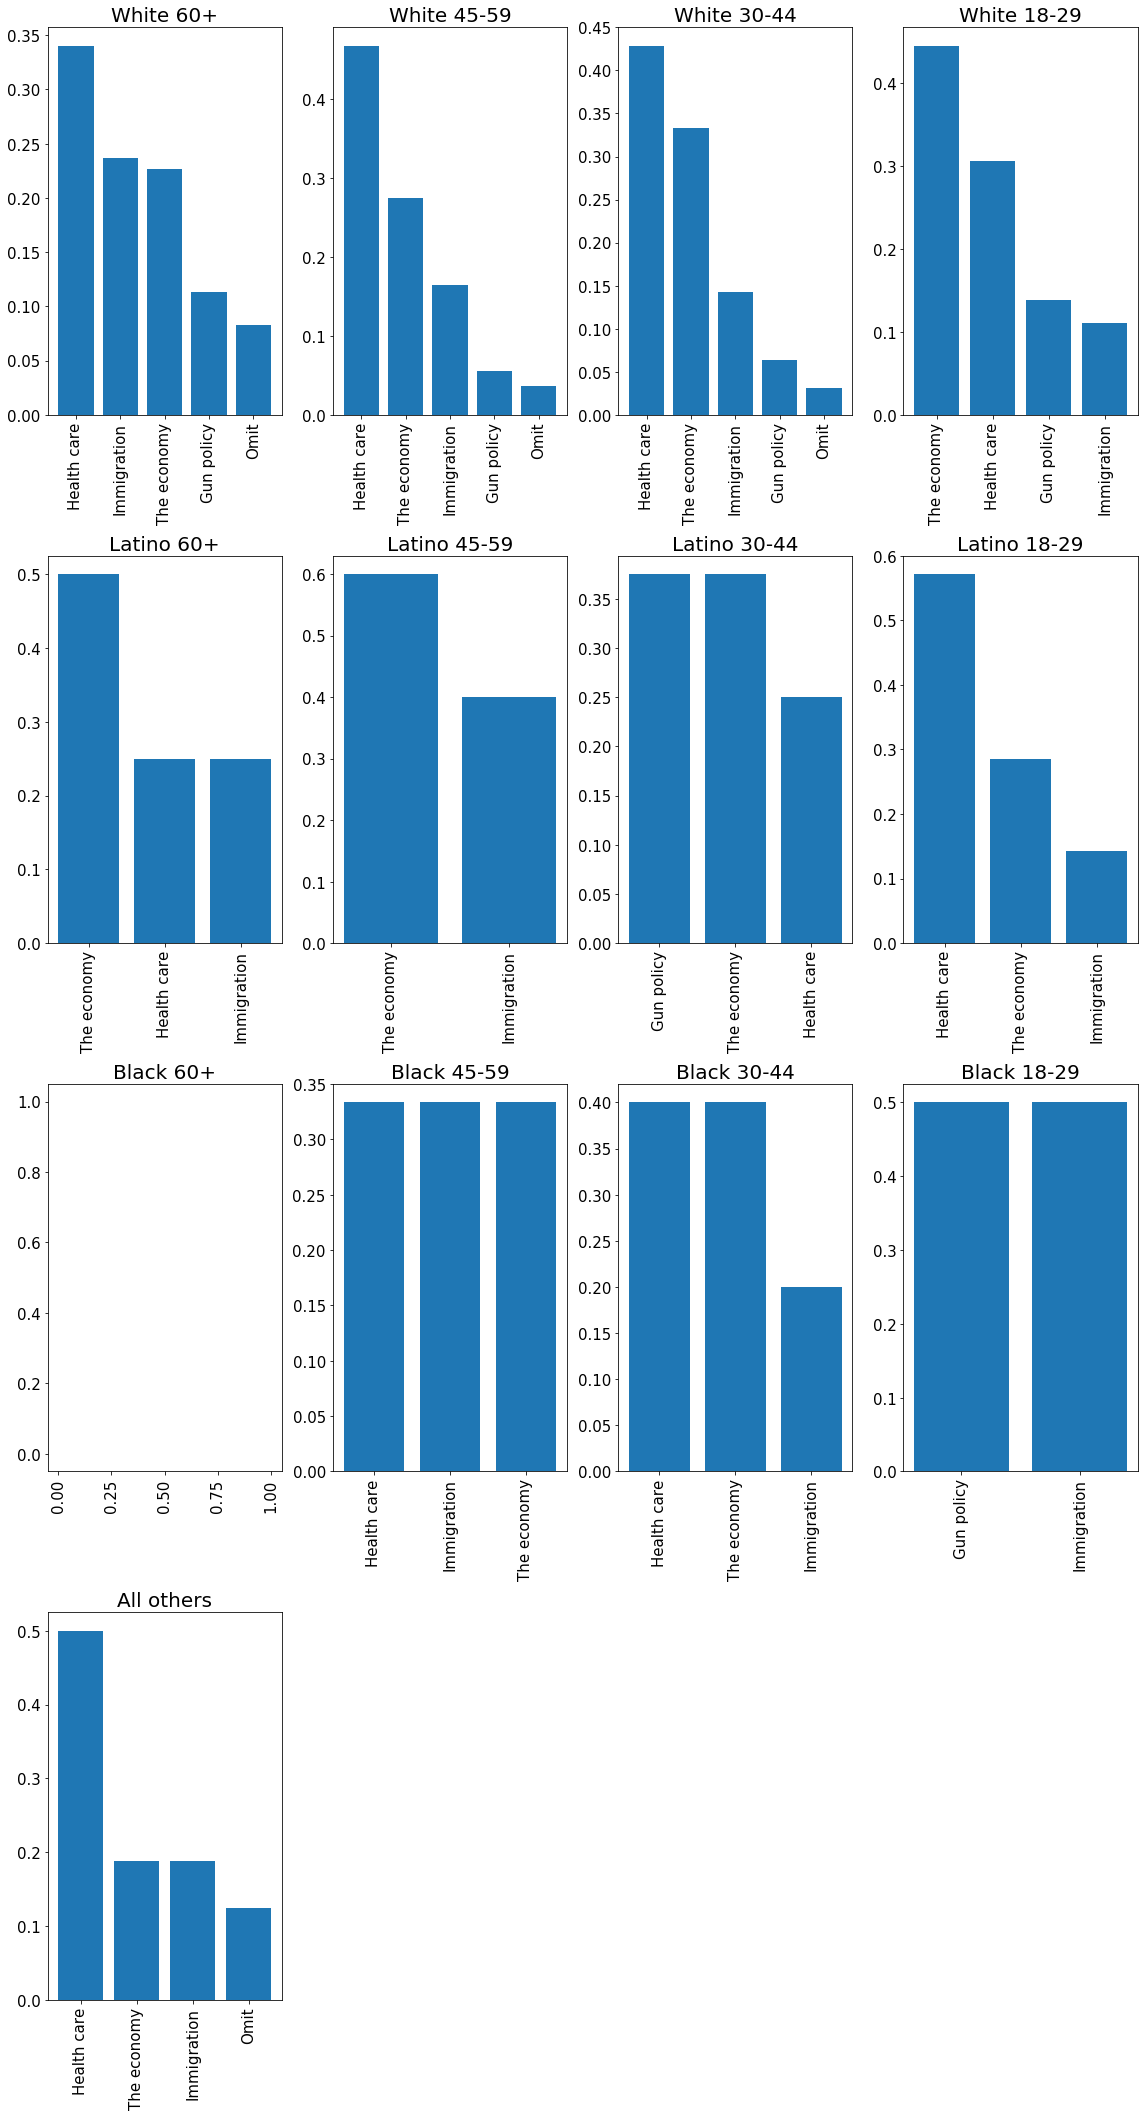

In [52]:
chart_simplifier(df_v2_mod_lib_rep, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'ISSUE18')


#### Plot show the participant's opinion of having people of color represented in office by race 

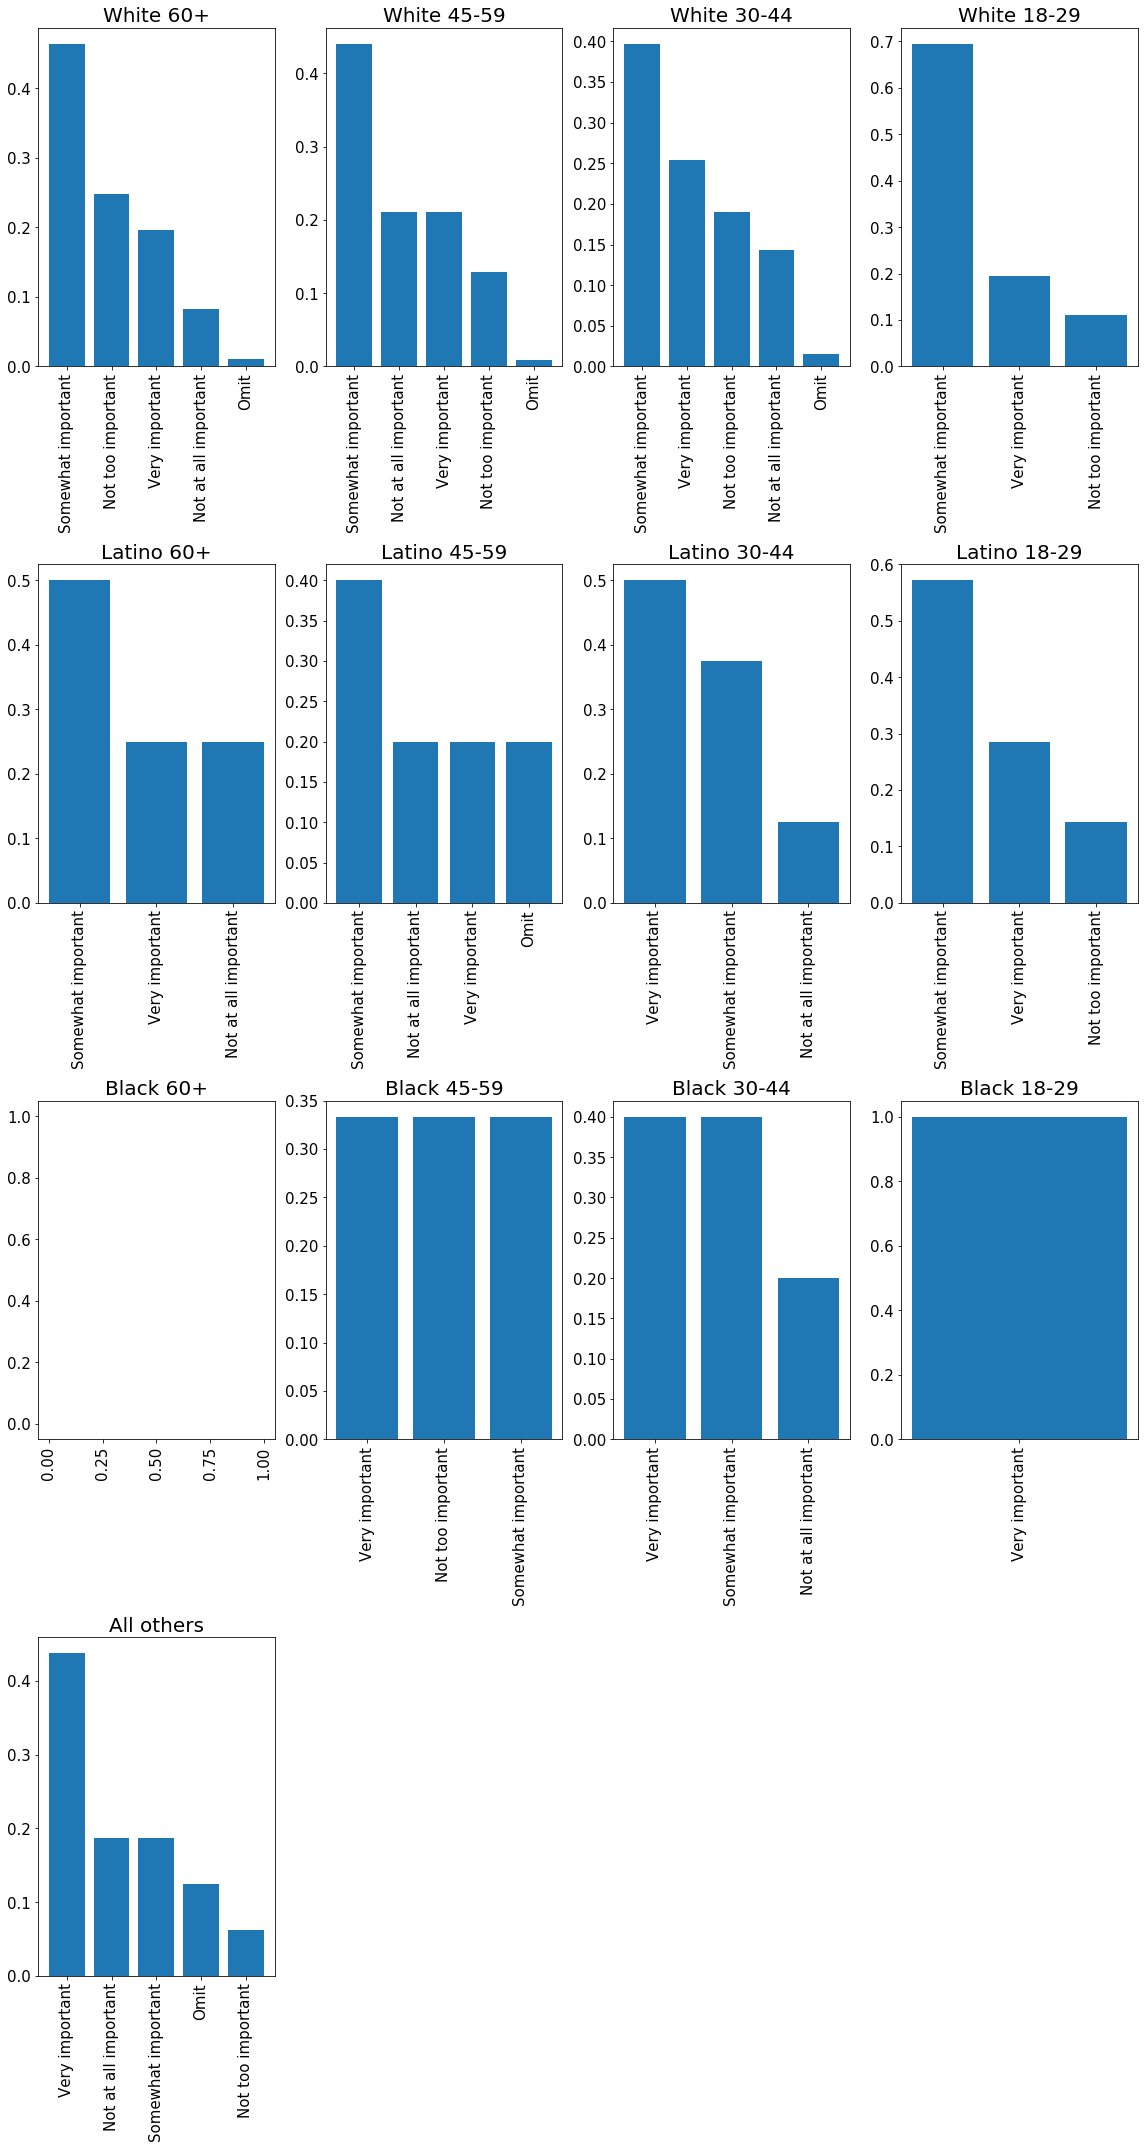

In [53]:
chart_simplifier(df_v2_mod_lib_rep, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACE18')


### Conservative Republicans

#### Plot of Impeachment approval by race 

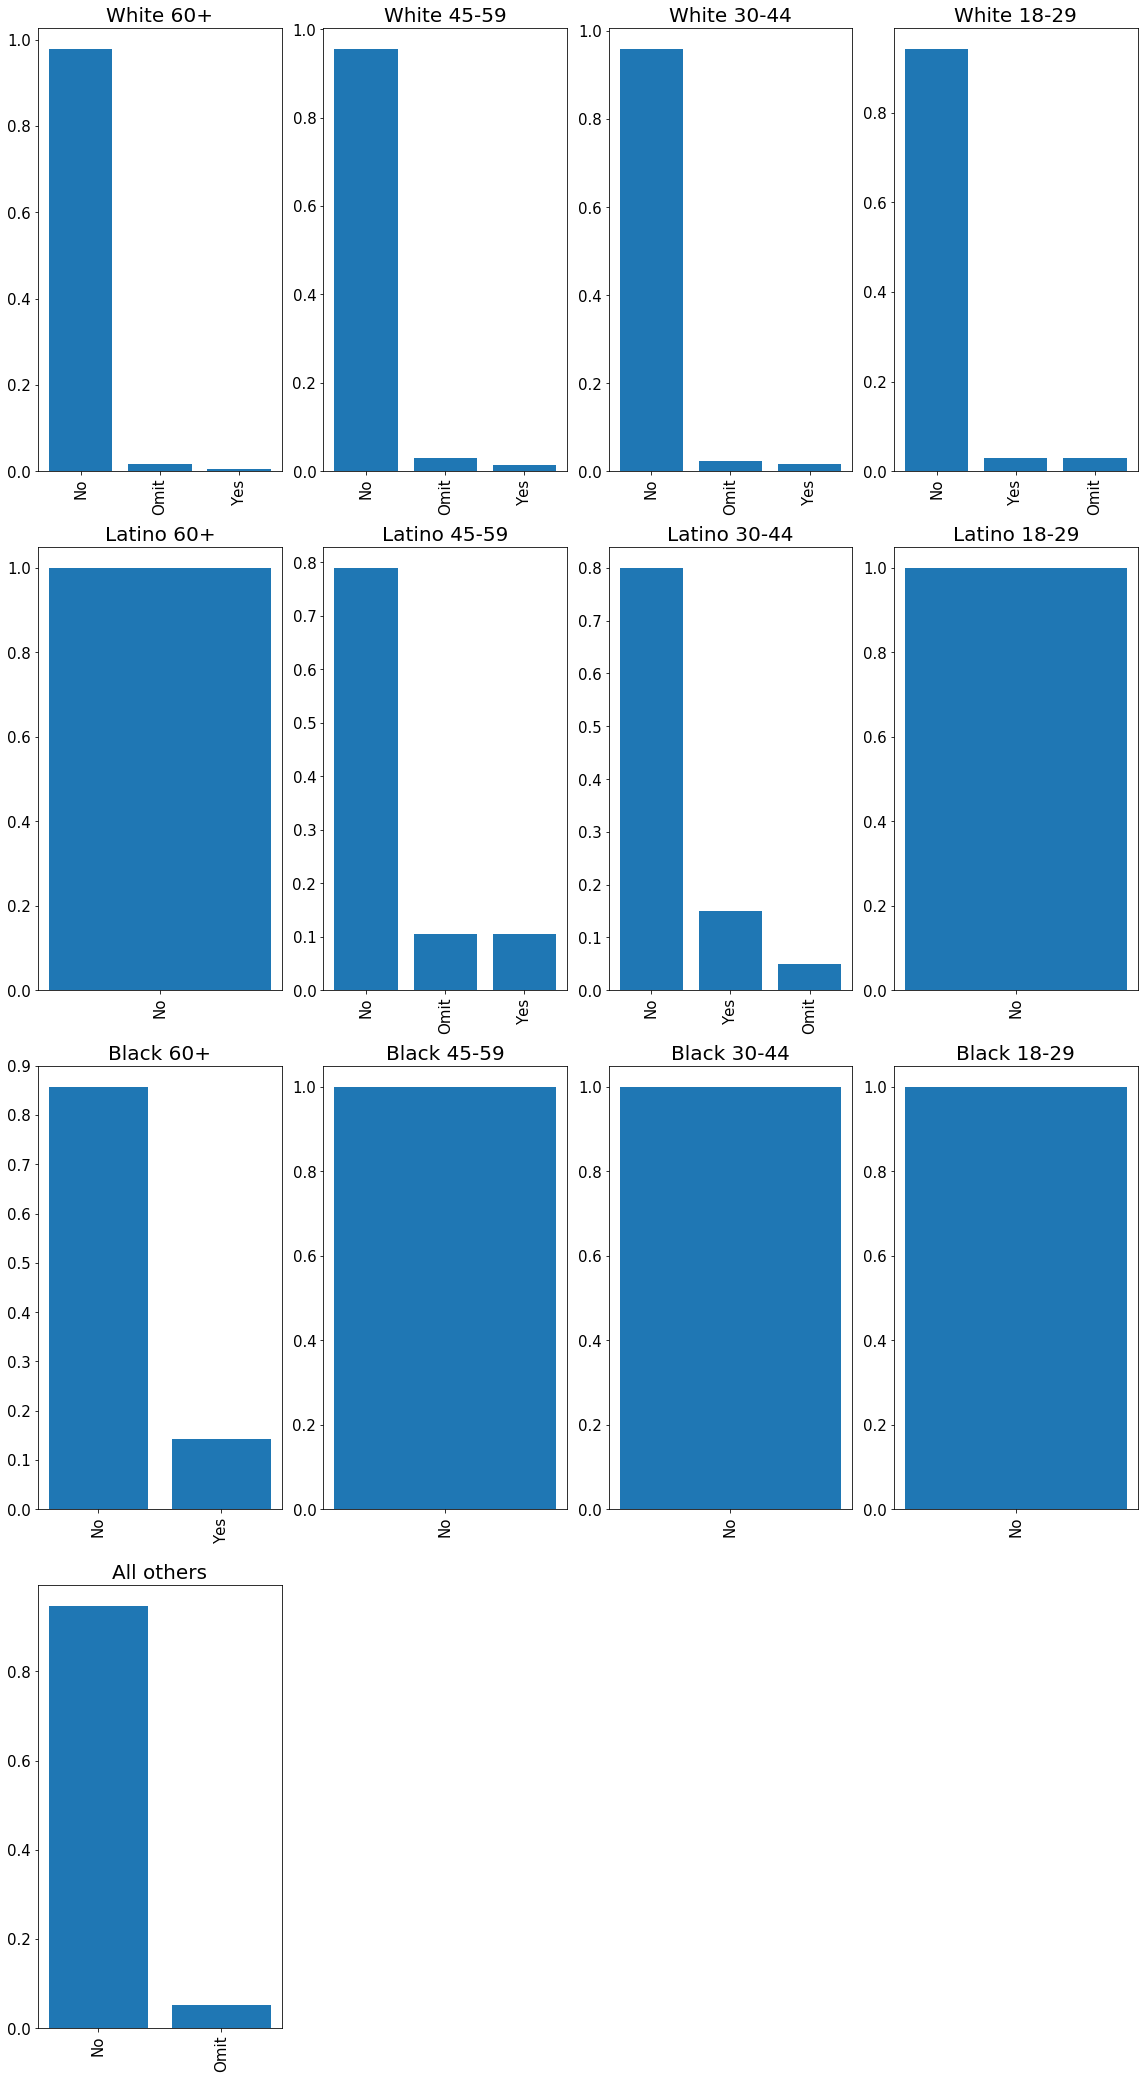

In [54]:
chart_simplifier(df_v2_con_rep , group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'IMPEACH18')


#### Plot of Whether the participant thinks the Russia investigation was justified by race

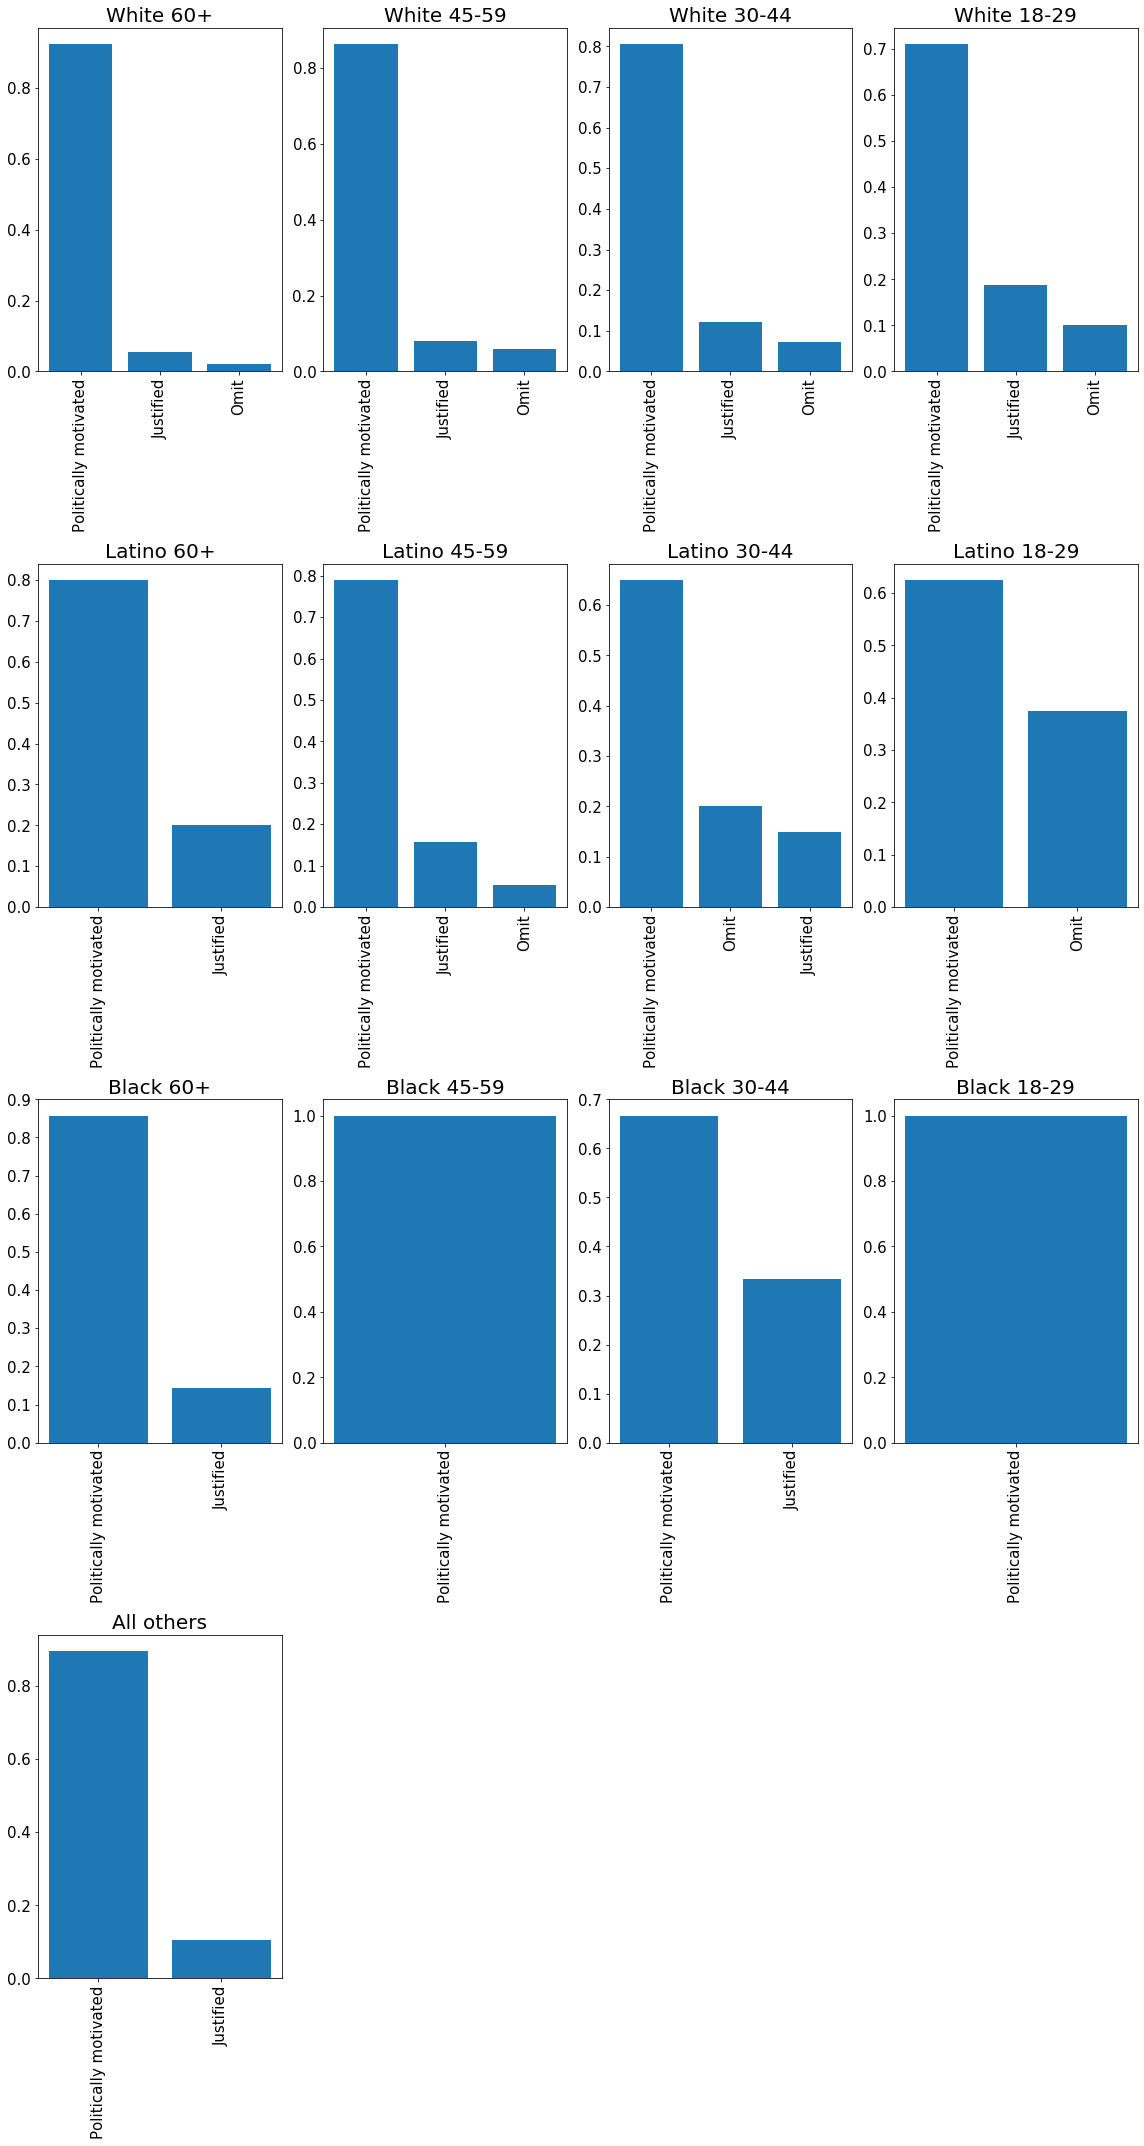

In [55]:
chart_simplifier(df_v2_con_rep, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'RUSSIA18')


#### Plot of the participant's approval of Trump's immigration policies by race

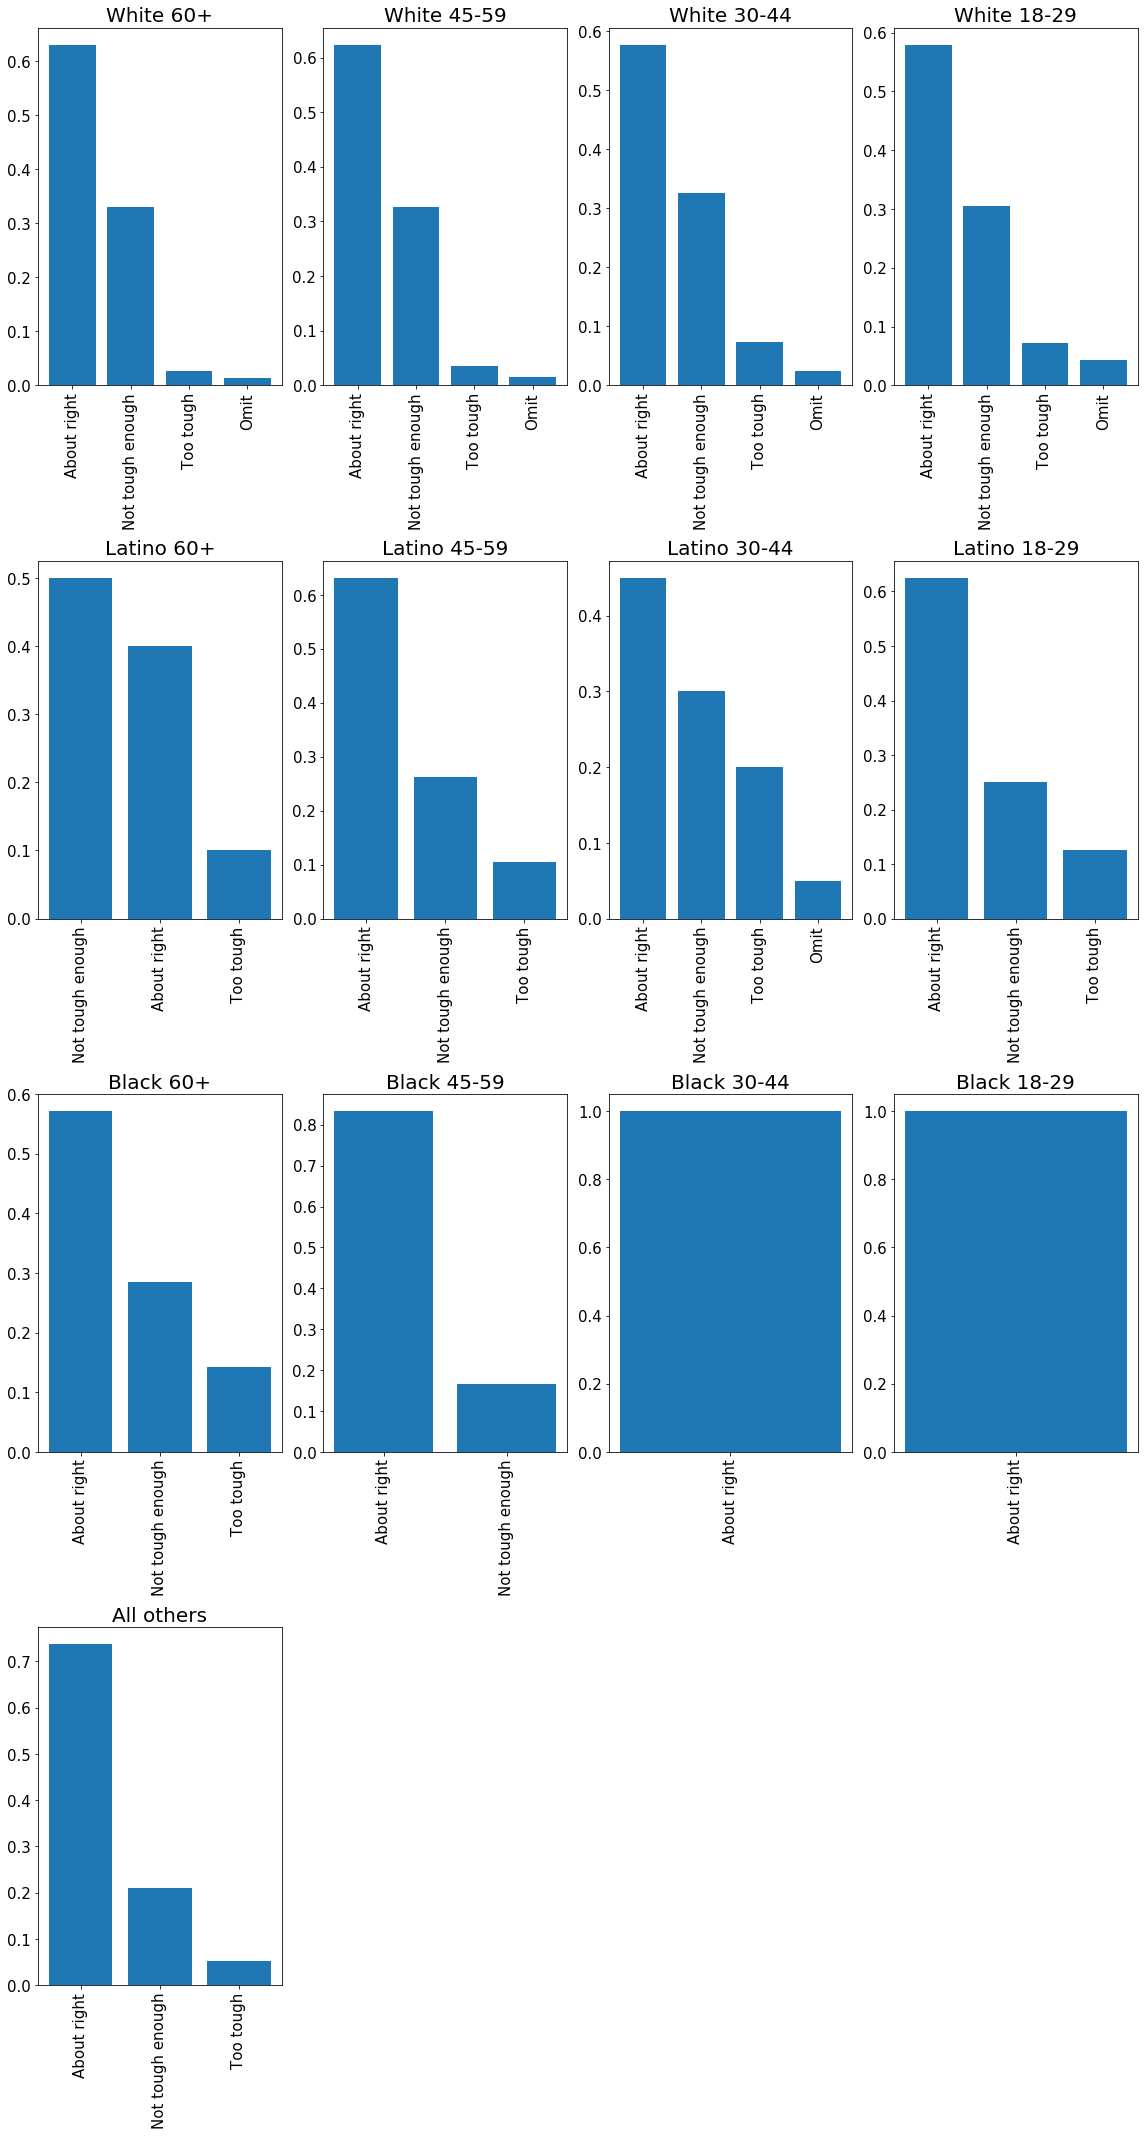

In [56]:
chart_simplifier(df_v2_con_rep, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'TRUMPIMM')


#### Plot of the participants opinion of the treatment of minorities versus white people by race

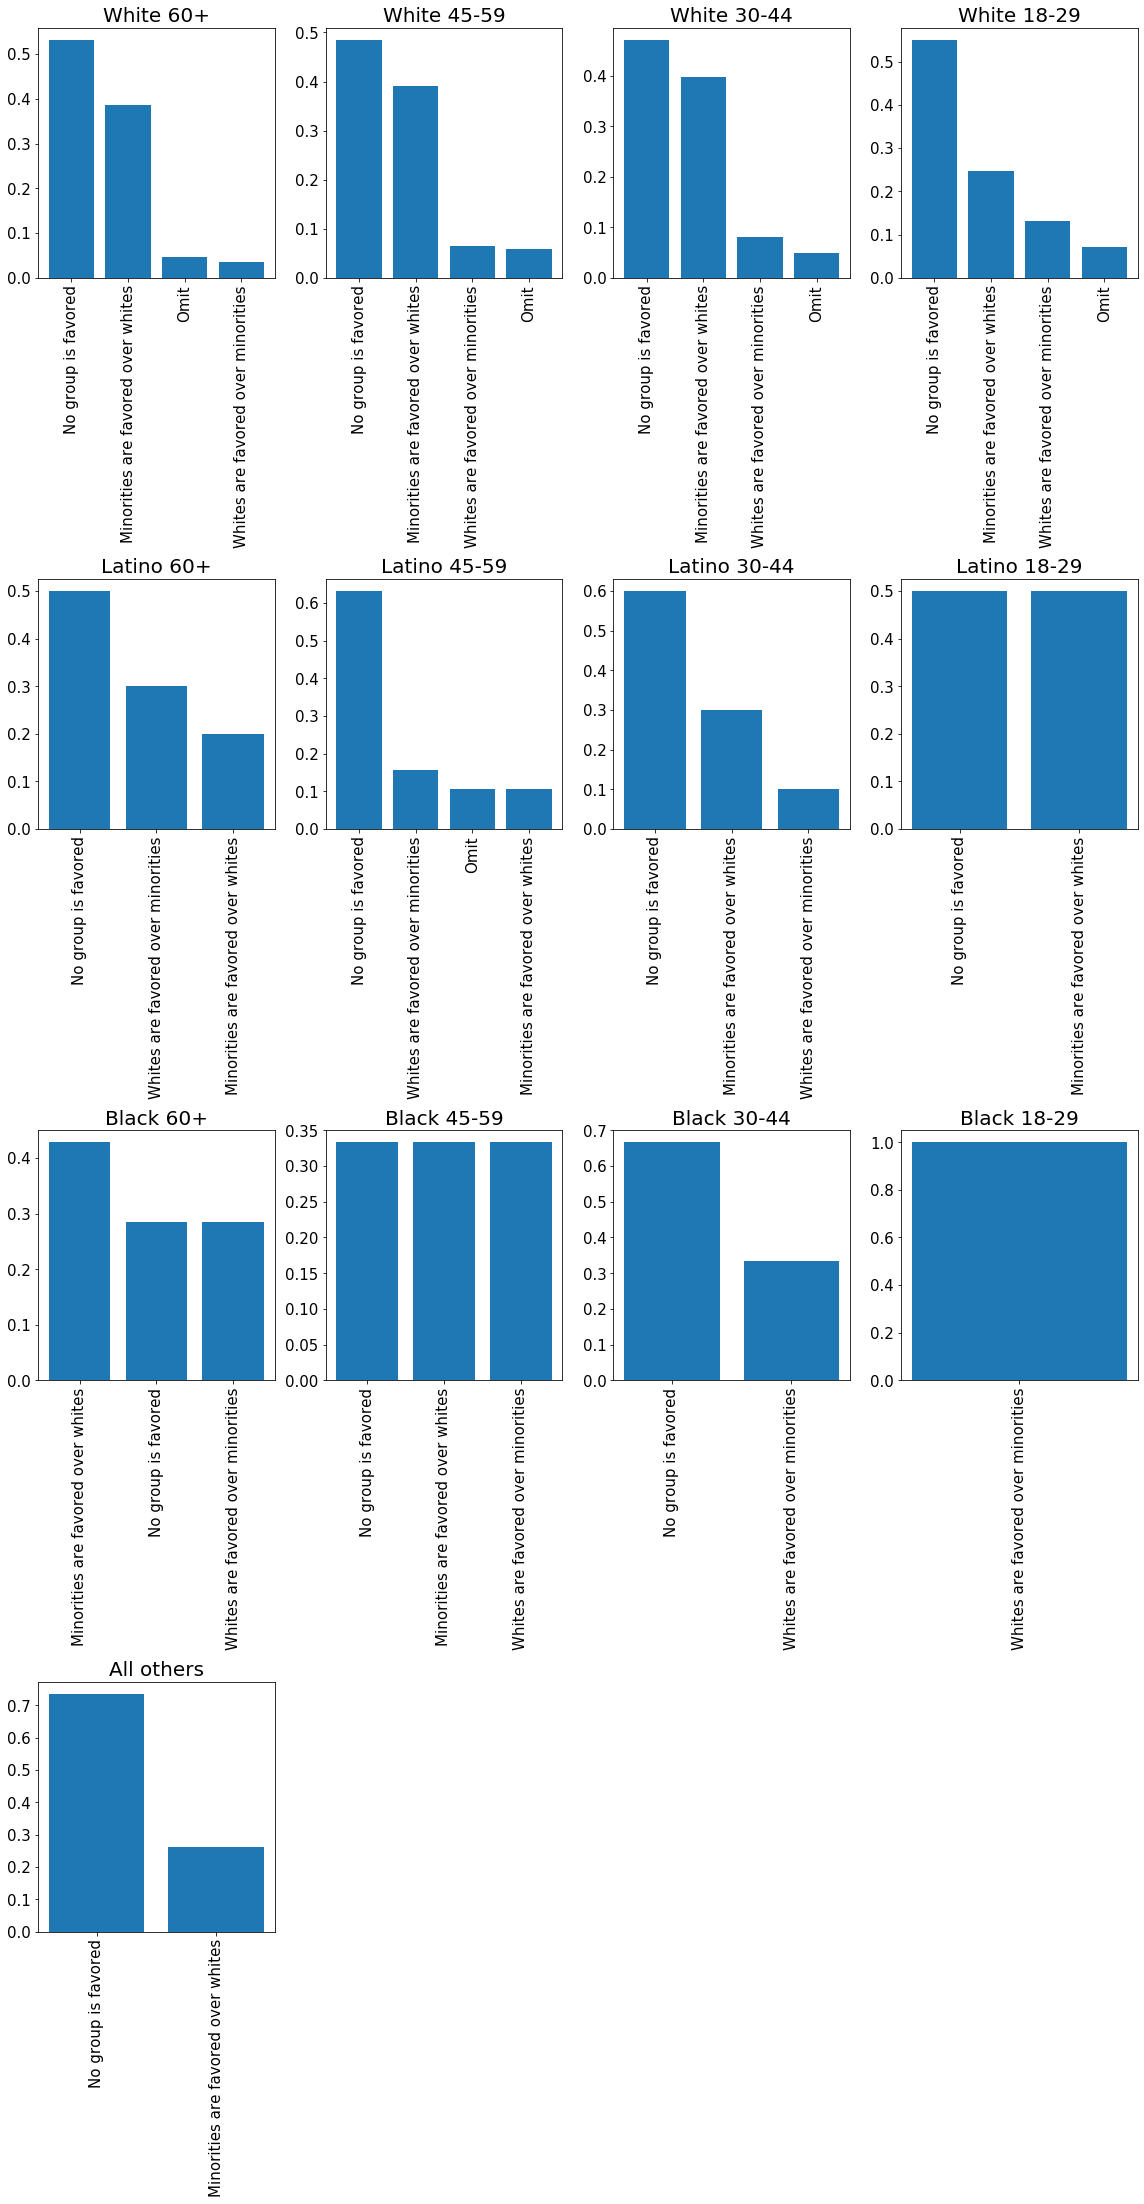

In [83]:
chart_simplifier(df_v2_con_rep, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACEFACTOR')


#### Which issue is most important to the participant by race

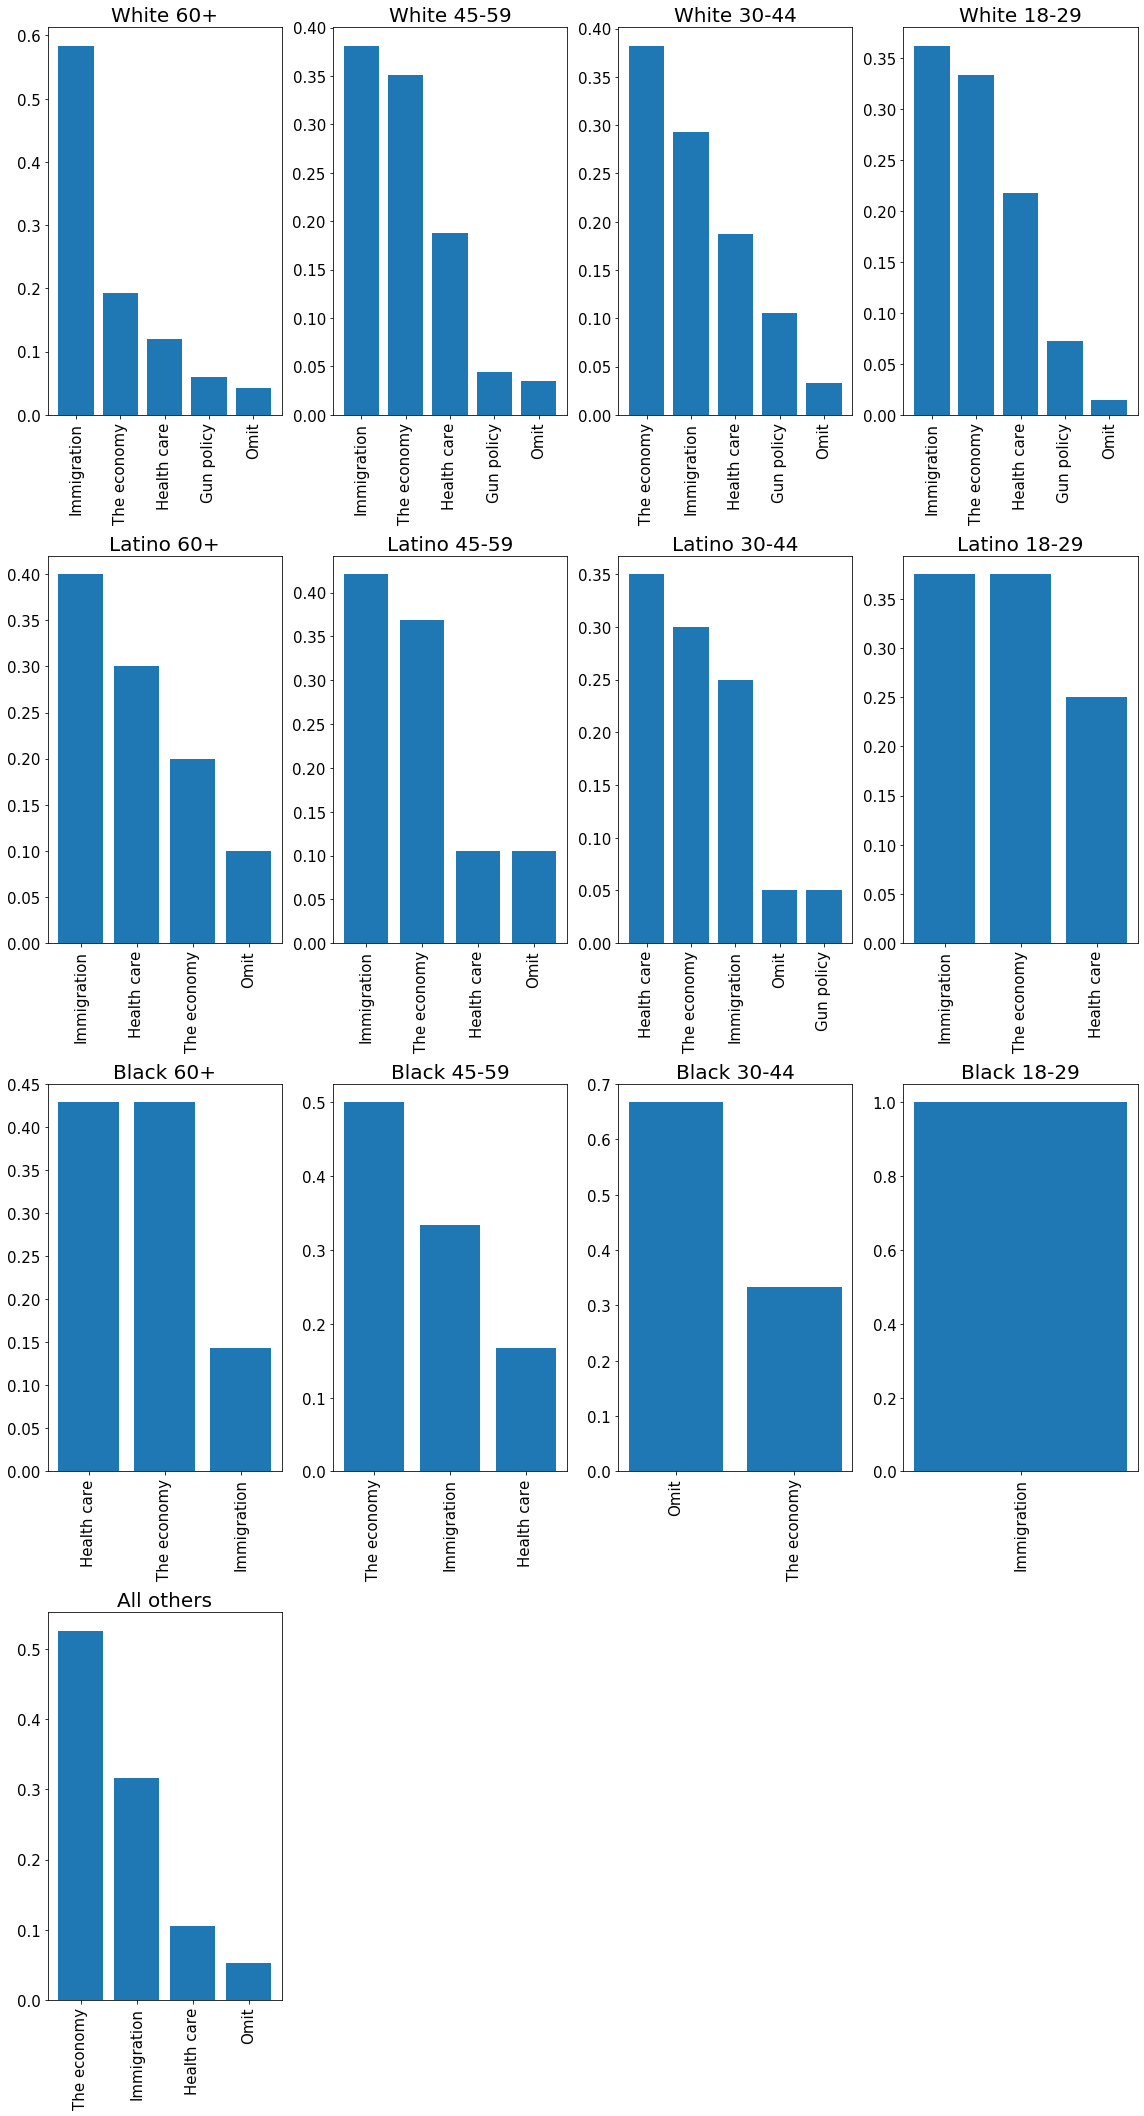

In [58]:
chart_simplifier(df_v2_con_rep, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'ISSUE18')


#### Plot show the participant's opinion of having people of color represented in office by race 

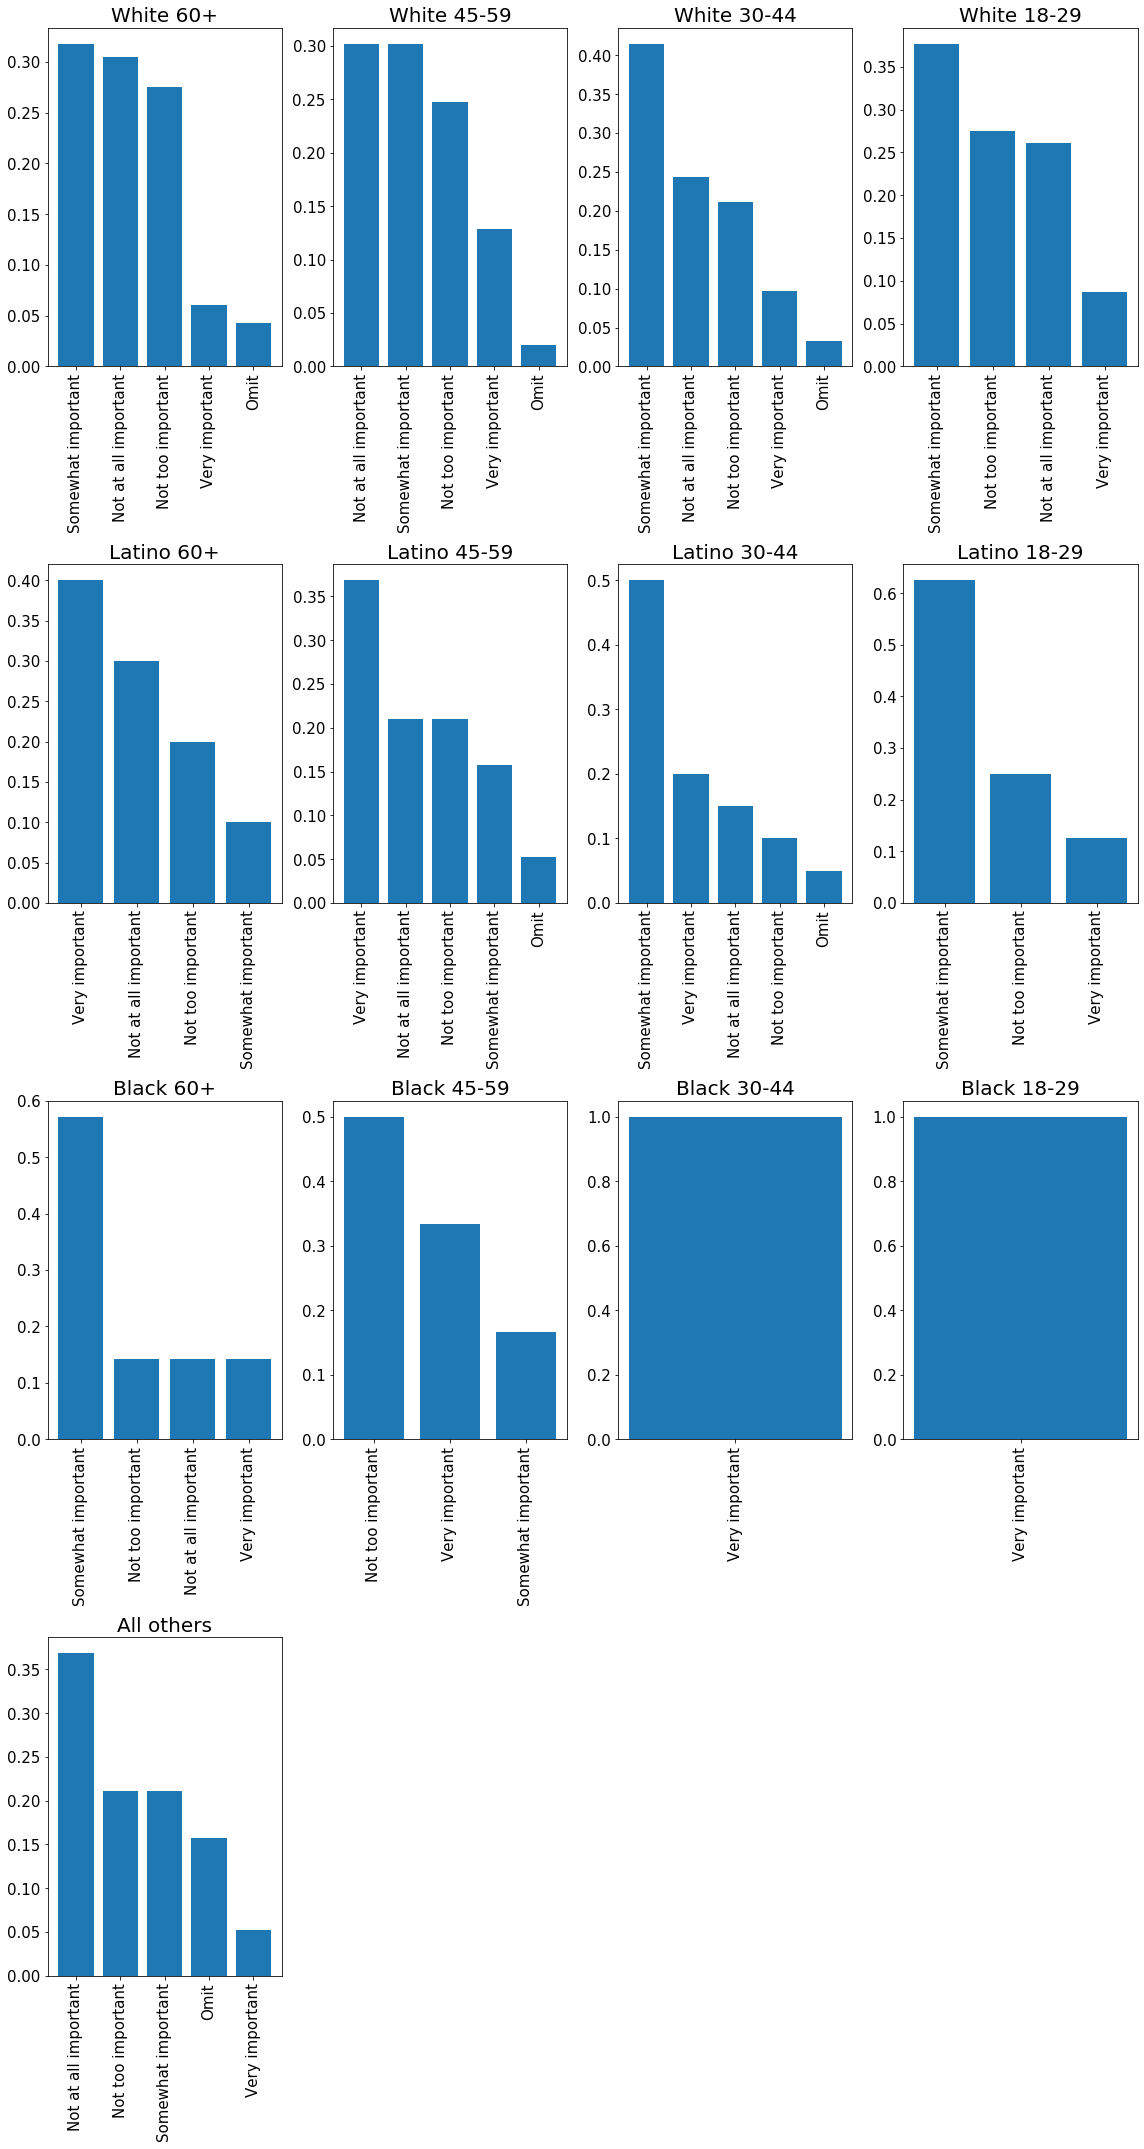

In [59]:
chart_simplifier(df_v2_con_rep, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACE18')


### Conservative Independents 

#### Plot of Impeachment approval by race 

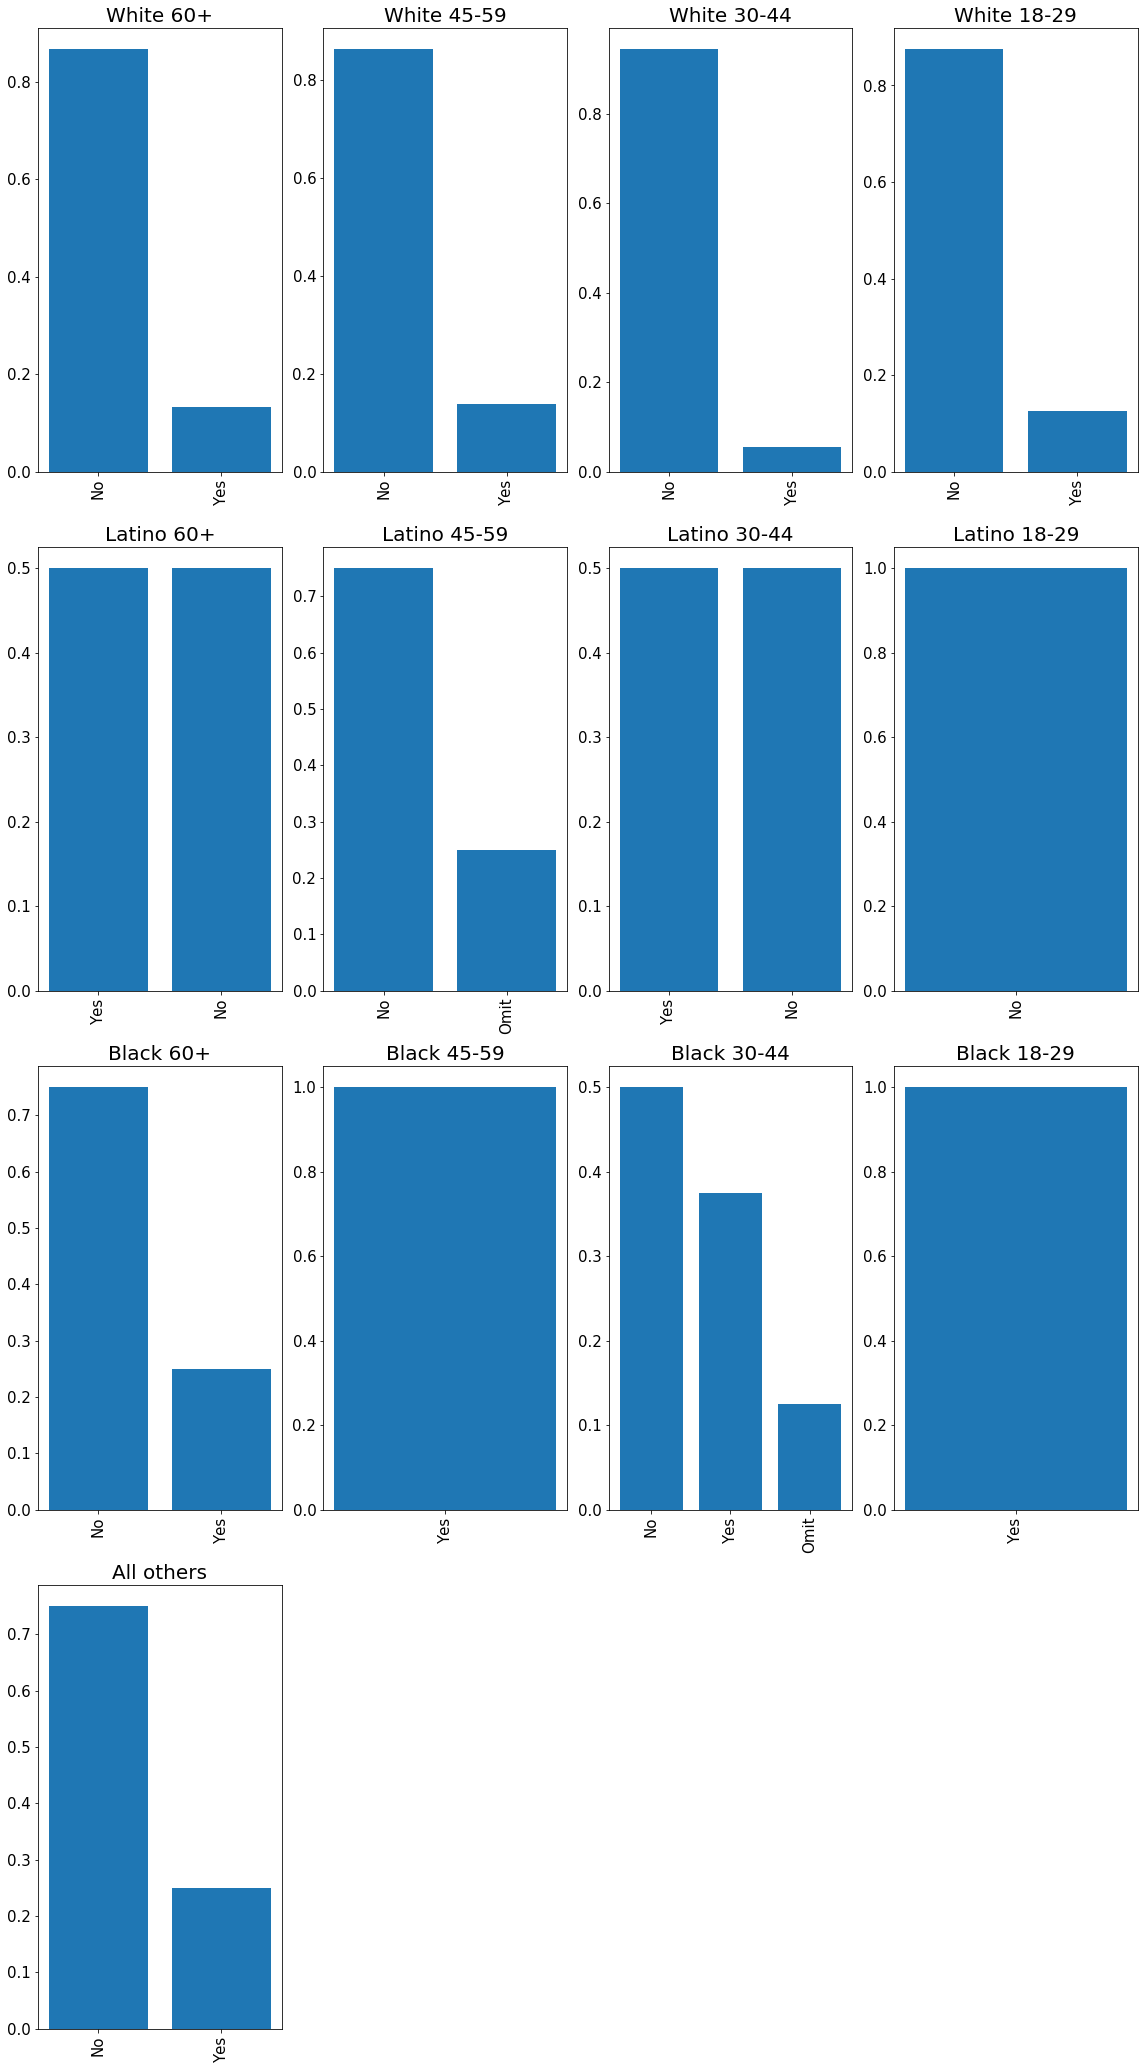

In [60]:
chart_simplifier(df_v2_con_ind , group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'IMPEACH18')


#### Plot of Whether the participant thinks the Russia investigation was justified by race

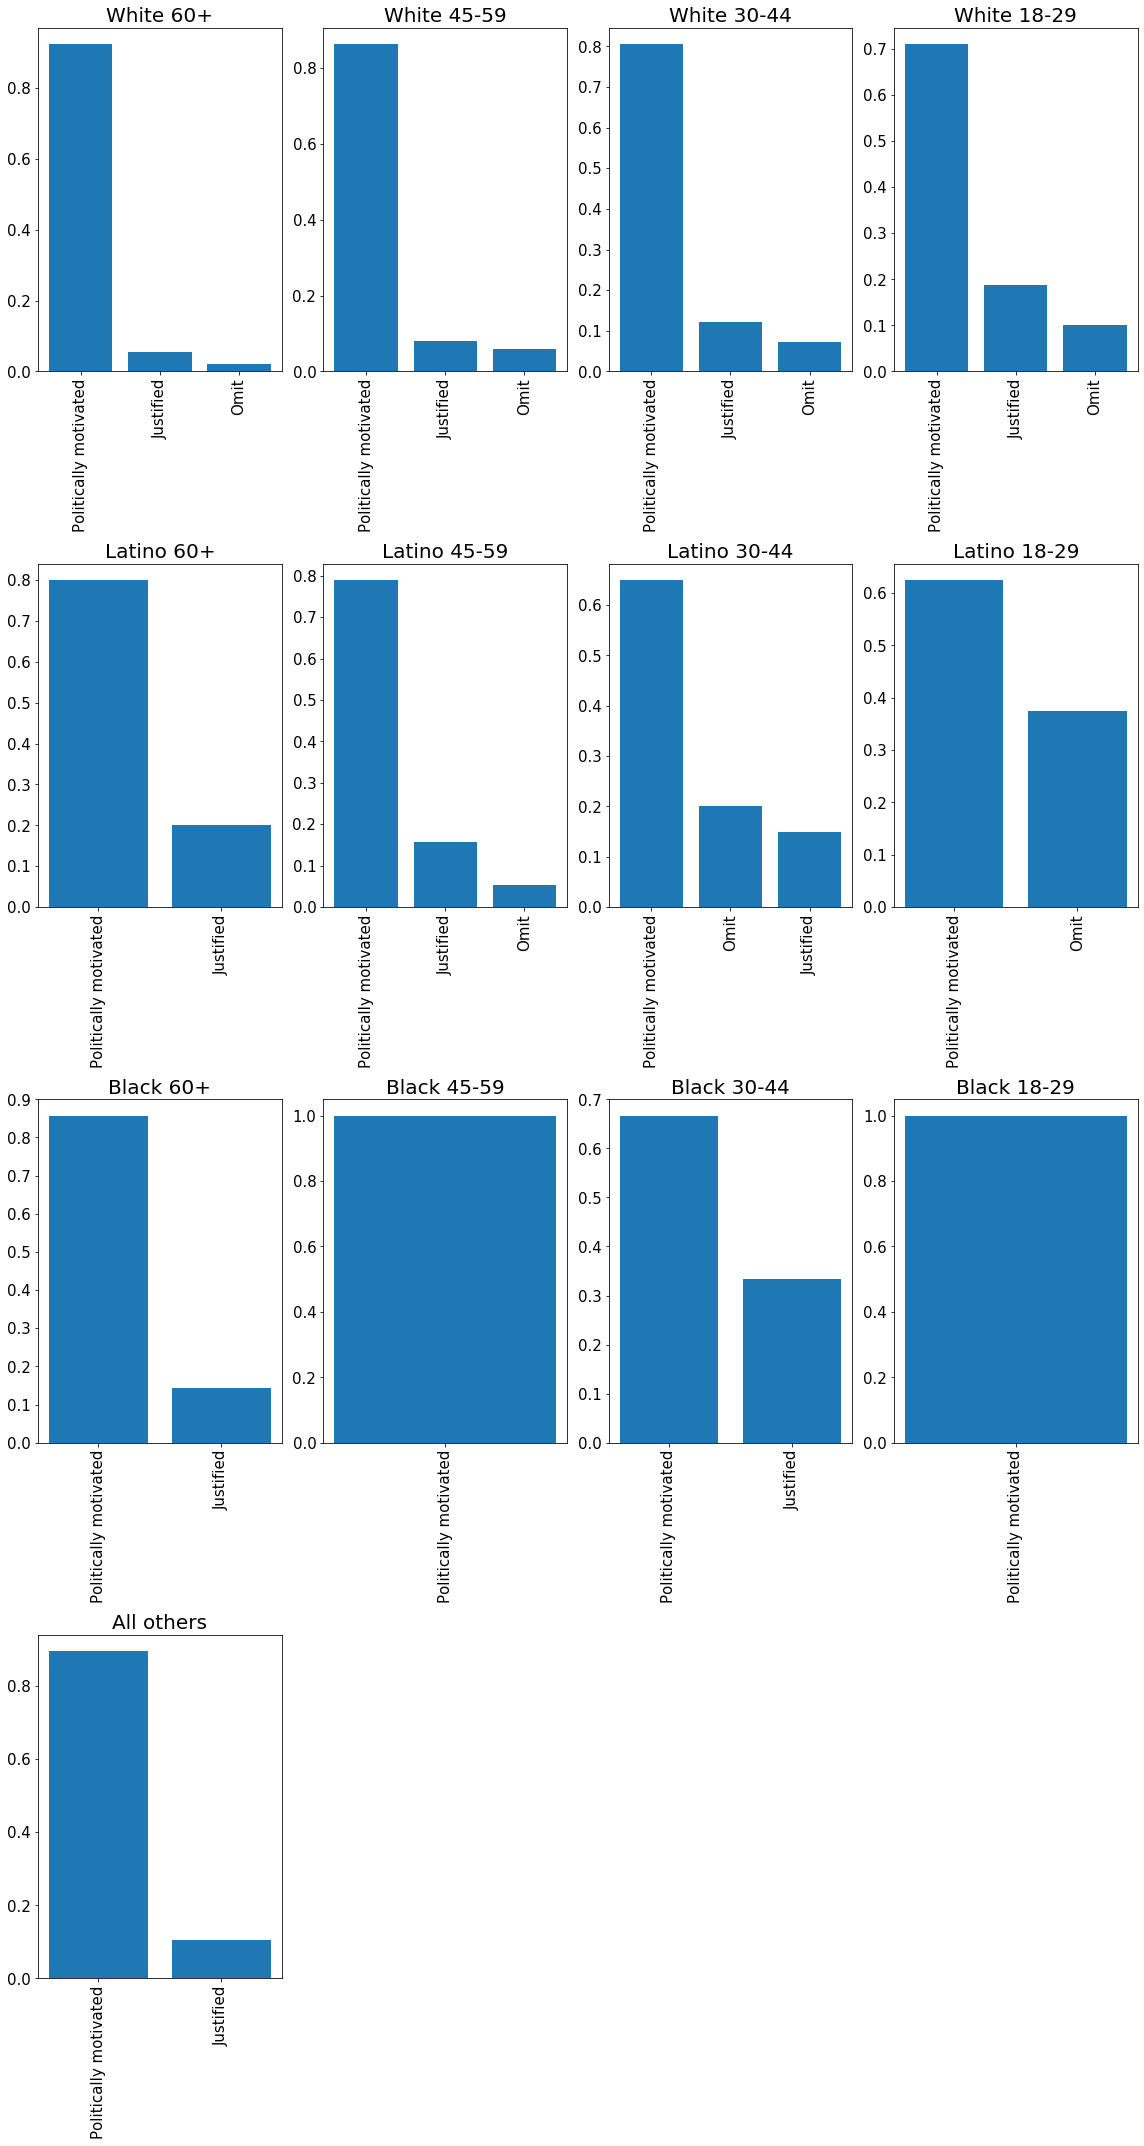

In [61]:
chart_simplifier(df_v2_con_rep, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'RUSSIA18')


#### Plot of the participant's approval of Trump's immigration policies by race

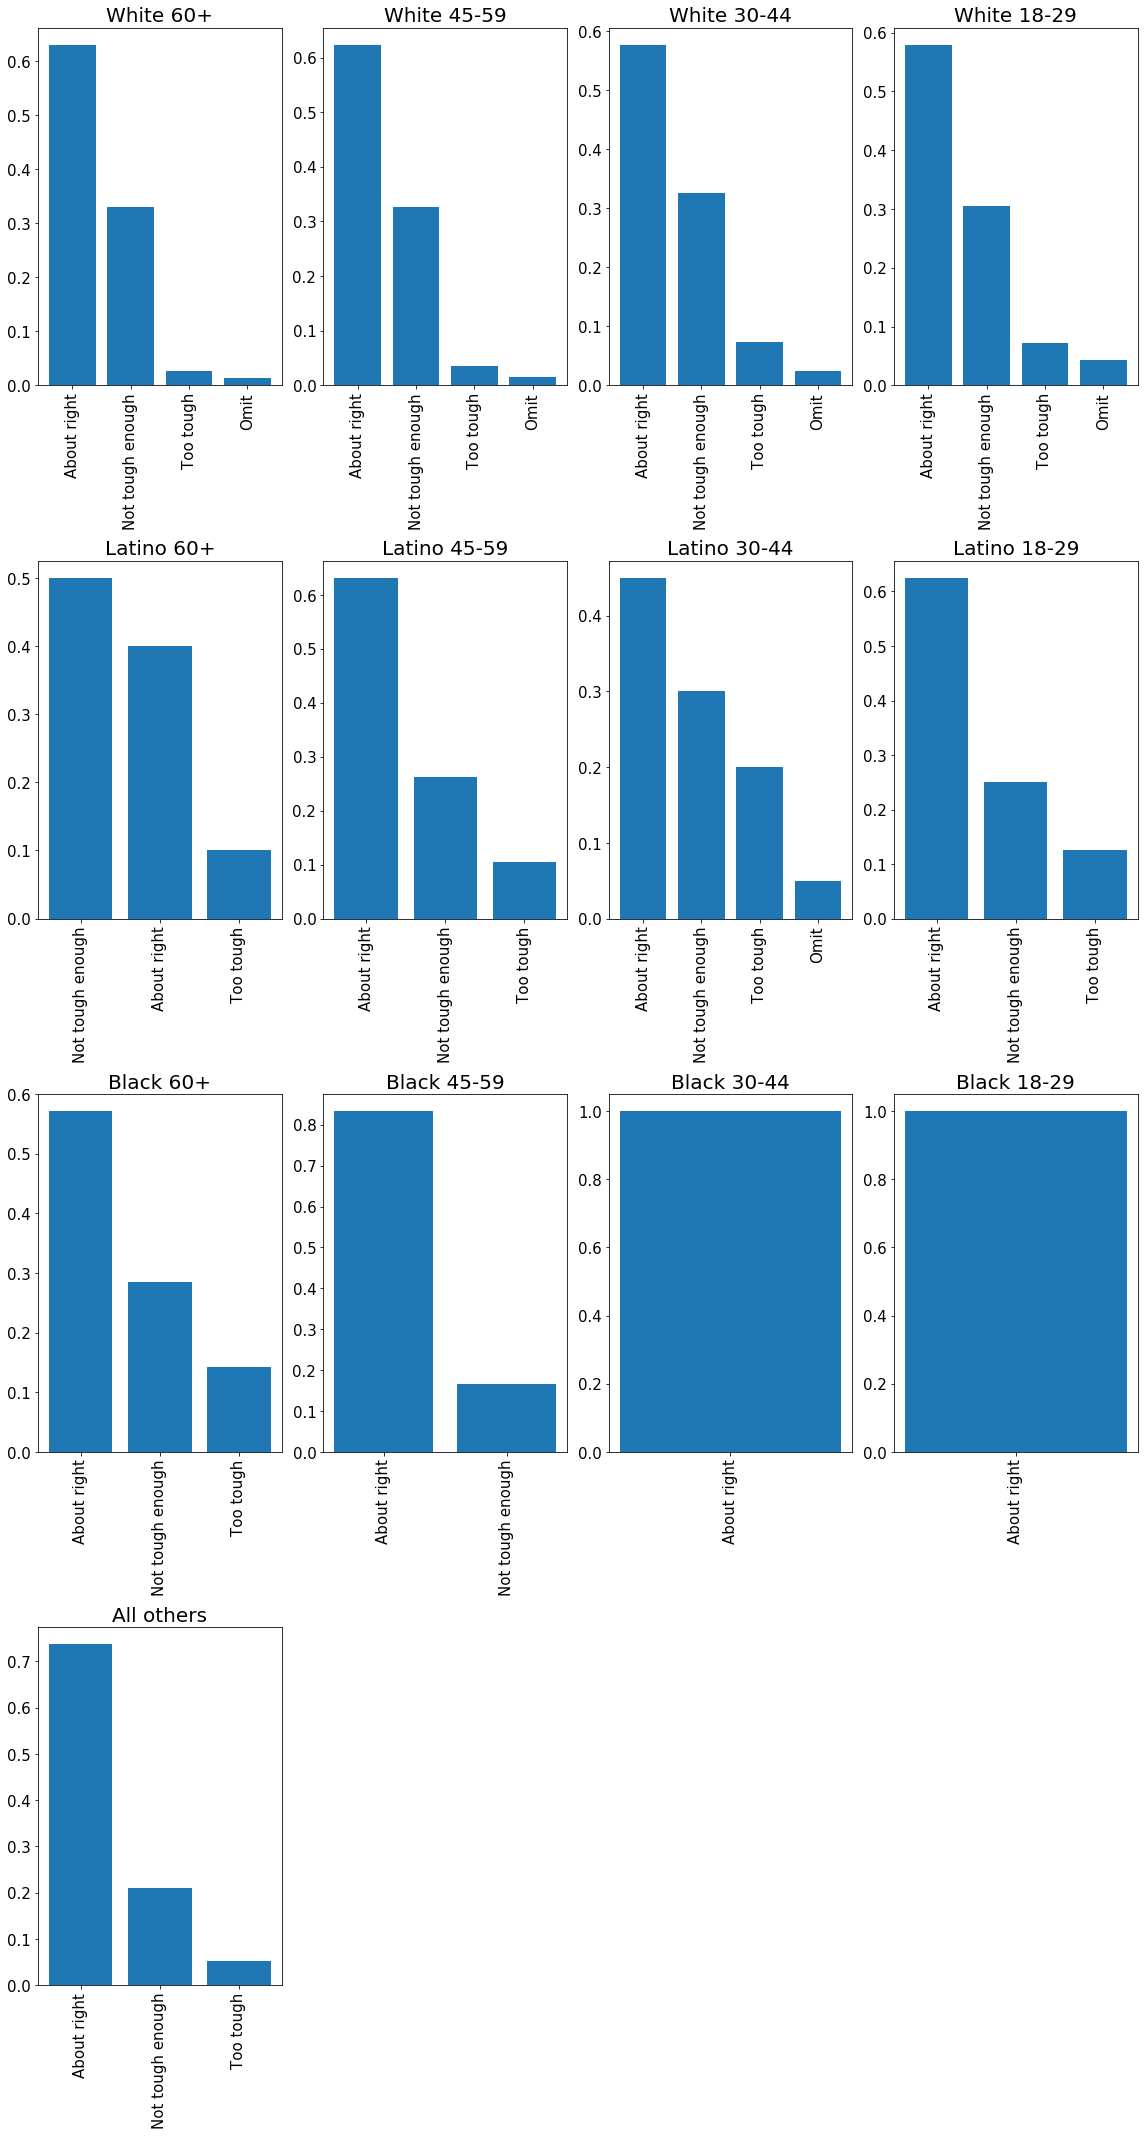

In [62]:
chart_simplifier(df_v2_con_rep, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'TRUMPIMM')


#### Plot of the participants opinion of the treatment of minorities versus white people by race

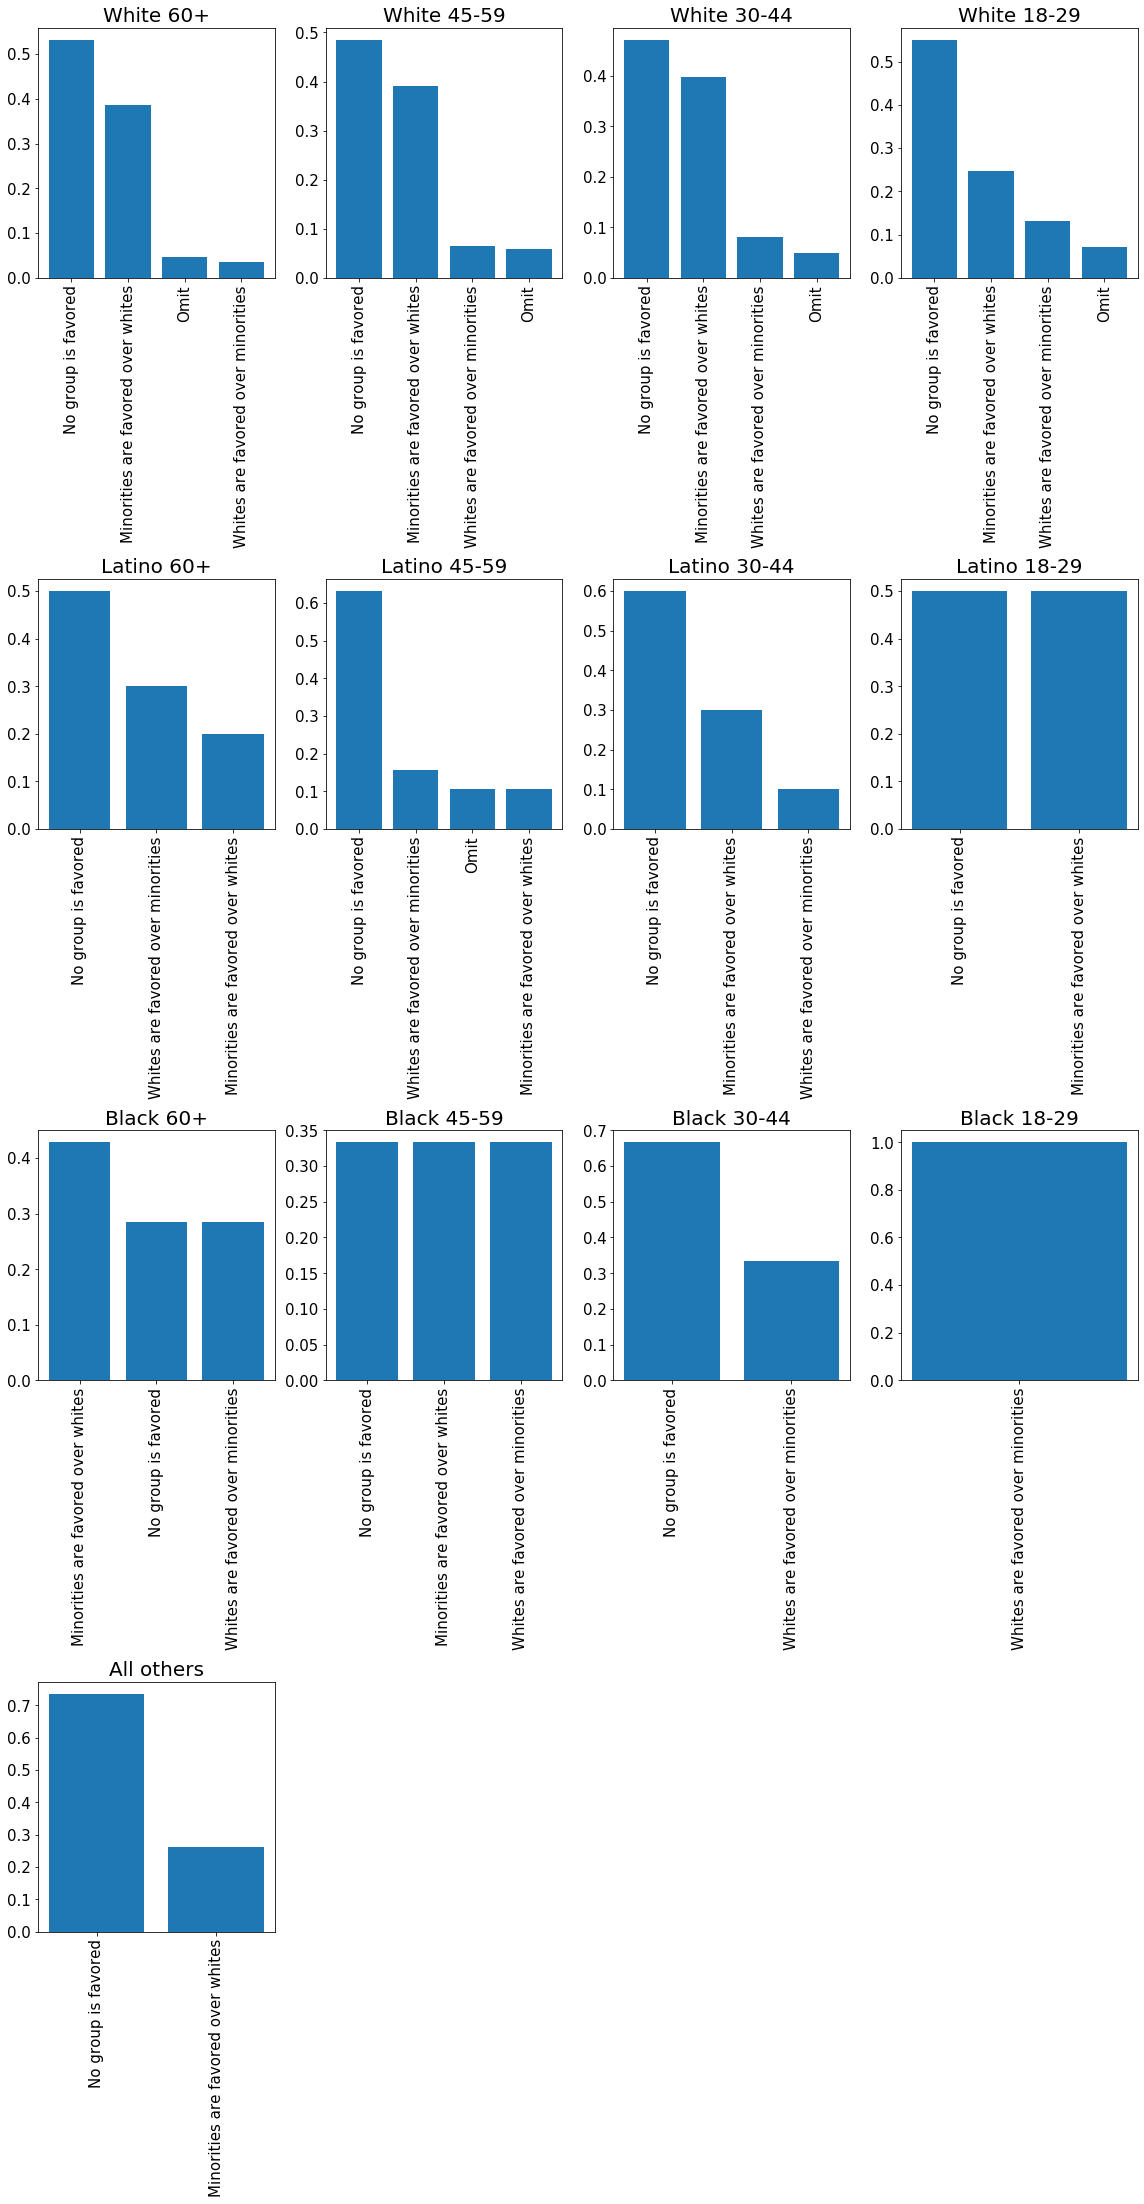

In [84]:
chart_simplifier(df_v2_con_rep, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACEFACTOR')


#### Which issue is most important to the participant by race

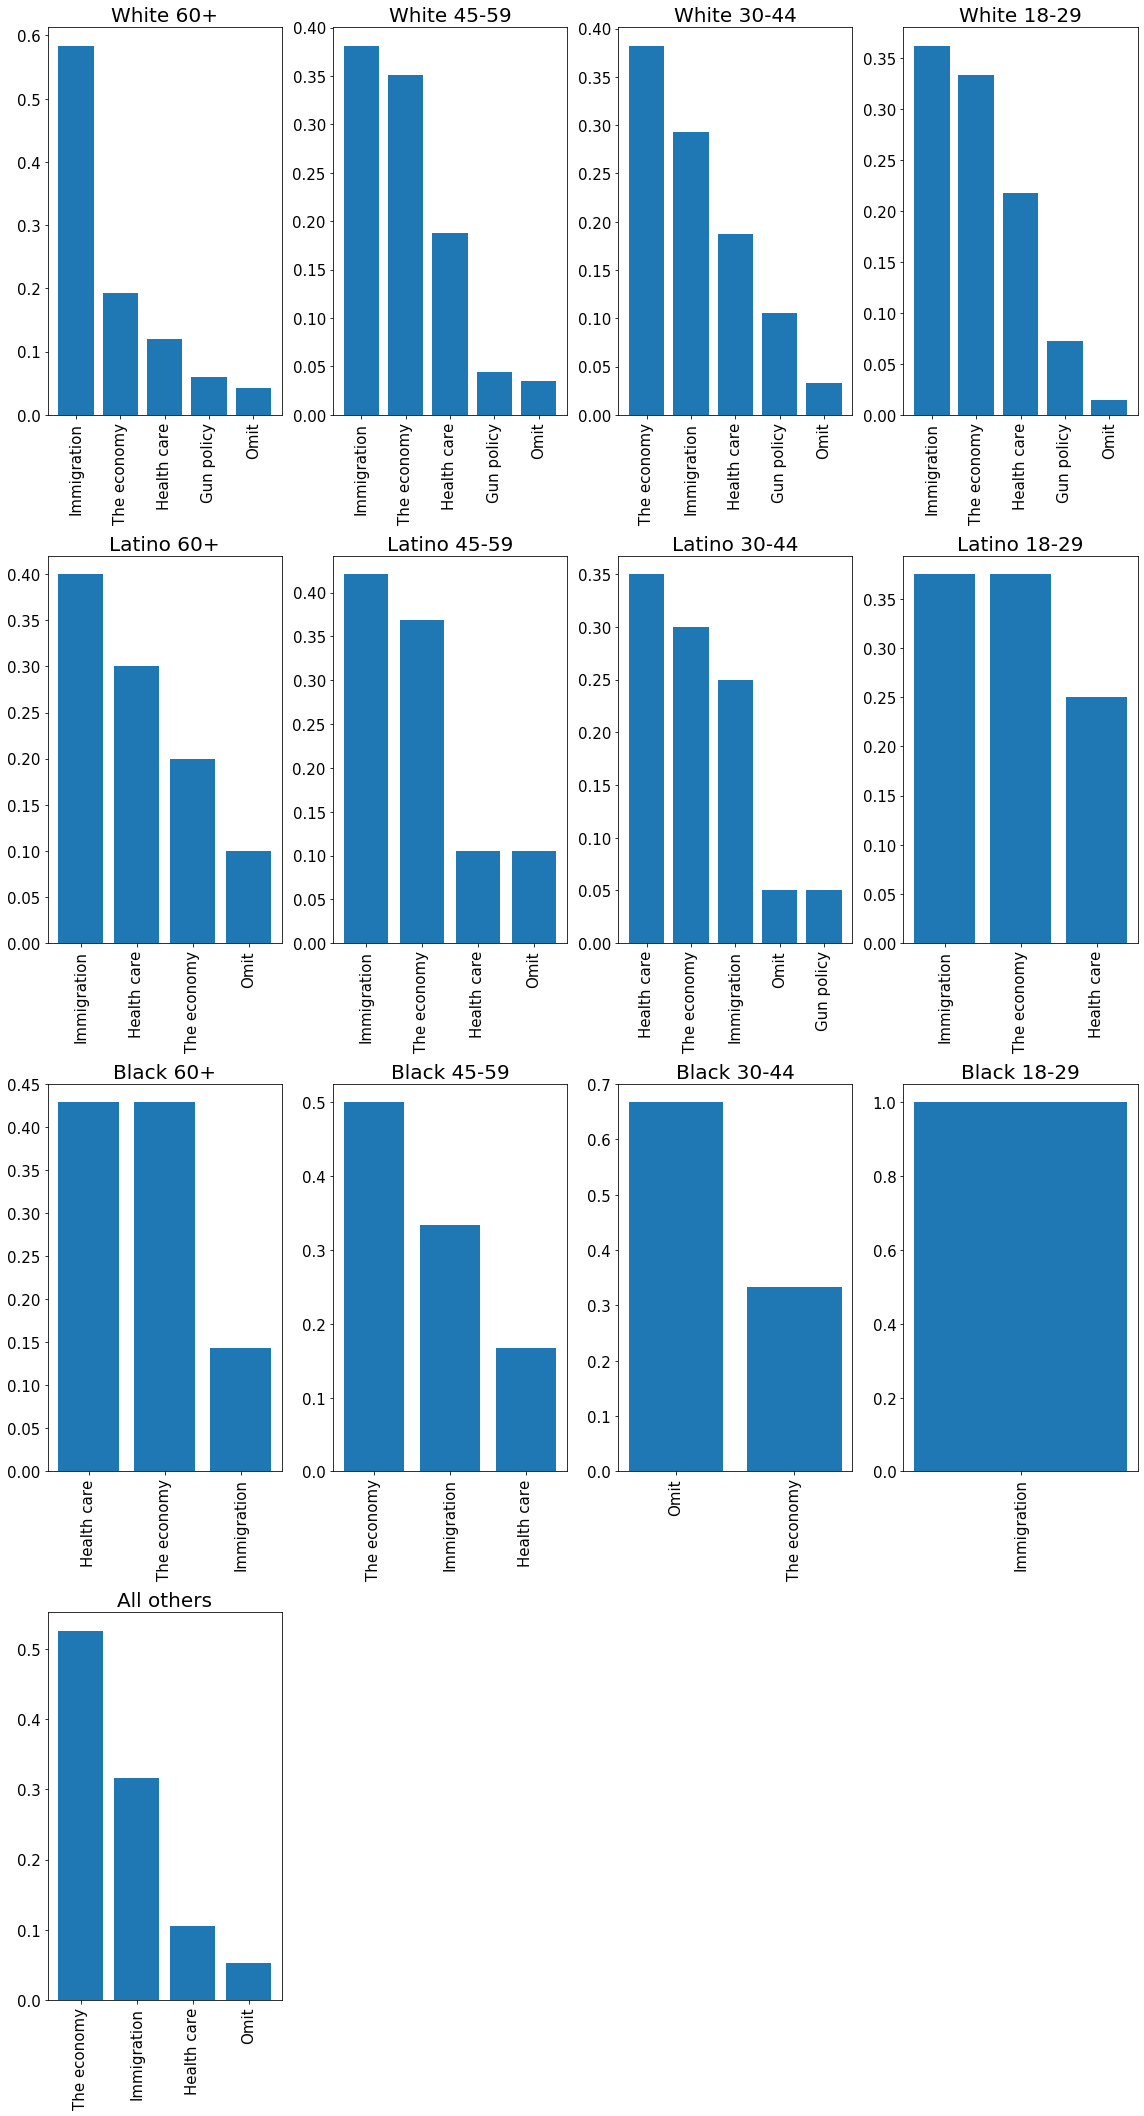

In [64]:
chart_simplifier(df_v2_con_rep, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'ISSUE18')


#### Plot show the participant's opinion of having people of color represented in office by race 

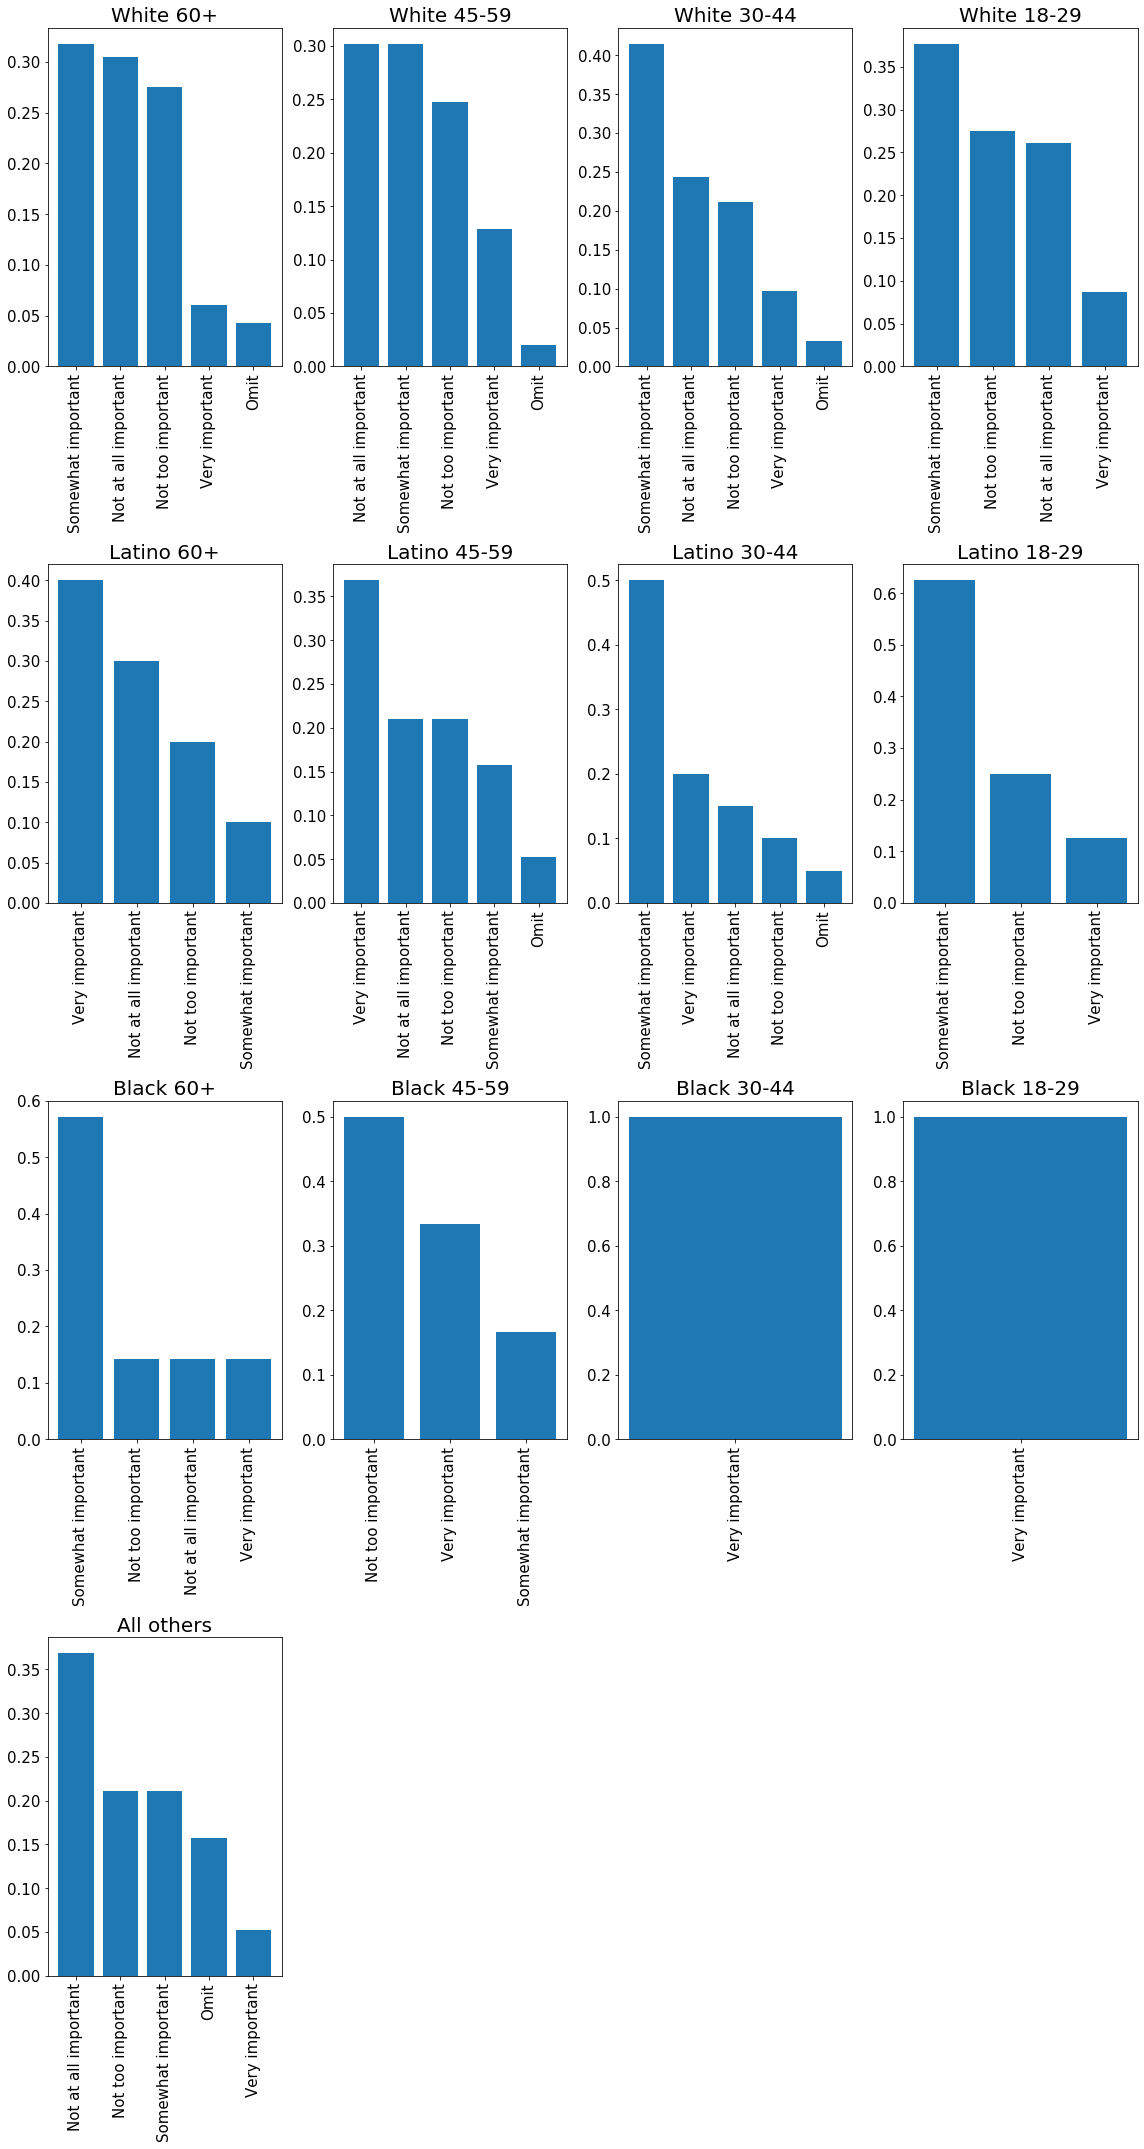

In [65]:
chart_simplifier(df_v2_con_rep, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACE18')


### Moderate Independents

#### Plot of Impeachment approval by race 

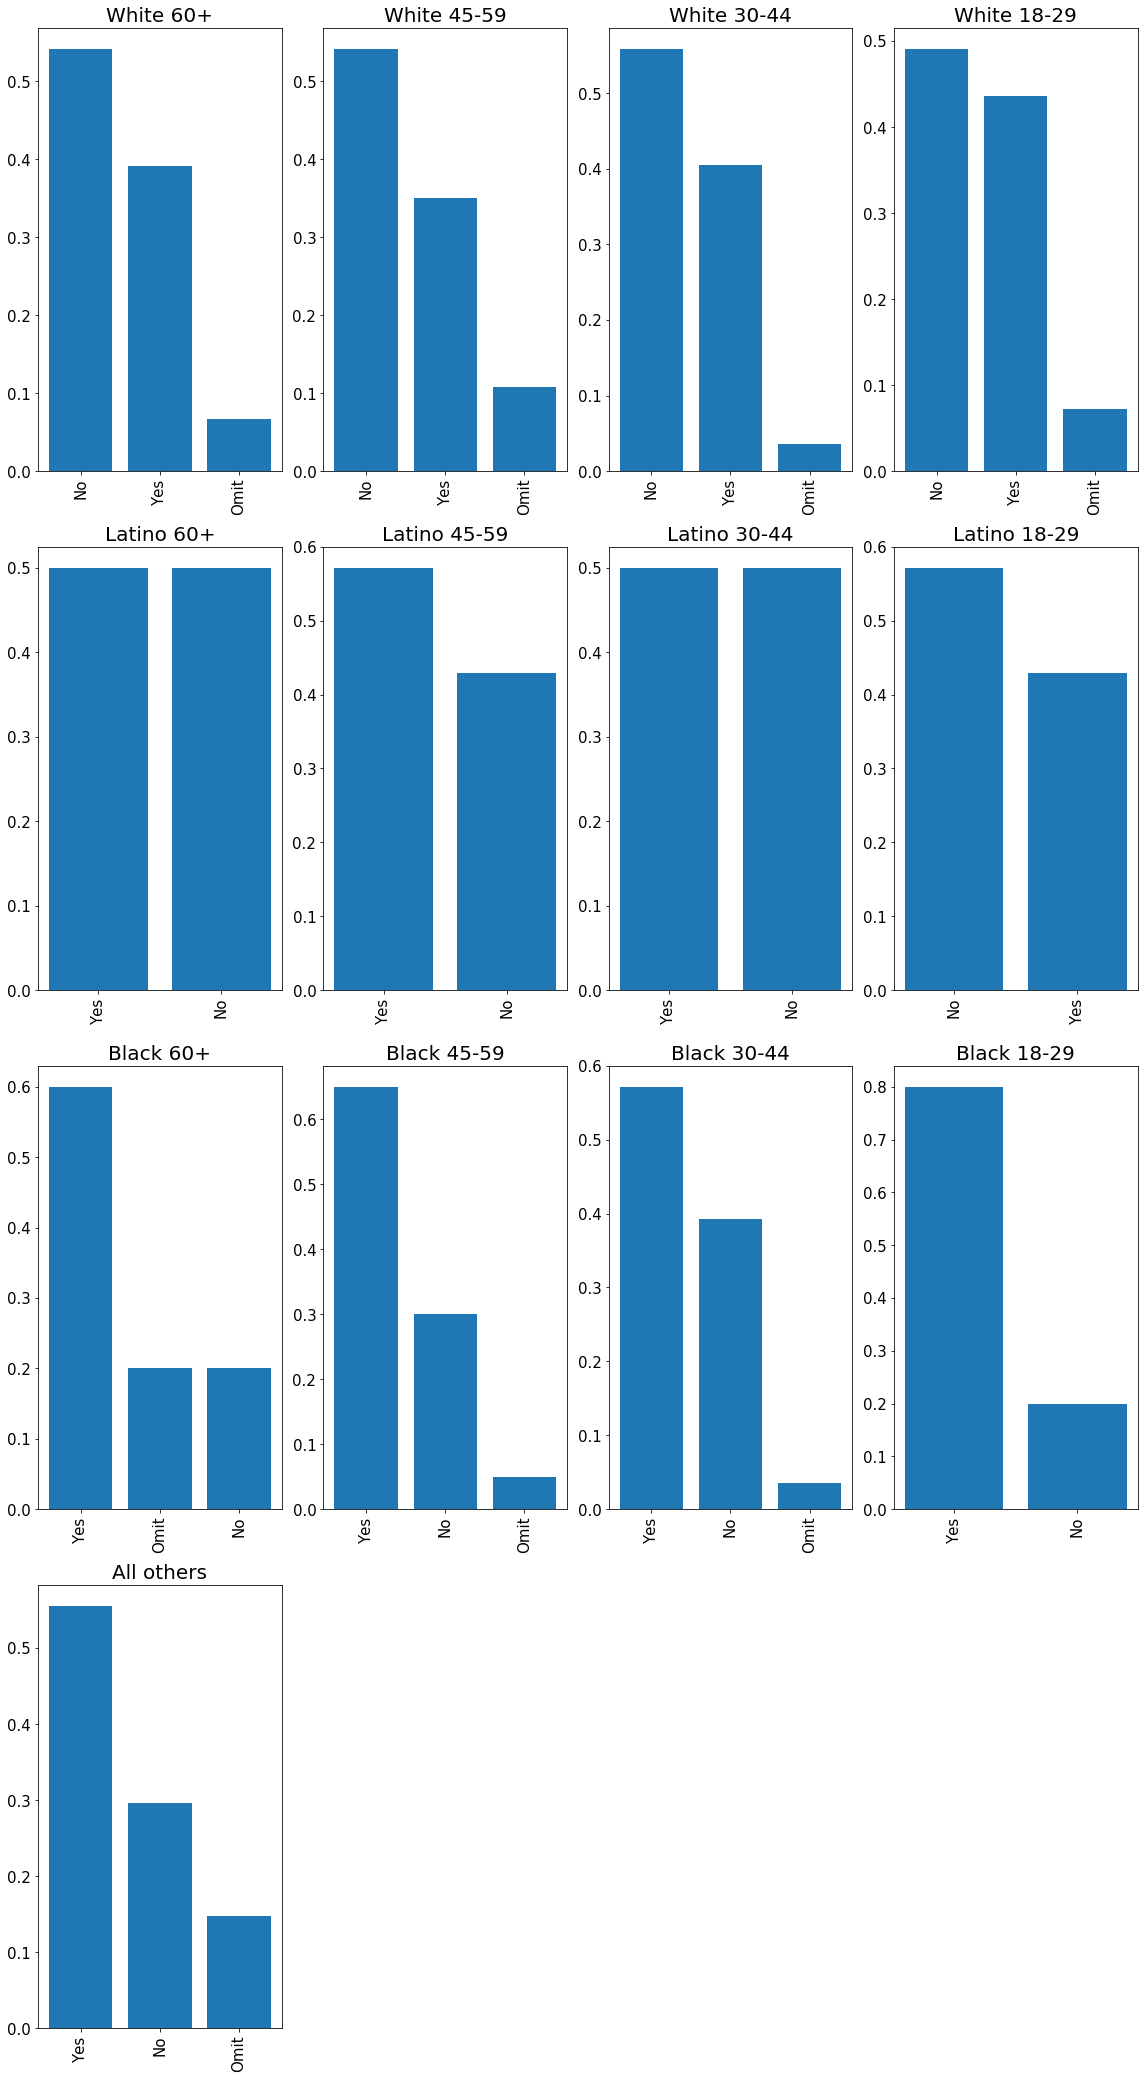

In [91]:
chart_simplifier(df_v2_mod_ind , group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'IMPEACH18')


#### Plot of Whether the participant thinks the Russia investigation was justified by race

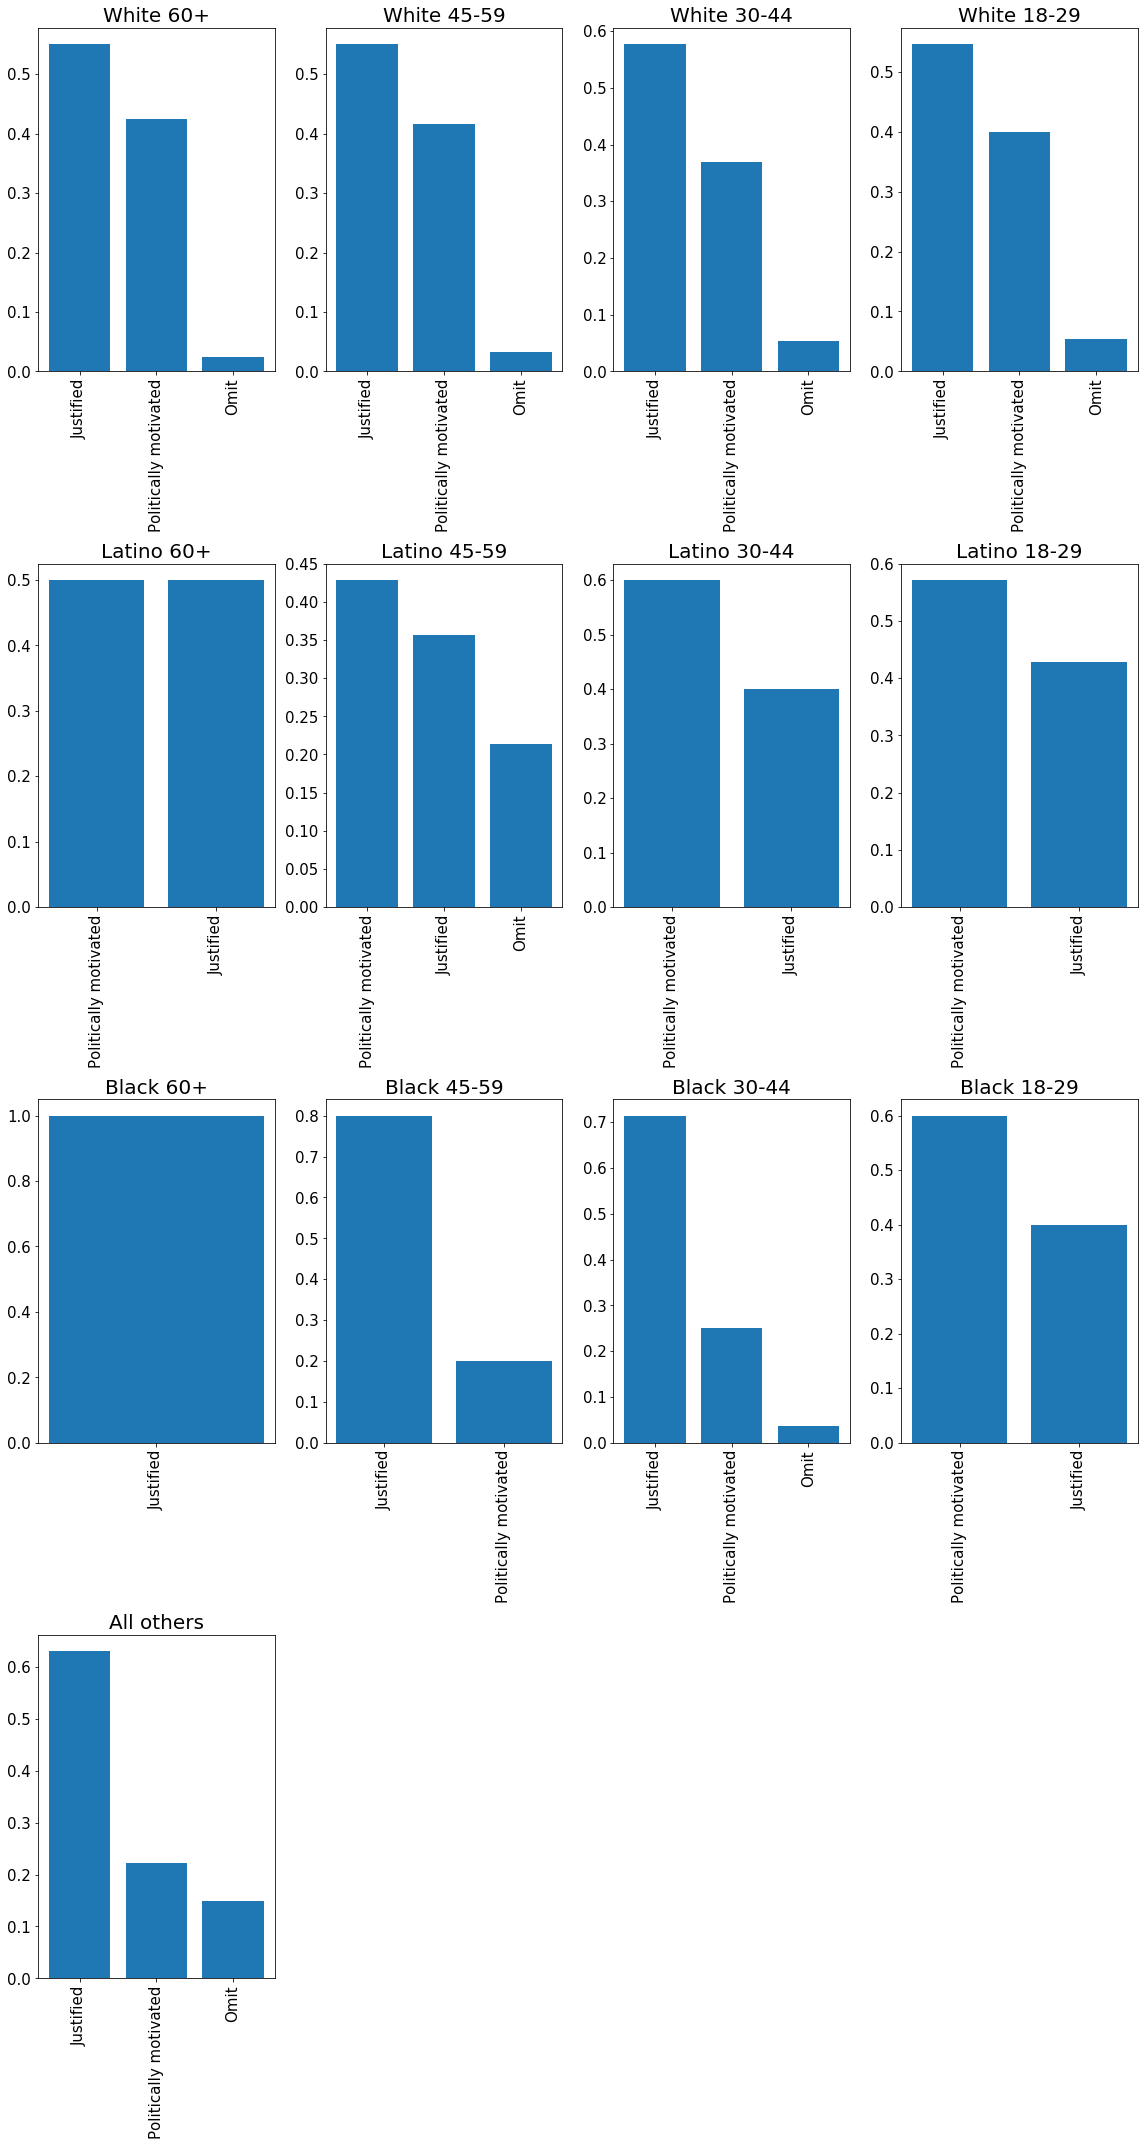

In [92]:
chart_simplifier(df_v2_mod_ind, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'RUSSIA18')


#### Plot of the participant's approval of Trump's immigration policies by race

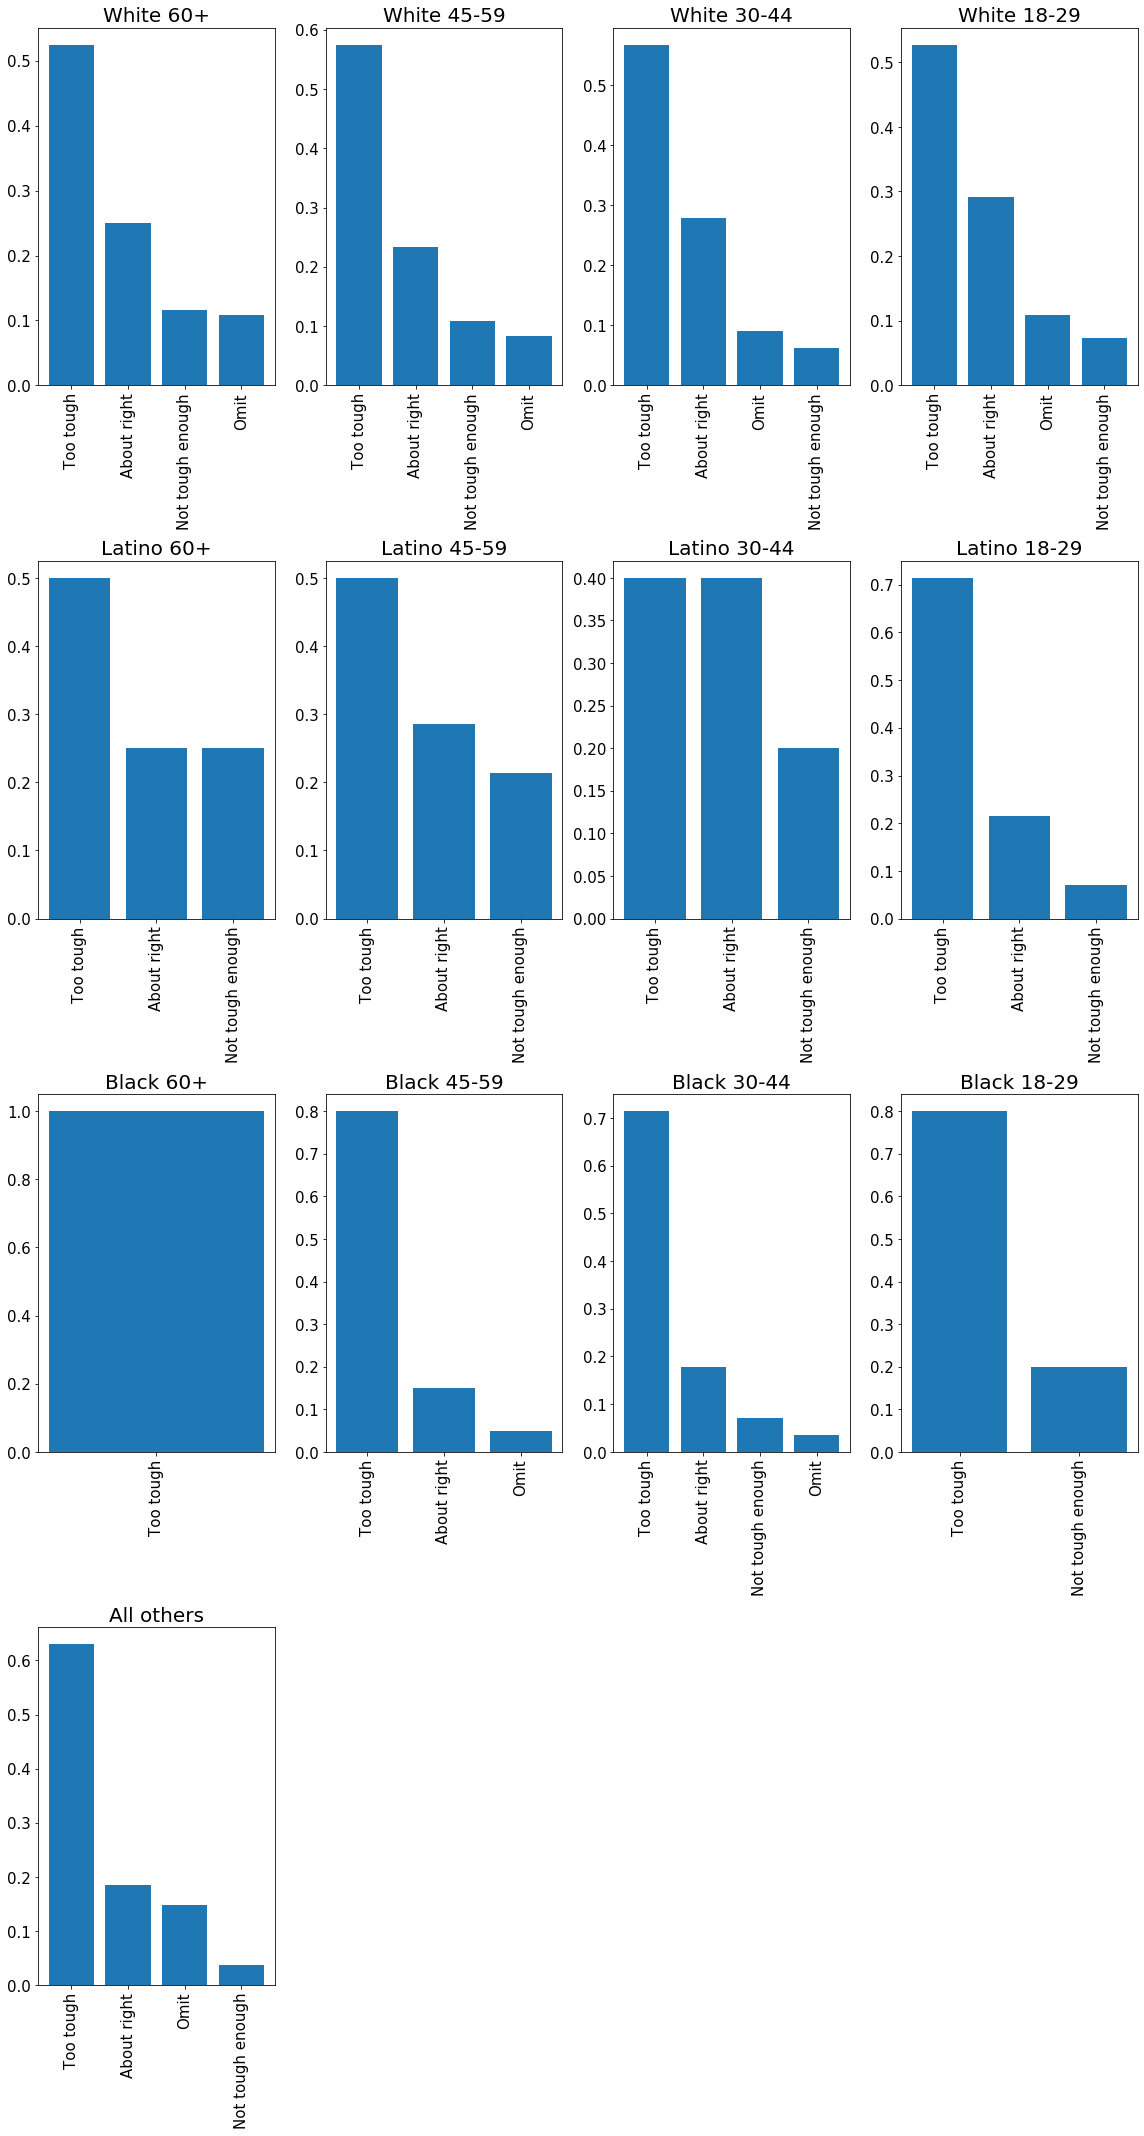

In [93]:
chart_simplifier(df_v2_mod_ind, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'TRUMPIMM')


#### Plot of the participants opinion of the treatment of minorities versus white people by race 

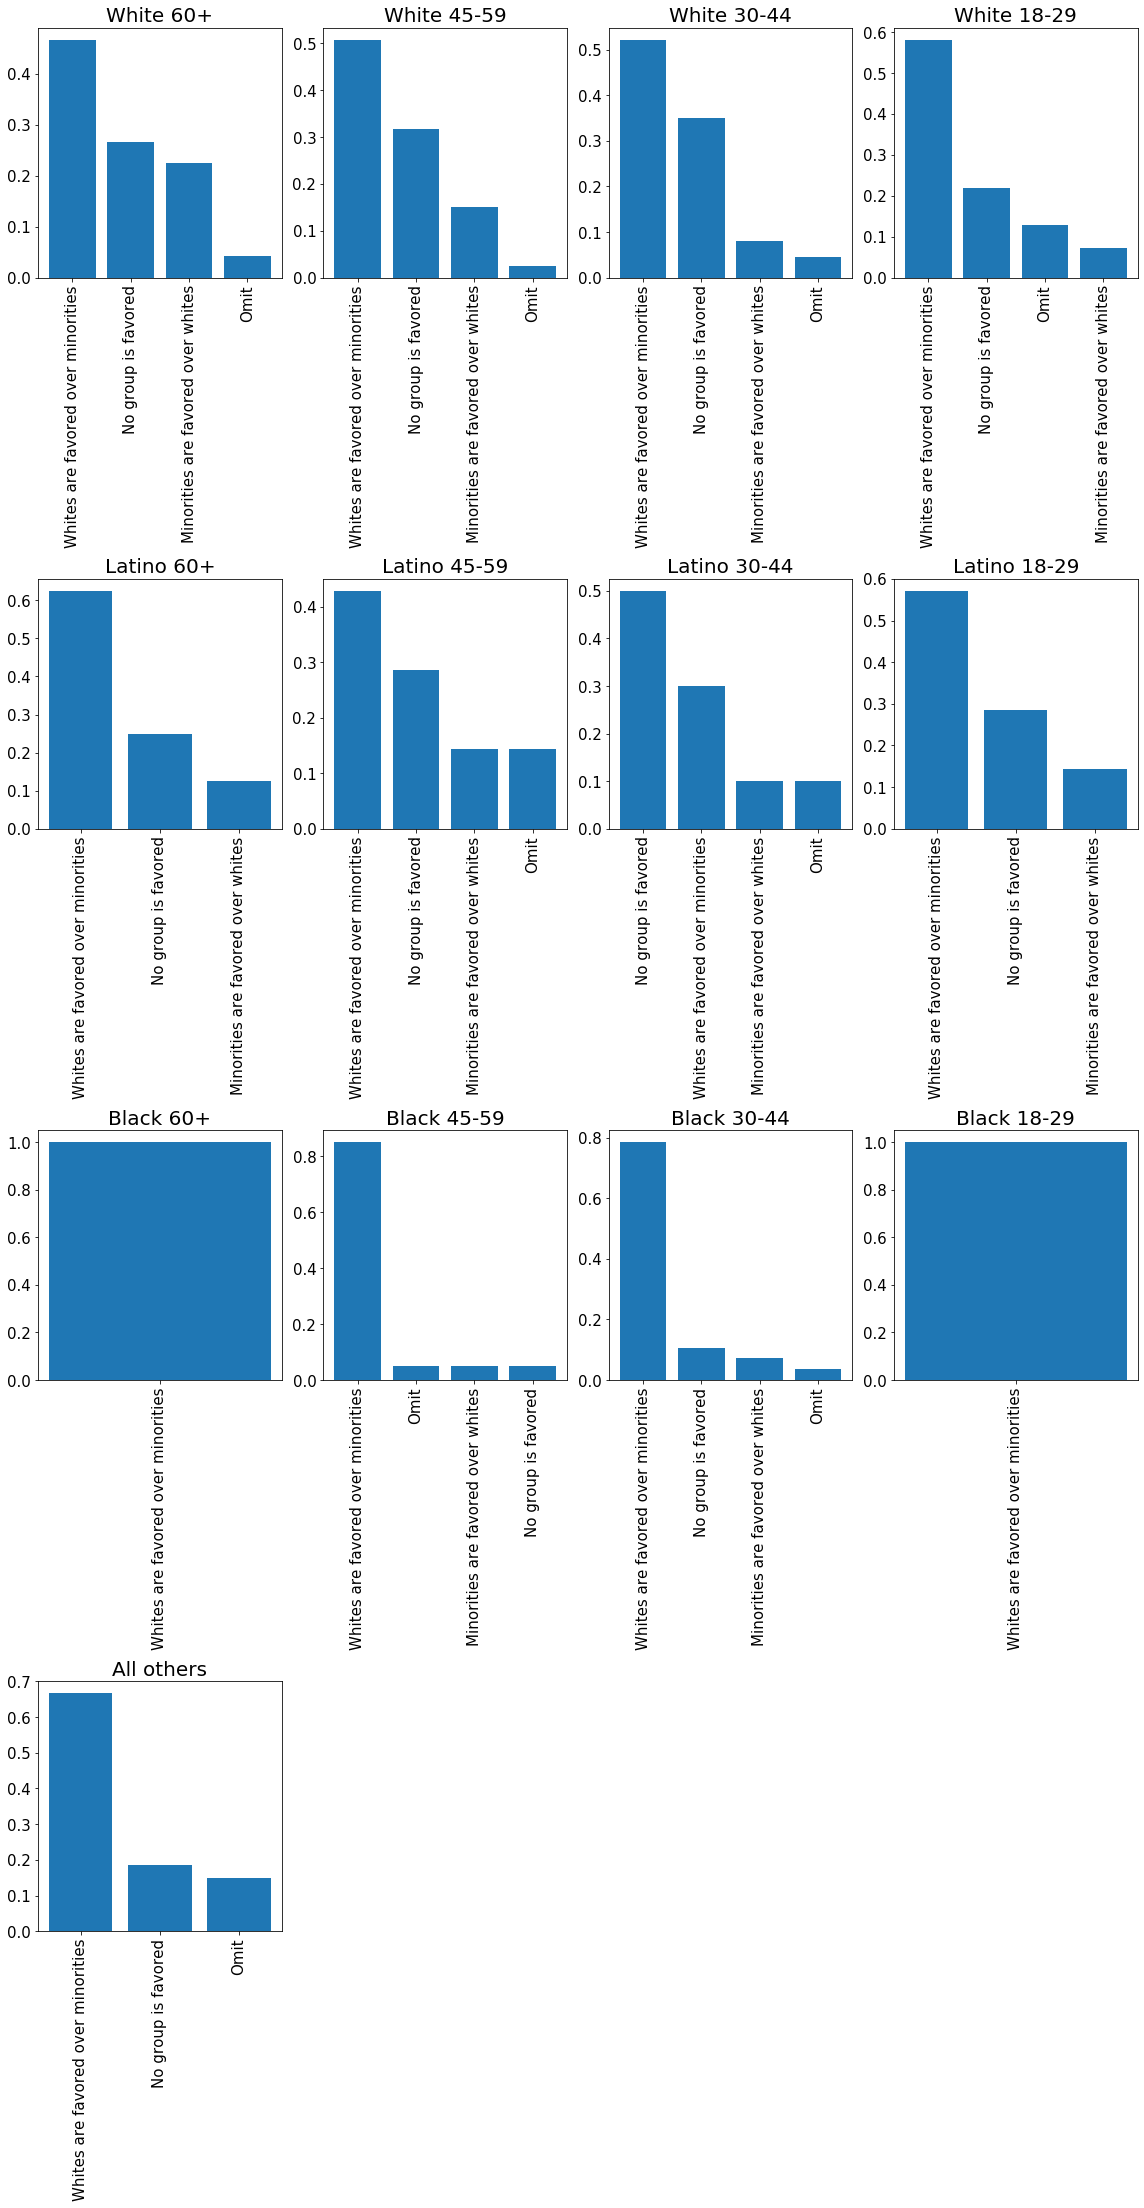

In [94]:
chart_simplifier(df_v2_mod_ind, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACEFACTOR')


#### Which issue is most important to the participant by race

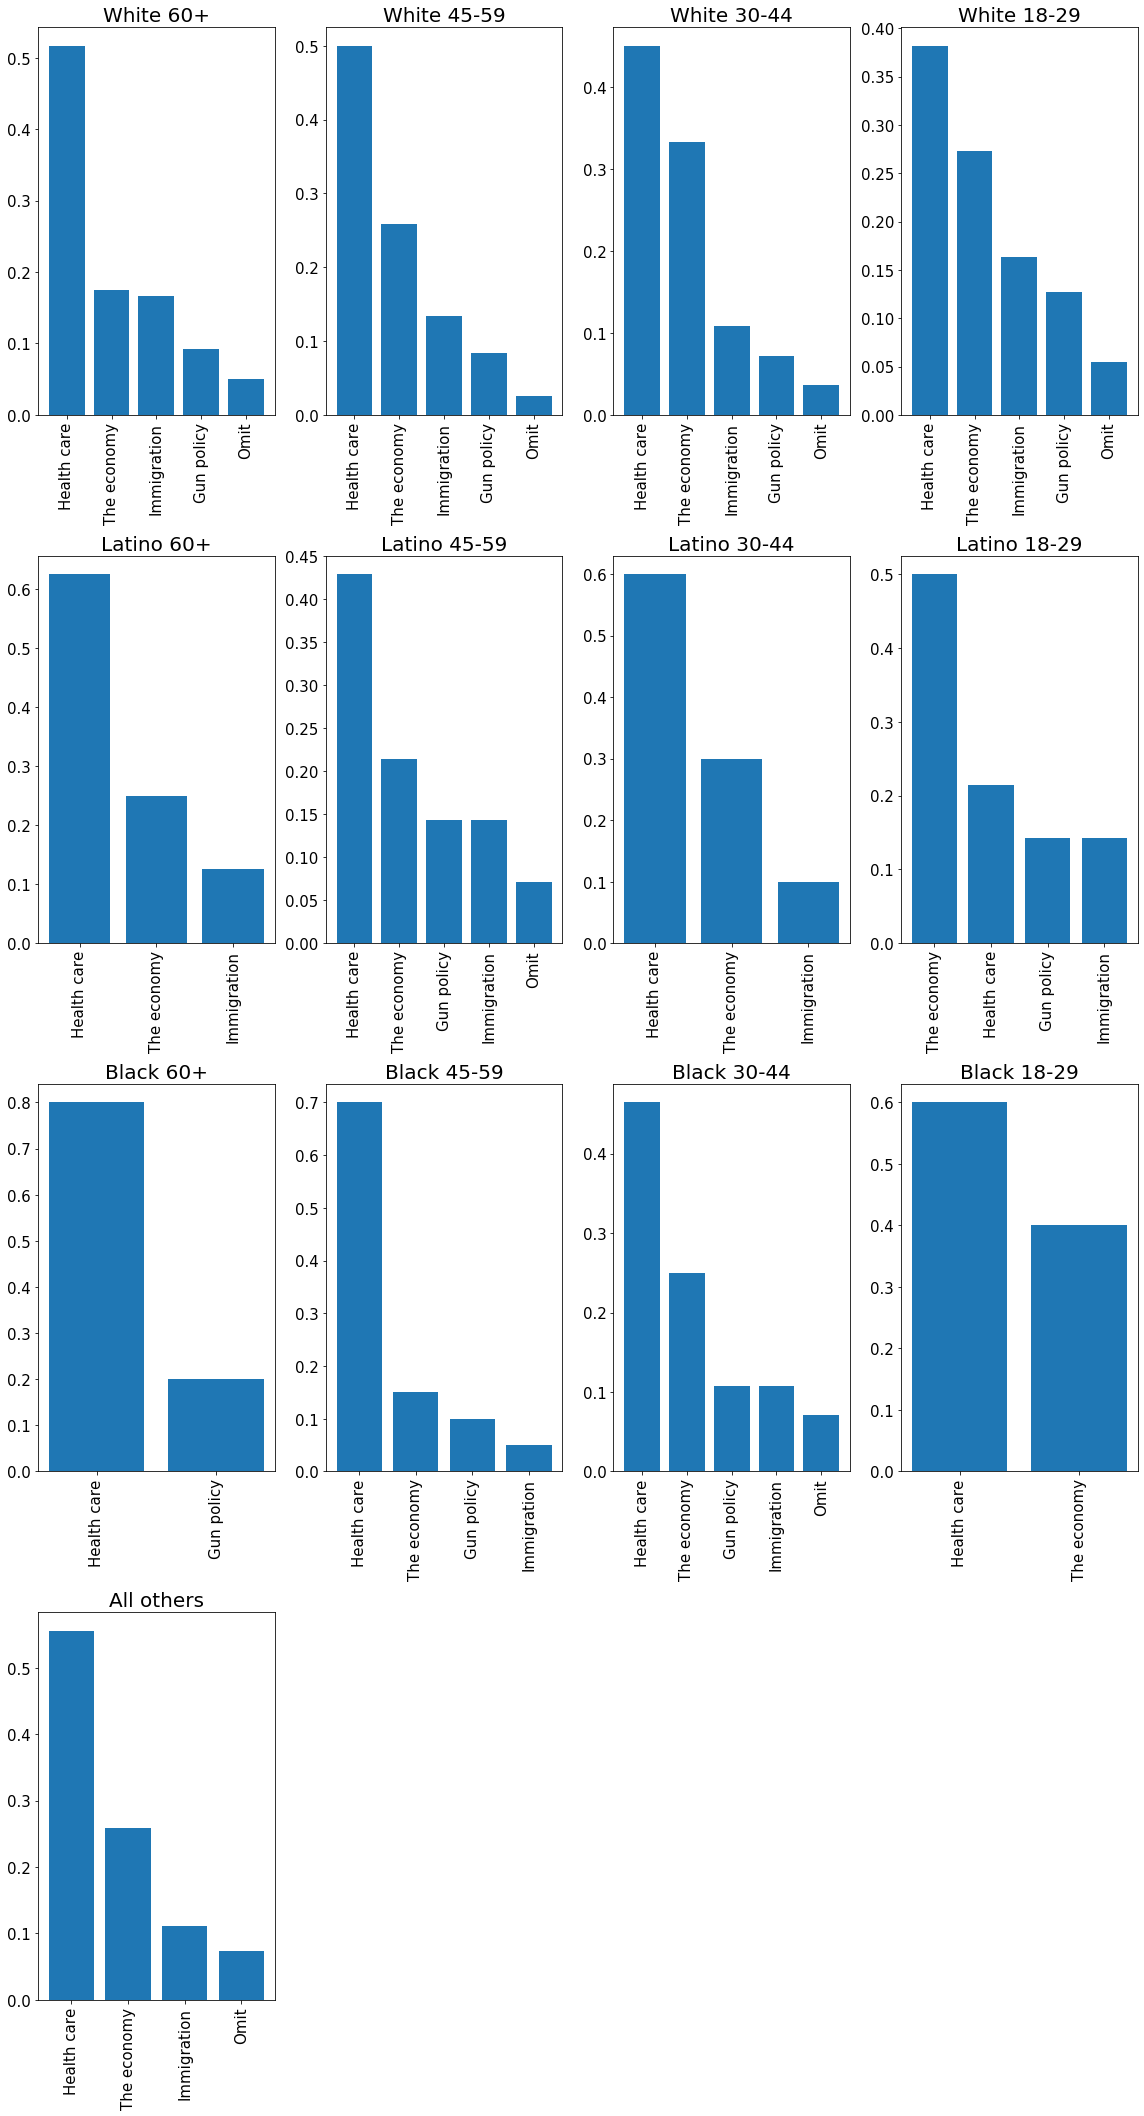

In [95]:
chart_simplifier(df_v2_mod_ind, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'ISSUE18')


#### Plot show the participant's opinion of having people of color represented in office by race 

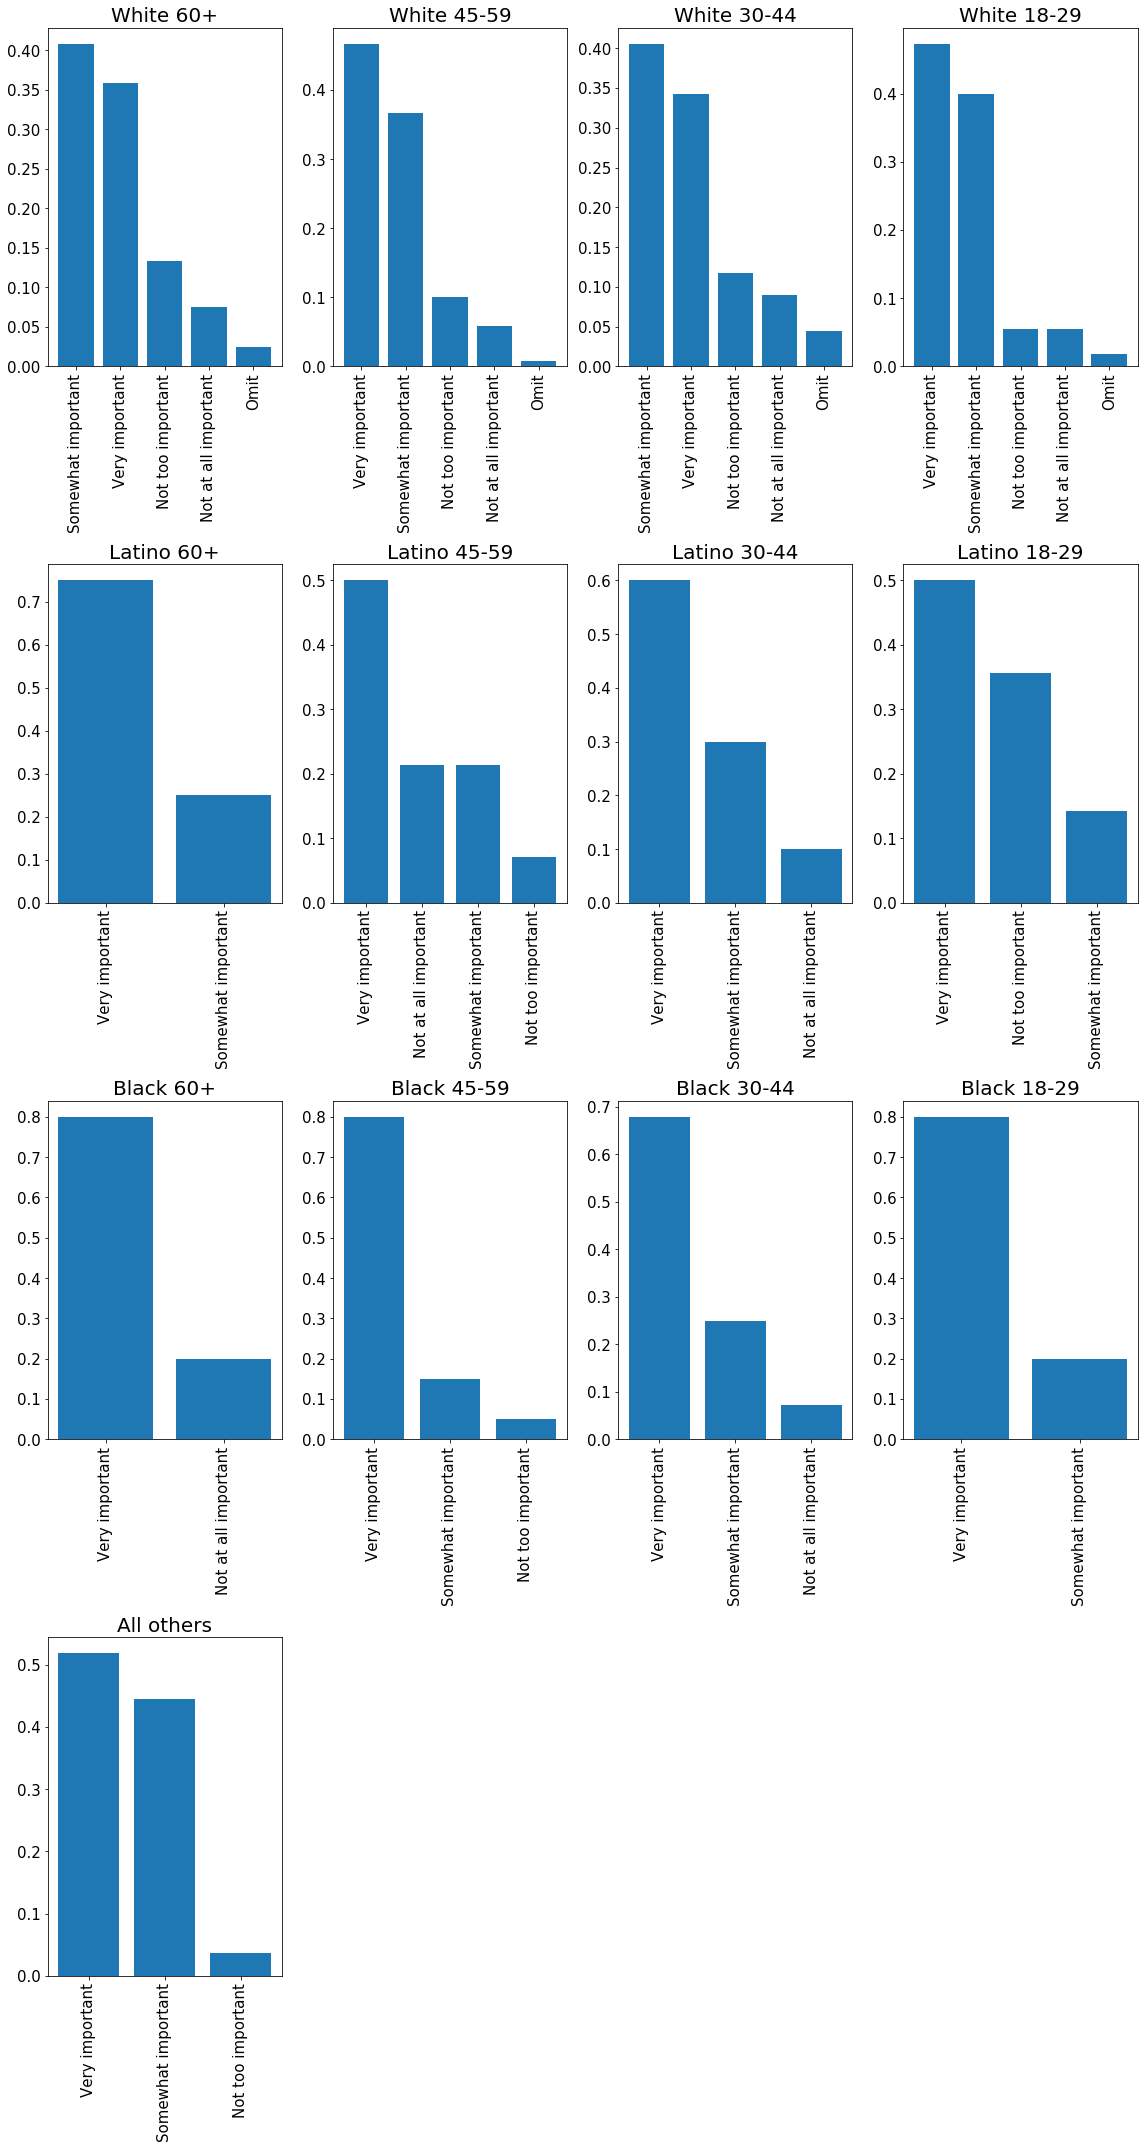

In [96]:
chart_simplifier(df_v2_mod_ind, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACE18')


### All Independents 

#### Plot of Impeachment approval by race 

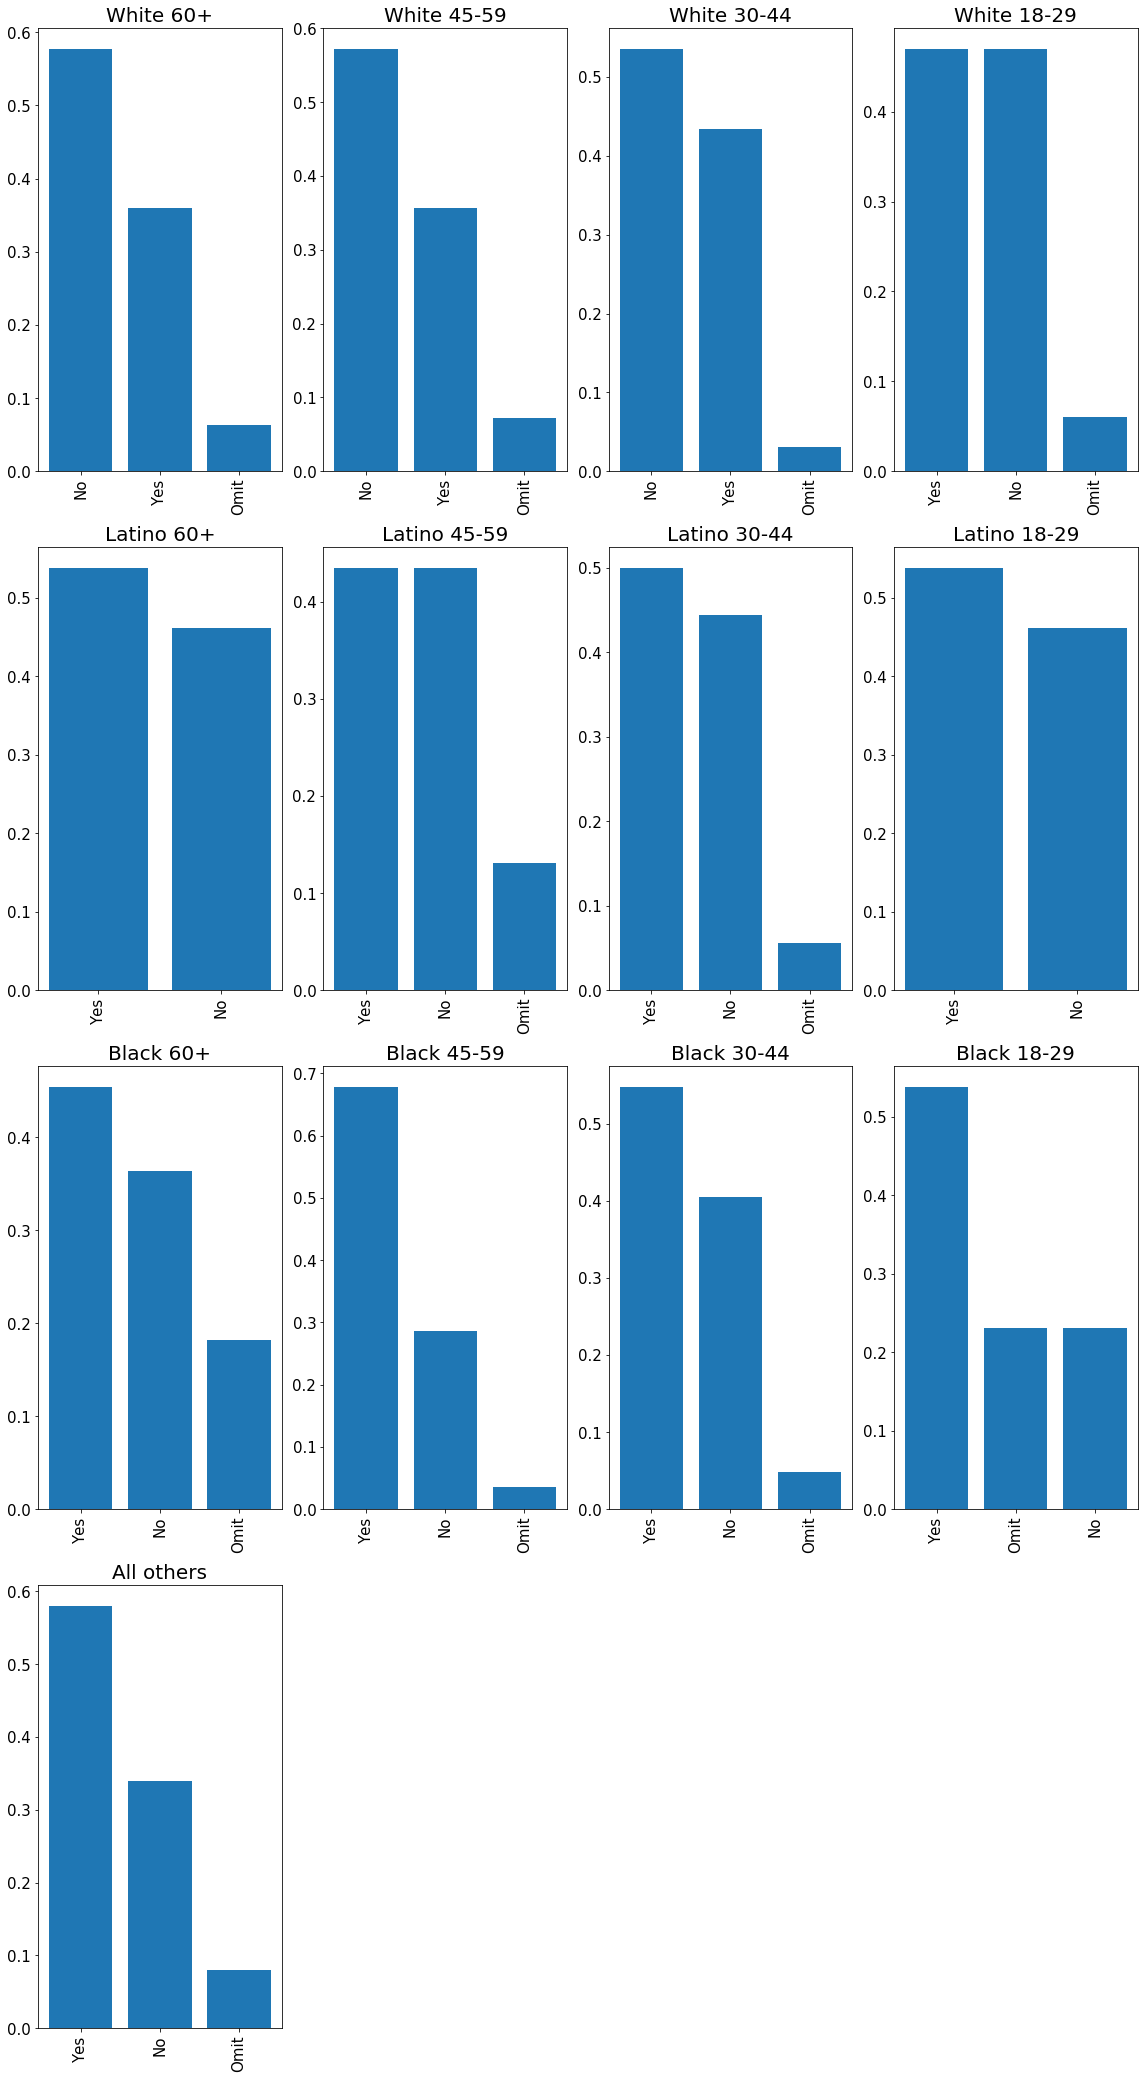

In [97]:
chart_simplifier(df_v2_all_ind , group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'IMPEACH18')


#### Plot of Whether the participant thinks the Russia investigation was justified by race

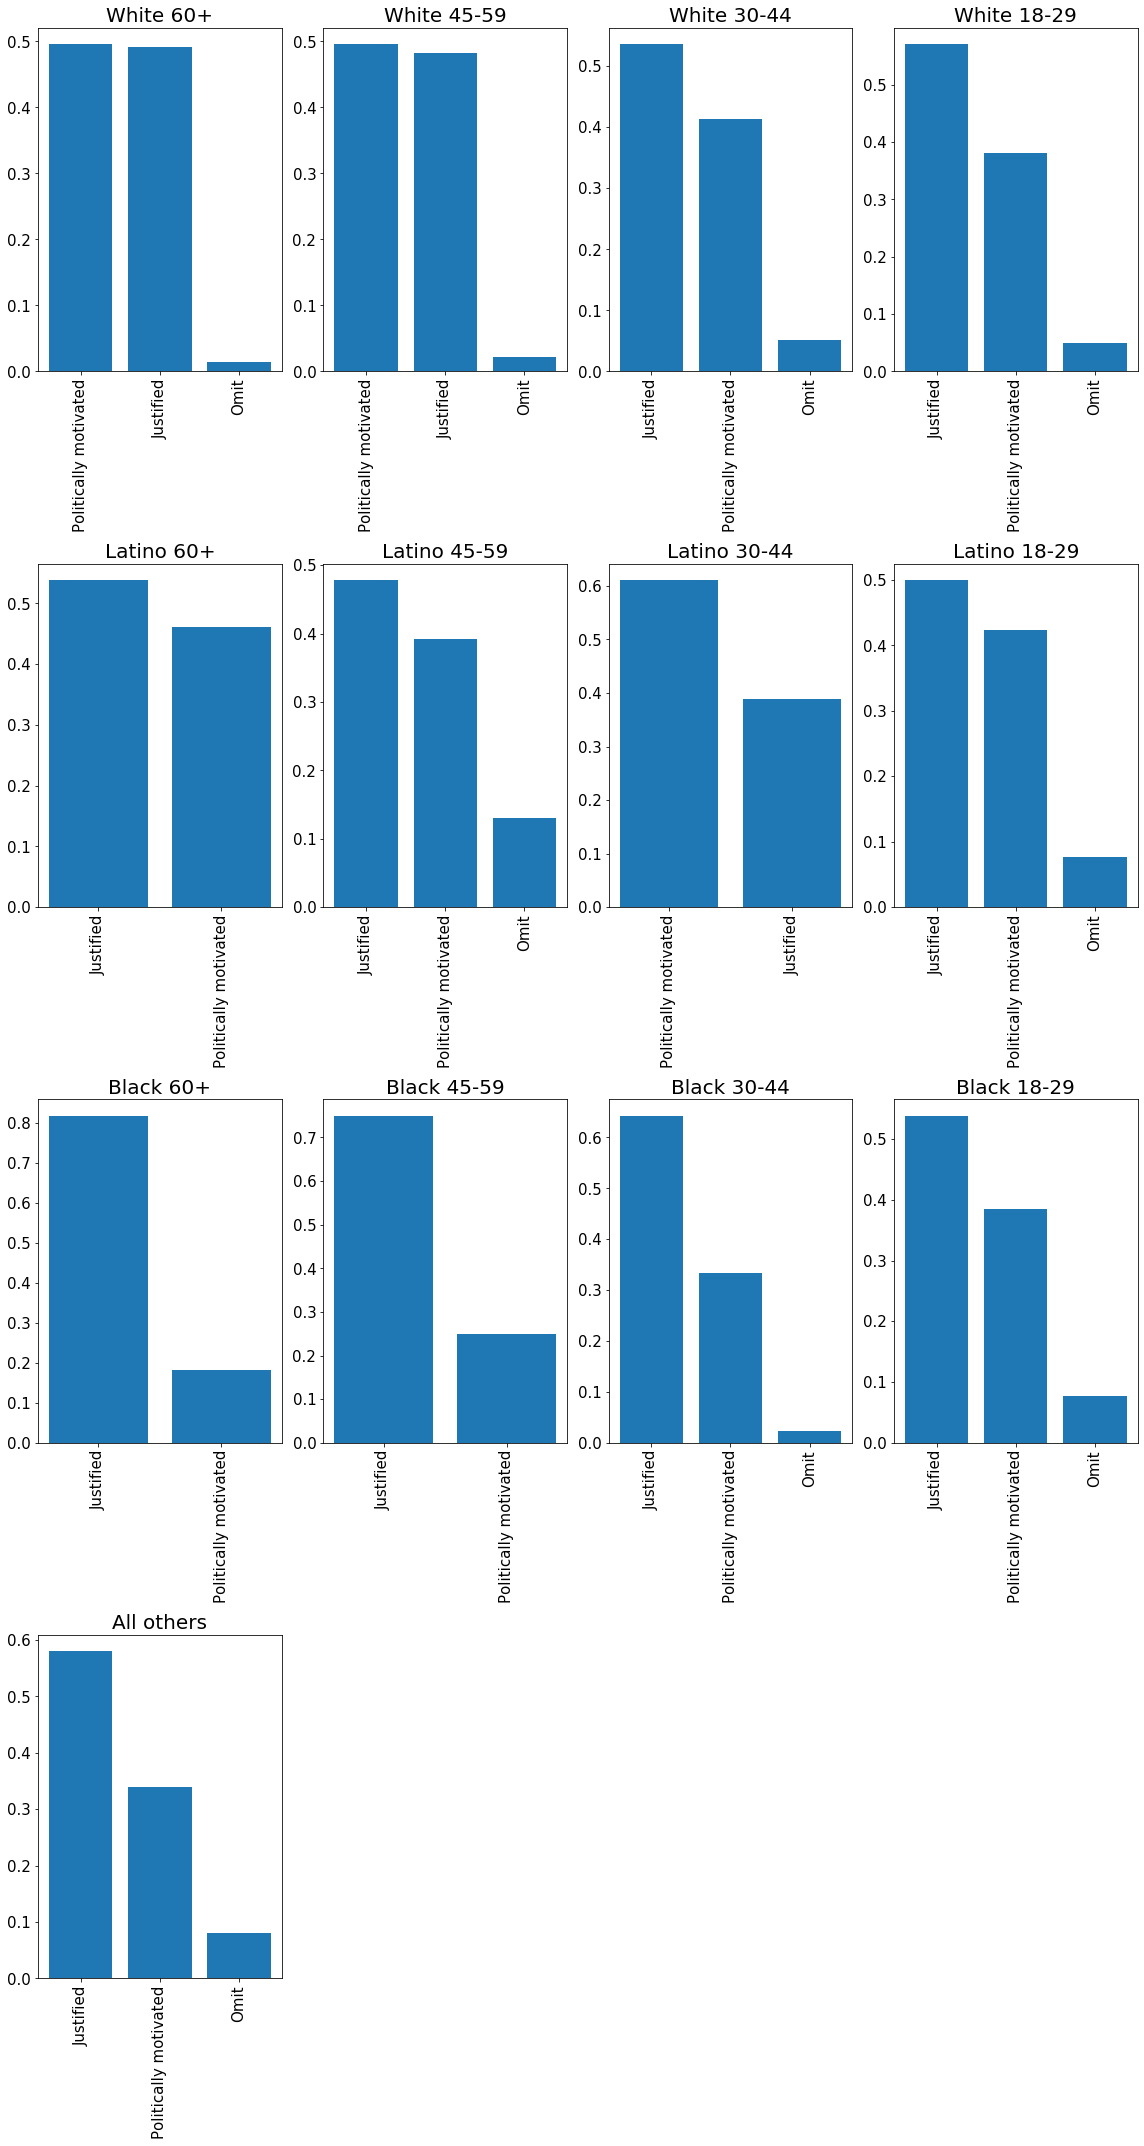

In [99]:
chart_simplifier(df_v2_all_ind, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'RUSSIA18')


#### Plot of the participant's approval of Trump's immigration policies by race

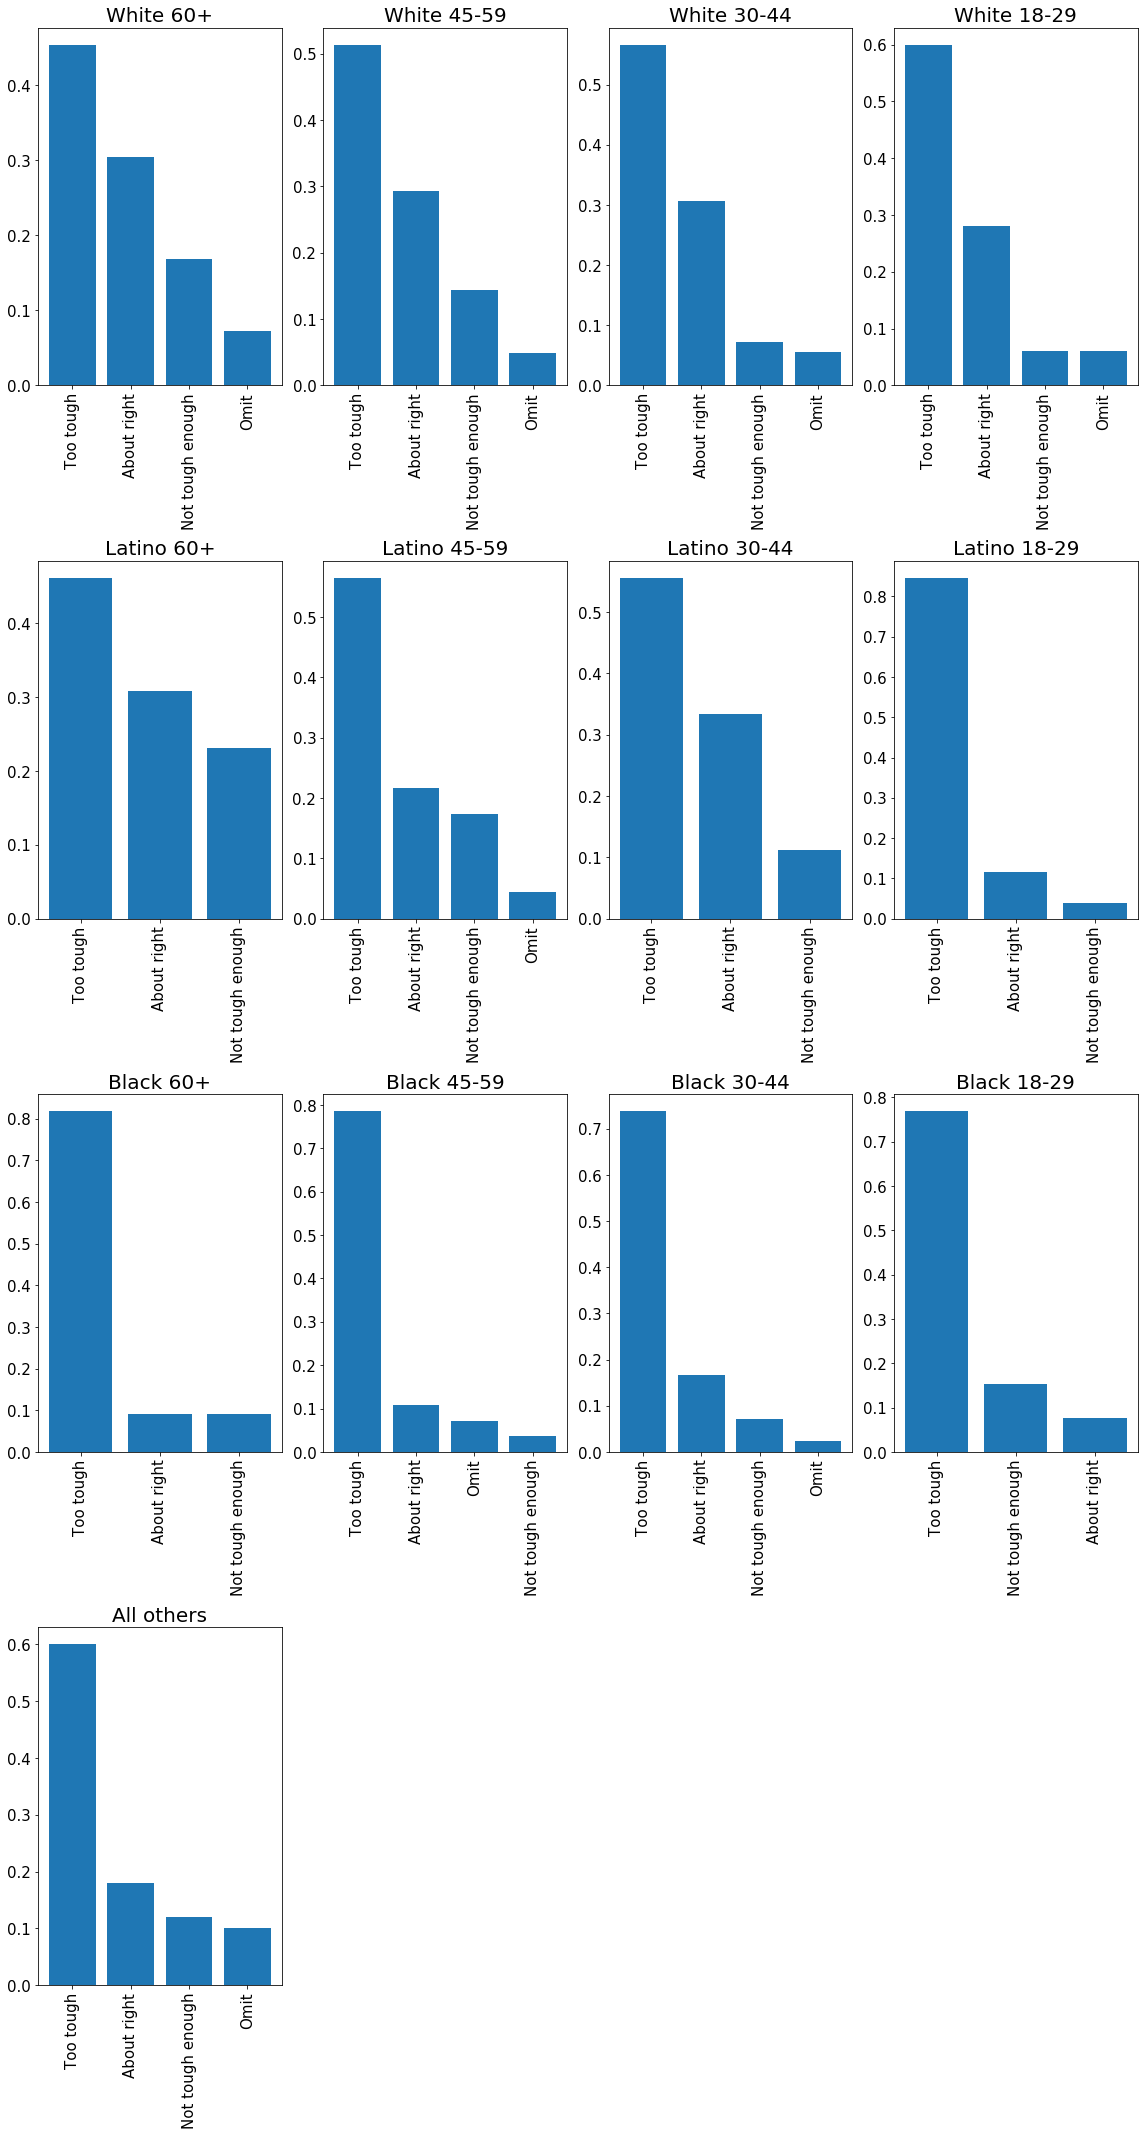

In [102]:
chart_simplifier(df_v2_all_ind, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'TRUMPIMM')


#### Plot of the participants opinion of the treatment of minorities versus white people by race 

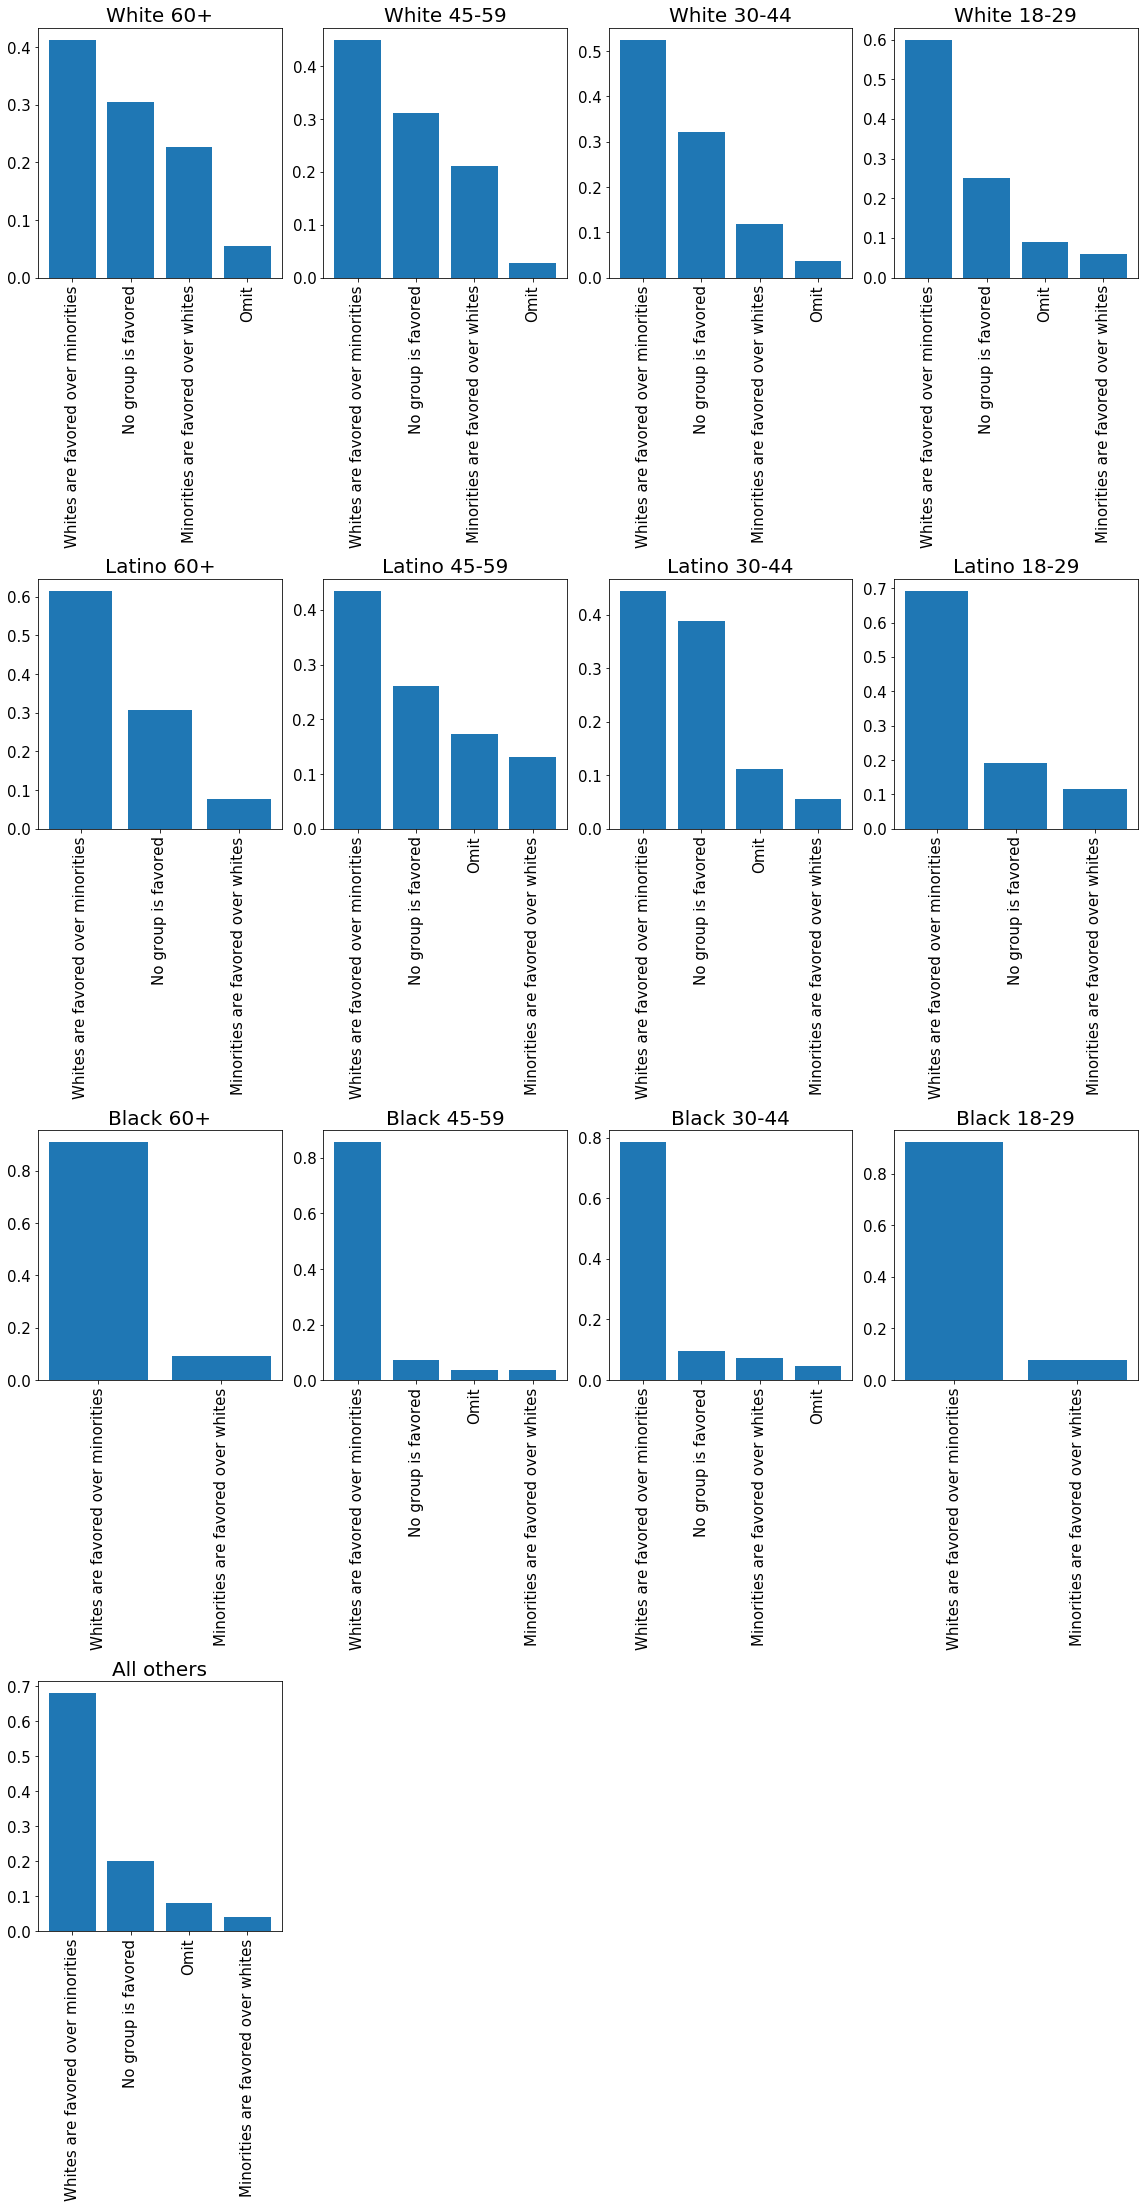

In [100]:
chart_simplifier(df_v2_all_ind, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACEFACTOR')


#### Which issue is most important to the participant by race

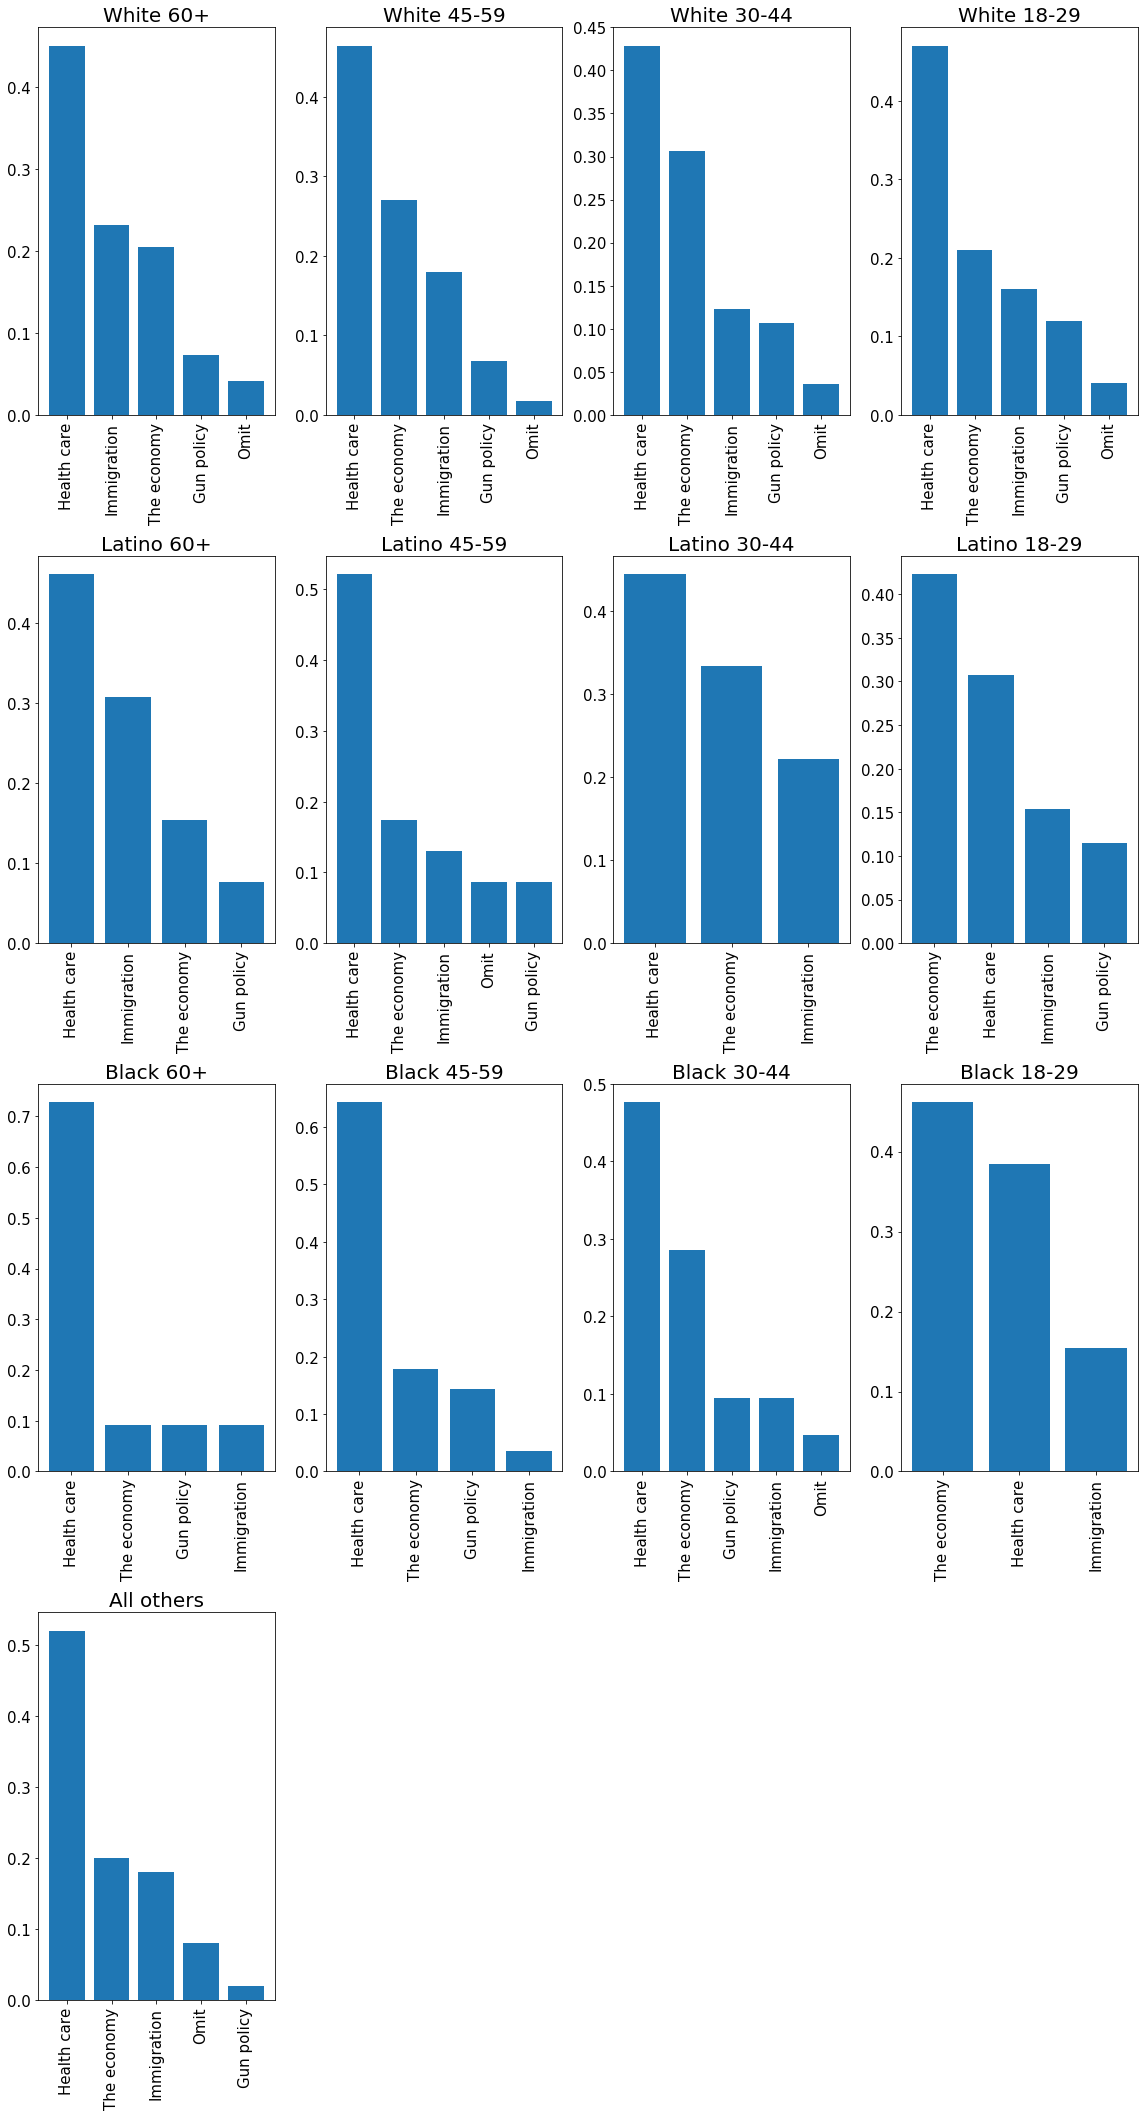

In [103]:
chart_simplifier(df_v2_all_ind, group = group_age_by_race, filt = 'AGEBYRACE' , issue= 'ISSUE18')


#### Plot show the participant's opinion of having people of color represented in office by race 

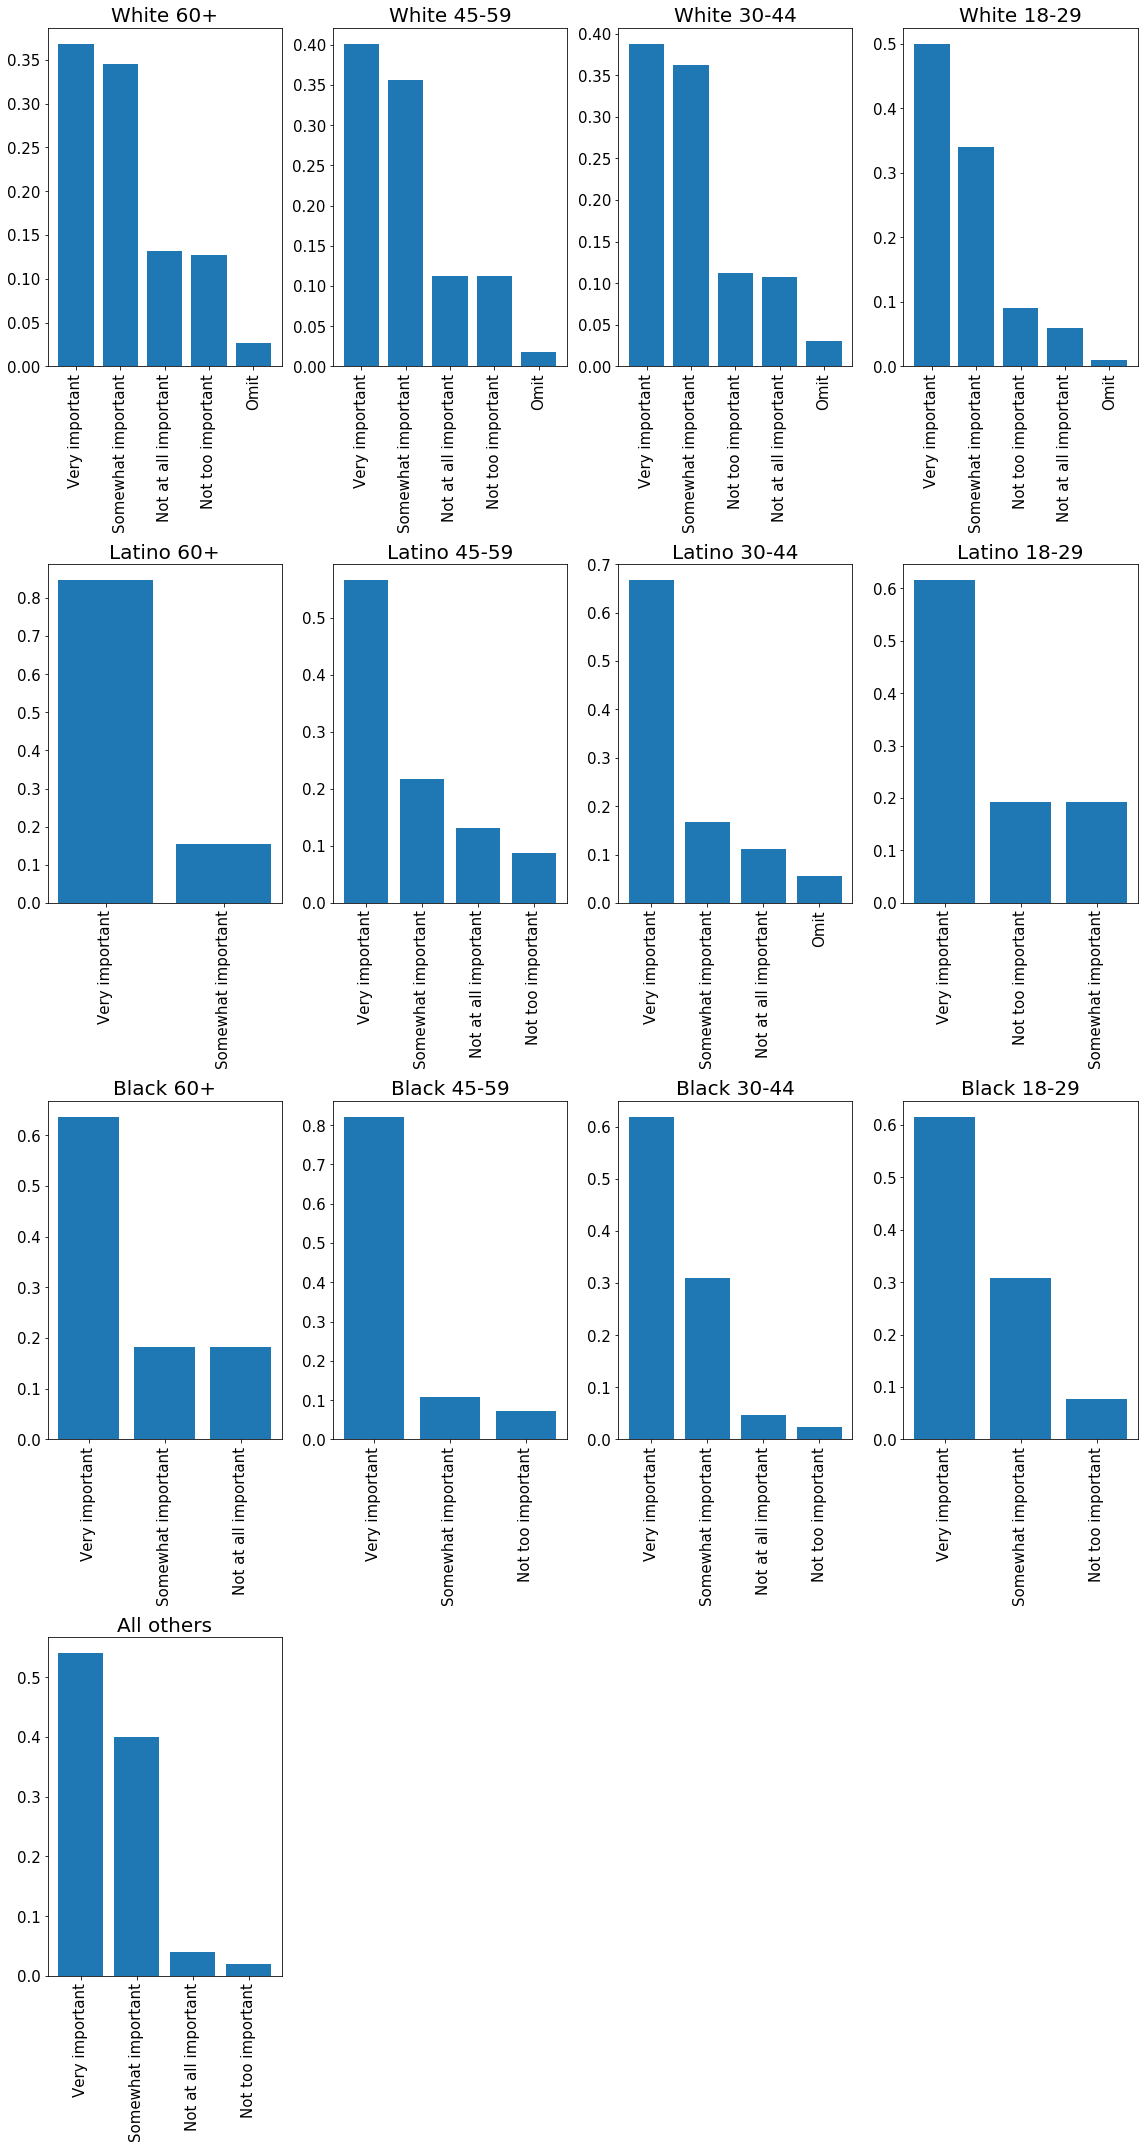

In [101]:
chart_simplifier(df_v2_all_ind, group = group_age_by_race, filt = 'AGEBYRACE'  , issue= 'RACE18')
